In [ ]:
# !pip install pyreadstat

In [45]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [27]:
df = pd.read_spss('../data/CCAM SPSS Data 2008-2018.sav')
df.to_csv('../data/CCAM SPSS Data 2008-2018.csv', index=False)
df = pd.read_csv('../data/CCAM SPSS Data 2008-2018.csv')

In [4]:
geo = pd.read_csv('../data/YCOM6.0_2021_Data_.csv', encoding='latin-1')

In [28]:
df.shape

(22416, 54)

**We have 22416 entries here**

In [29]:
df.columns

Index(['case_ID', 'wave', 'year', 'weight_wave', 'weight_aggregate',
       'happening', 'cause_original', 'cause_other_text', 'cause_recoded',
       'sci_consensus', 'worry', 'harm_personally', 'harm_US',
       'harm_dev_countries', 'harm_future_gen', 'harm_plants_animals',
       'when_harm_US', 'reg_CO2_pollutant', 'reg_utilities', 'fund_research',
       'reg_coal_emissions', 'discuss_GW', 'hear_GW_media', 'gender', 'age',
       'age_category', 'generation', 'educ', 'educ_category', 'income',
       'income_category', 'race', 'ideology', 'party', 'party_w_leaners',
       'party_x_ideo', 'registered_voter', 'region9', 'region4', 'religion',
       'religion_other_nonchristian', 'evangelical', 'service_attendance',
       'marit_status', 'employment', 'house_head', 'house_size',
       'house_ages0to1', 'house_ages2to5', 'house_ages6to12',
       'house_ages13to17', 'house_ages18plus', 'house_type', 'house_own'],
      dtype='object')

In [30]:
df.isnull().sum()

case_ID                            0
wave                               0
year                               0
weight_wave                        0
weight_aggregate                   0
happening                          0
cause_original                     0
cause_other_text               20426
cause_recoded                      0
sci_consensus                   1330
worry                              0
harm_personally                    0
harm_US                            0
harm_dev_countries                 0
harm_future_gen                    0
harm_plants_animals             1330
when_harm_US                       0
reg_CO2_pollutant               1010
reg_utilities                   5026
fund_research                      0
reg_coal_emissions              9098
discuss_GW                         0
hear_GW_media                  13657
gender                             0
age                                0
age_category                       0
generation                         0
e

In [31]:
df= df[df['happening']!='Refused']

In [32]:
df.religion.value_counts(normalize=True)

Catholic                                                           0.228284
Protestant (e.g., Methodist, Lutheran, Presbyterian, Episcopal)    0.212799
None of the Above (Apr 2014 on); None (Nov 2008 - Dec 2013)        0.137212
Baptist - any denomination                                         0.136138
Other Christian                                                    0.113806
Pentecostal                                                        0.028776
Agnostic (Apr 2014 on)                                             0.028239
Atheist (Apr 2014 on)                                              0.027210
Jewish                                                             0.023450
Mormon                                                             0.017498
Other - non-Christian (Please specify)                             0.017409
Refused                                                            0.012352
Buddhist                                                           0.006489
Hindu       

**These values represent the identified religions in the survey**

In [33]:
df[df['year']=='2014']['religion'].value_counts(normalize=True)

Series([], Name: religion, dtype: float64)

In [34]:
df[df['year']=='2013']['religion'].value_counts(normalize=True)

Series([], Name: religion, dtype: float64)

In [35]:
df[df['year']=='2015']['religion'].value_counts(normalize=True)

Series([], Name: religion, dtype: float64)

In [36]:
df.groupby('religion')['happening'].value_counts(normalize=True).unstack().T.loc[['No',"Don't know",'Yes']].T

happening,No,Don't know,Yes
religion,,,
Agnostic (Apr 2014 on),0.071315,0.074485,0.854200
Atheist (Apr 2014 on),0.065789,0.060855,0.873355
Baptist - any denomination,0.207101,0.206772,0.586128
Buddhist,0.096552,0.096552,0.806897
Catholic,0.141541,0.159381,0.699079
Eastern Orthodox,0.150685,0.123288,0.726027
Hindu,0.044944,0.112360,0.842697
Jewish,0.125954,0.097328,0.776718
Mormon,0.273657,0.189258,0.537084


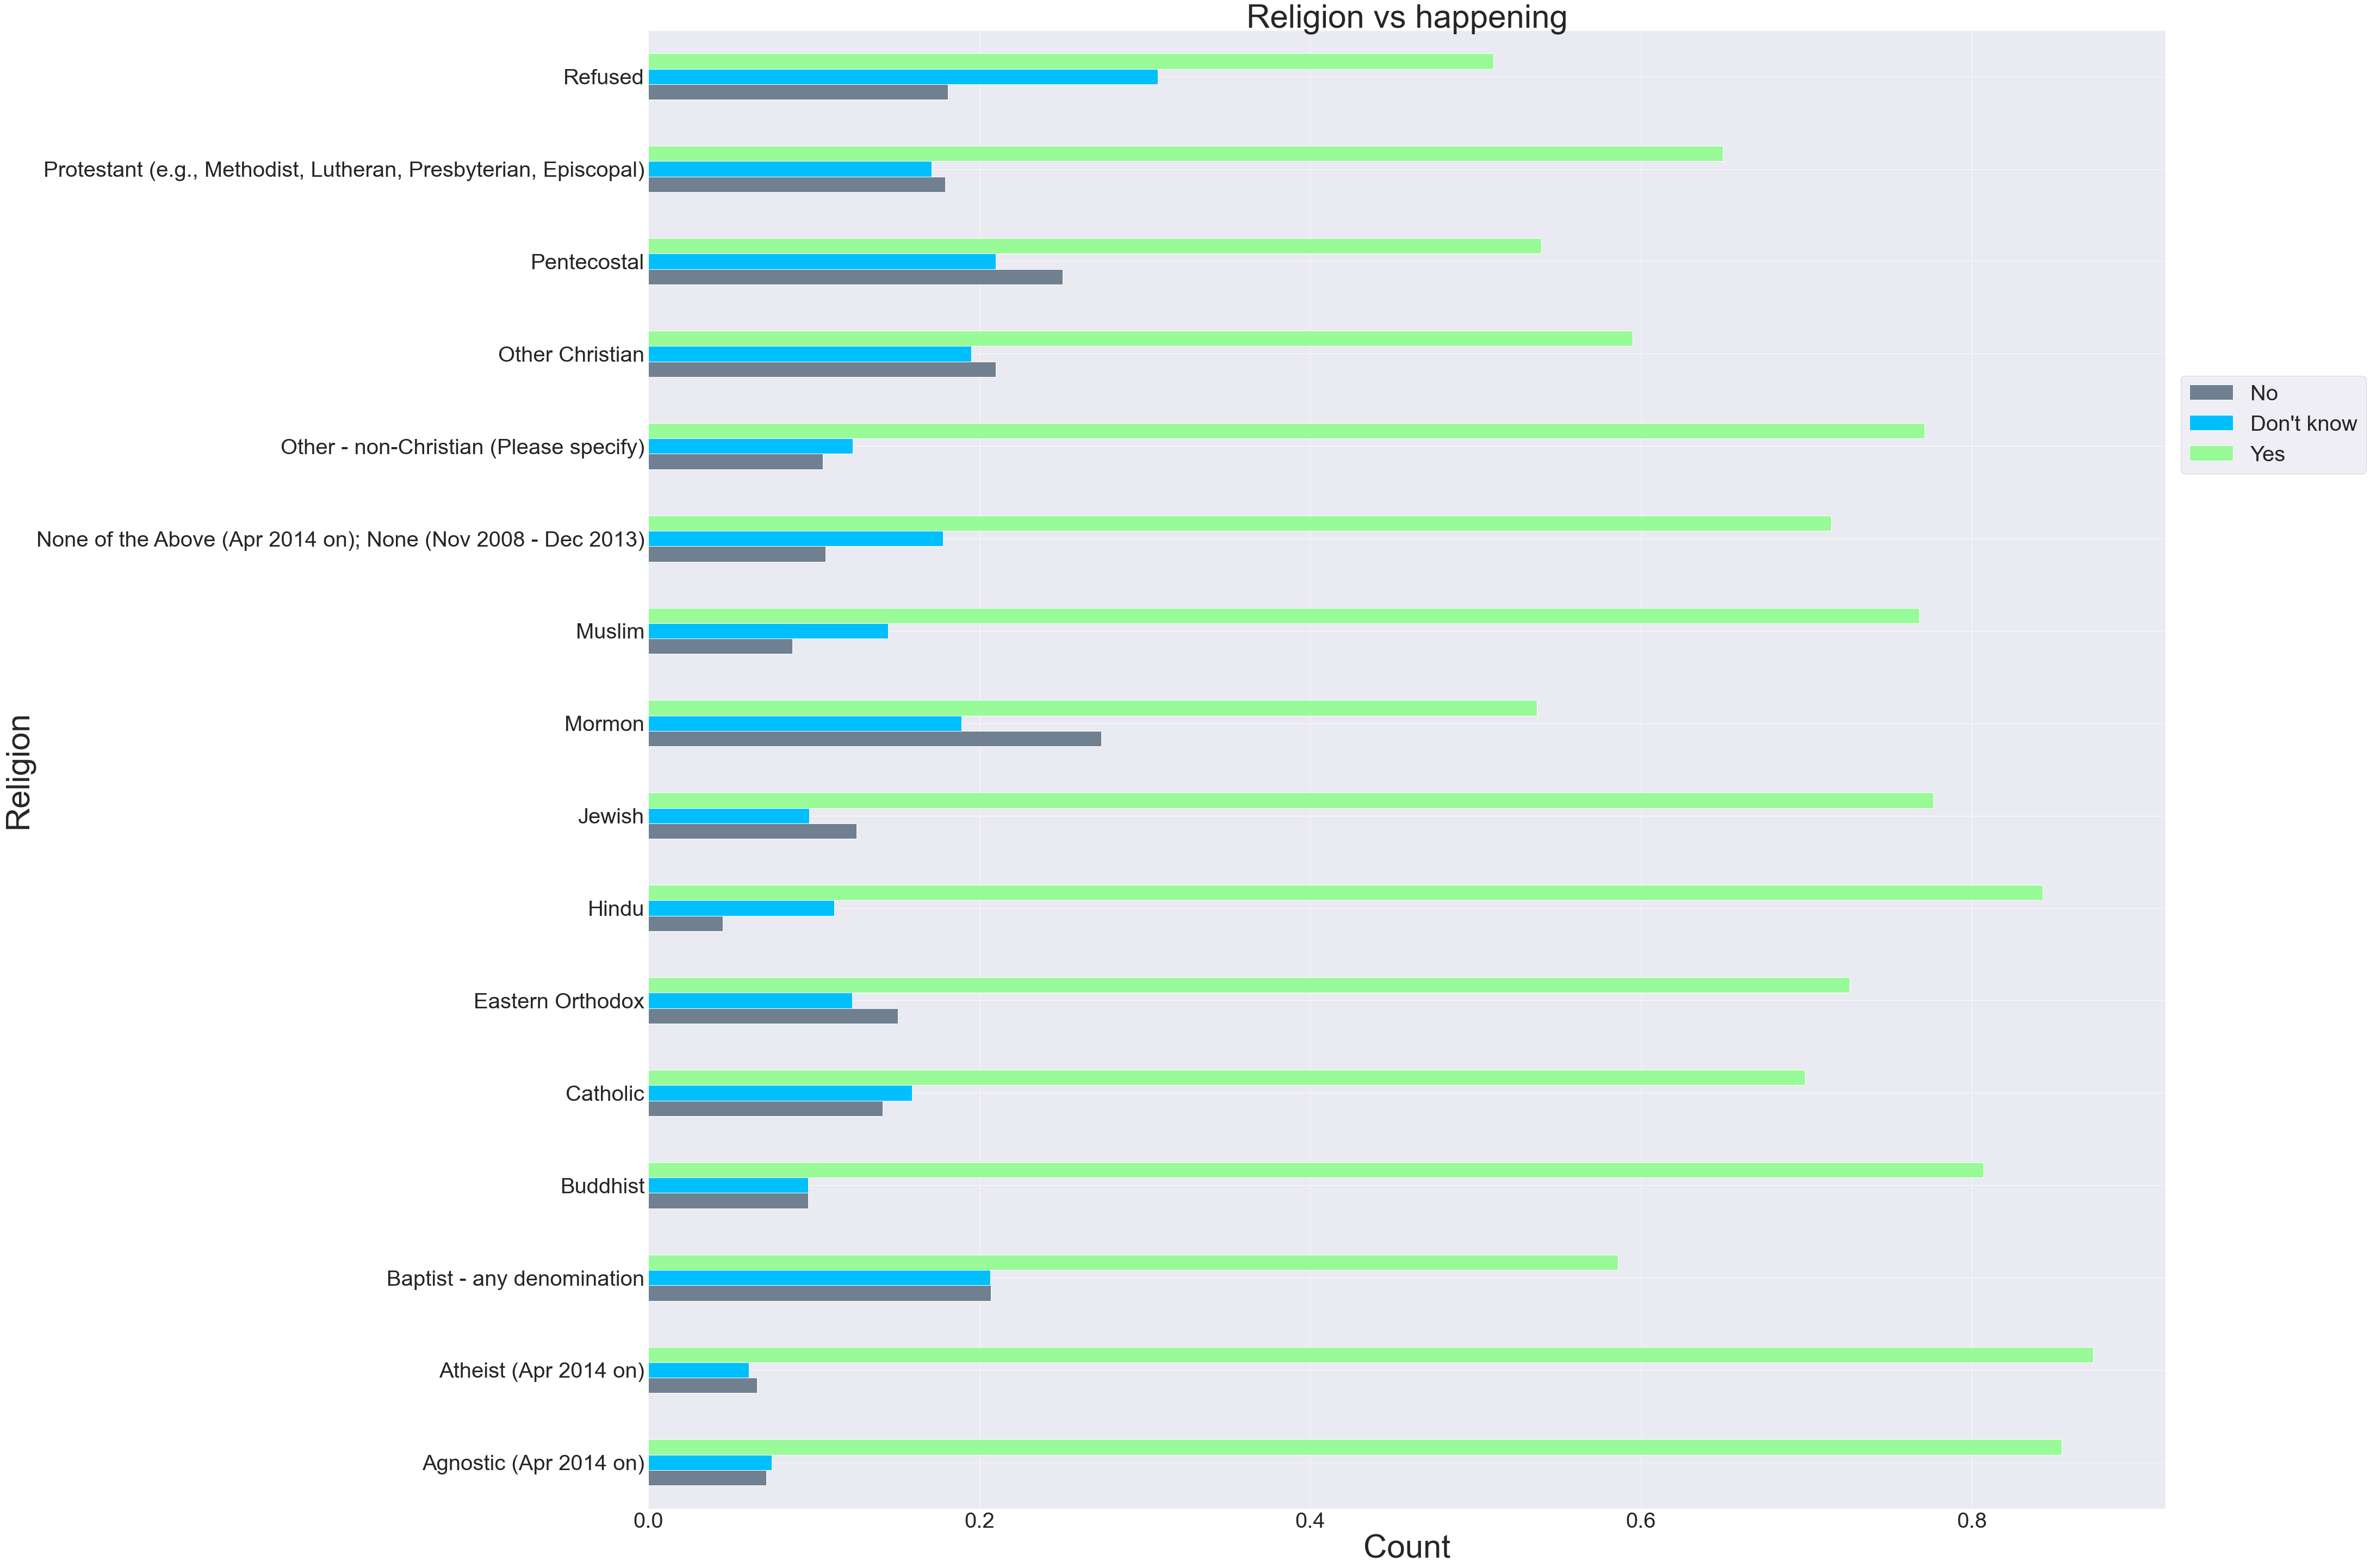

In [73]:
ax = df.groupby('religion')['happening'].value_counts(normalize=True).unstack().T.loc[['No',"Don't know",'Yes']].T.plot(kind='barh', figsize=(50,50),
color=['slategrey', 'deepskyblue', 'palegreen'])
ax.set_ylabel('Religion',fontsize=60)
ax.set_xlabel('Count',fontsize=60)
ax.legend(loc= (1.01,0.7),fontsize =40)
ax.set_title('Religion vs happening',fontsize =60)
plt.setp(ax.get_xticklabels(), fontsize=40)
plt.setp(ax.get_yticklabels(), fontsize=40);

- **This graph represents the distribution of`happening` across various religions.**
- **Largely people across all religions accept that climate change is happening. Baptist seem to have a large proportion of people not accepting climate change**

In [39]:
list(df.religion_other_nonchristian.unique())

[nan,
 'Unitarian',
 "Spiritual but don't attend church",
 'Spiritual',
 'native american',
 'Unitarian Universalist',
 'Deist',
 'Pagan',
 'God Loving',
 'Wiccan',
 'nature-based',
 'baptist',
 'Eclectic Spiritualist',
 'Spiritual not religious',
 'Just',
 'Shaman',
 'Unitarian-Universalist',
 'Prefer not say',
 'Jw',
 '"Believer"',
 'Pagan/Shamanic Witch',
 'Spiritualist',
 'Church of Christ',
 'prefer not to state',
 'NO RELIGION',
 'none of your bee wax',
 'evangelical',
 'female ancestor worship',
 'Non denominational',
 'unitarian  SRF',
 'born again',
 'apostolic',
 'unitarian universalist',
 'Non-denominationa',
 'Jesus',
 'SEVENTH DAY  ADVENTIST',
 'Sikh',
 'Anabaptist',
 'spiritual',
 'Human',
 'science',
 'Dystheist',
 'Taoist',
 'no denomanation',
 'G',
 'Agnostic Atheist',
 'Jehovah’s witness',
 'Native American truths',
 "I'm a Christian",
 'Heathen',
 'Love and Compassion',
 'Christian',
 'Quaker',
 'Jehovah’s Witness',
 'pagan',
 'Unitarianism',
 'NOYB',
 'LOVEBIBLELIGH

**This is user filled column so a lot of typos are being seen, since we have religion and attendance data we might drop this column**

In [40]:
df.evangelical.value_counts(normalize=True)

No            0.656344
Yes           0.248512
Don't Know    0.083195
Refused       0.011949
Name: evangelical, dtype: float64

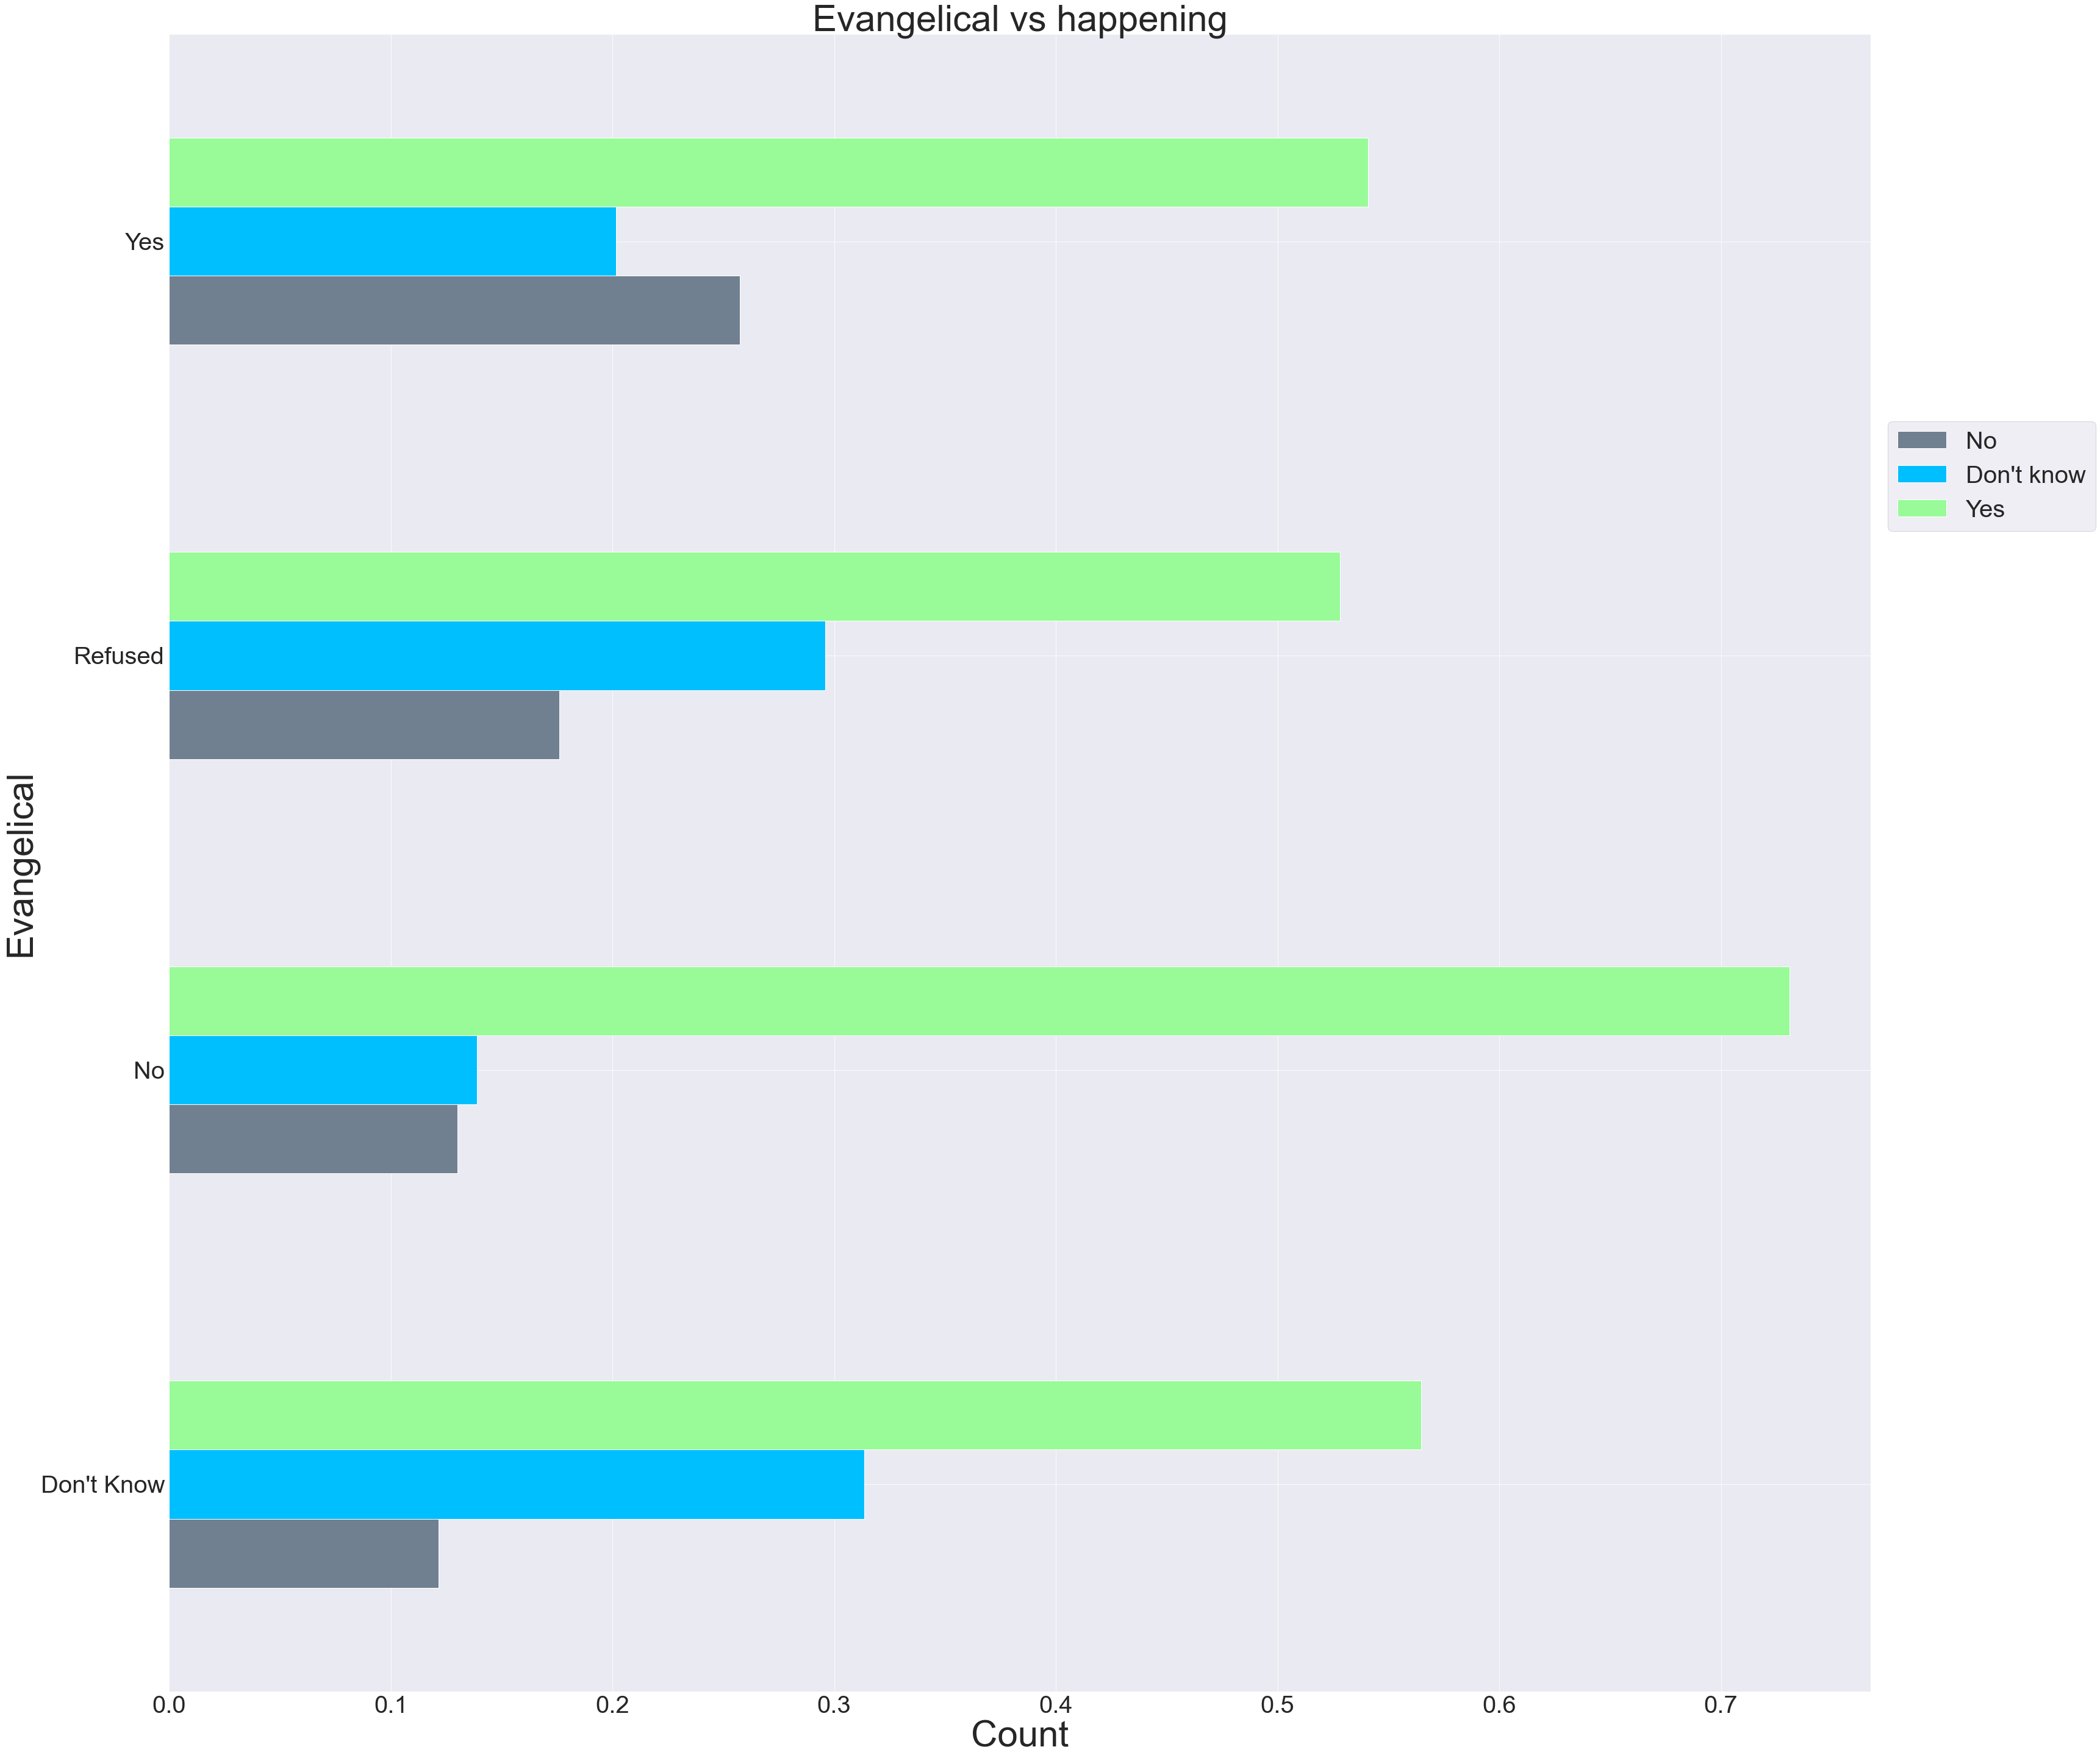

In [72]:
ax = df.groupby('evangelical')['happening'].value_counts(normalize=True).unstack().T.loc[['No',"Don't know",'Yes']].T.plot(kind='barh', figsize=(50,50),
color=['slategrey', 'deepskyblue', 'palegreen'])
ax.set_ylabel('Evangelical',fontsize=60)
ax.set_xlabel('Count',fontsize=60)
ax.legend(loc= (1.01,0.7),fontsize =40)
ax.set_title('Evangelical vs happening',fontsize =60)
plt.setp(ax.get_xticklabels(), fontsize=40)
plt.setp(ax.get_yticklabels(), fontsize=40);


**People who said Yes to being evangelical or refused to answer whether they are evangelical have a higher proportion of people not accepting climate change**

In [50]:
df.service_attendance.value_counts(normalize=True)

Never                    0.248333
Once a week              0.215708
Once a year or less      0.177400
A few times a year       0.165451
More than once a week    0.102036
Once or twice a month    0.078004
Refused                  0.013068
Name: service_attendance, dtype: float64

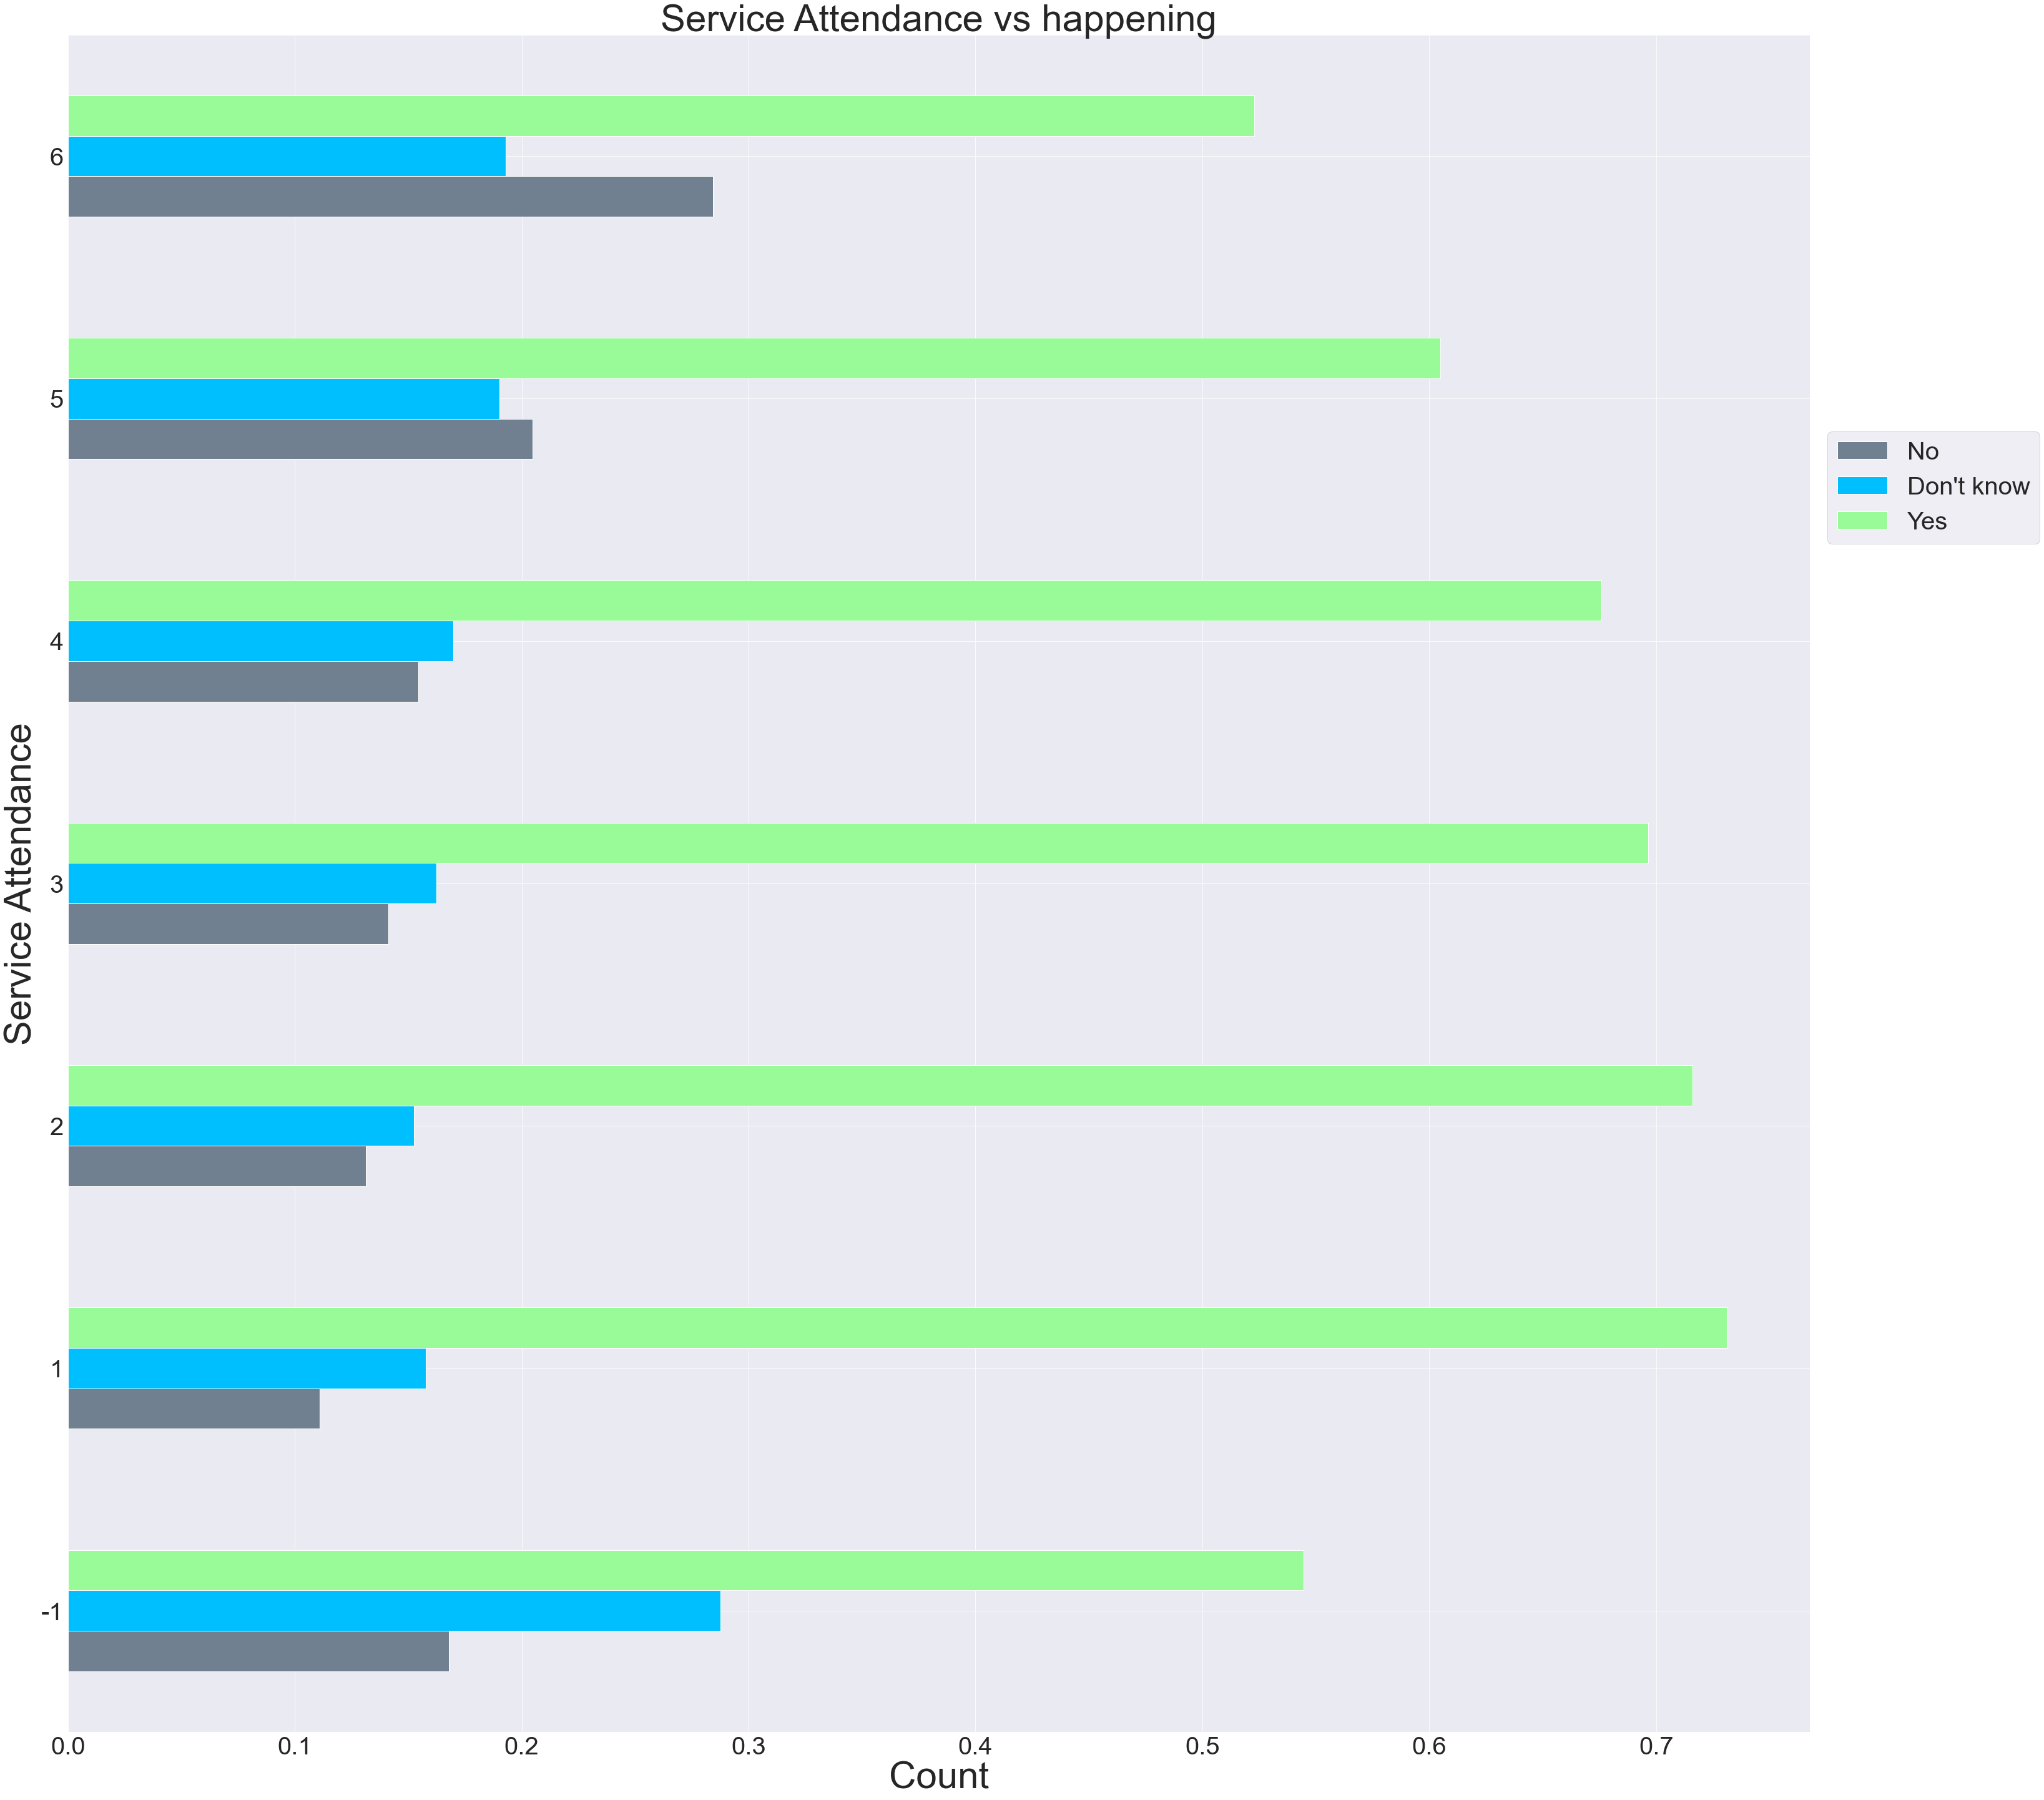

In [71]:
ax = df.groupby('service_attendance')['happening'].value_counts(normalize=True).unstack().T.loc[['No',"Don't know",'Yes']].T.plot(kind='barh', figsize=(50,50),
color=['slategrey', 'deepskyblue', 'palegreen'])
ax.set_ylabel('Service Attendance',fontsize=60)
ax.set_xlabel('Count',fontsize=60)
ax.legend(loc= (1.01,0.7),fontsize =40)
ax.set_title('Service Attendance vs happening',fontsize =60)
plt.setp(ax.get_xticklabels(), fontsize=40)
plt.setp(ax.get_yticklabels(), fontsize=40);


**People who go for service attendance for more than once a week and once a week have a higher proportion of people refusing to believe in climate change compared to all people in that particular label of service attendance**

In [53]:
#mapping values to the ordinal variable representing religiosity
service_attendance_di = {'Never': 1,
                   'Once a week': 5,
                   'Once a year or less': 2,
                   'A few times a year': 3,
                   'More than once a week':6,
                   'Once or twice a month':4,
                   'Refused':-1,
                        }
df.service_attendance= df['service_attendance'].map(lambda x: service_attendance_di[x])


In [54]:
df.marit_status.value_counts(normalize=True)

Married                0.580712
Never married          0.183620
Divorced               0.107675
Living with partner    0.060819
Widowed                0.050392
Separated              0.016782
Name: marit_status, dtype: float64

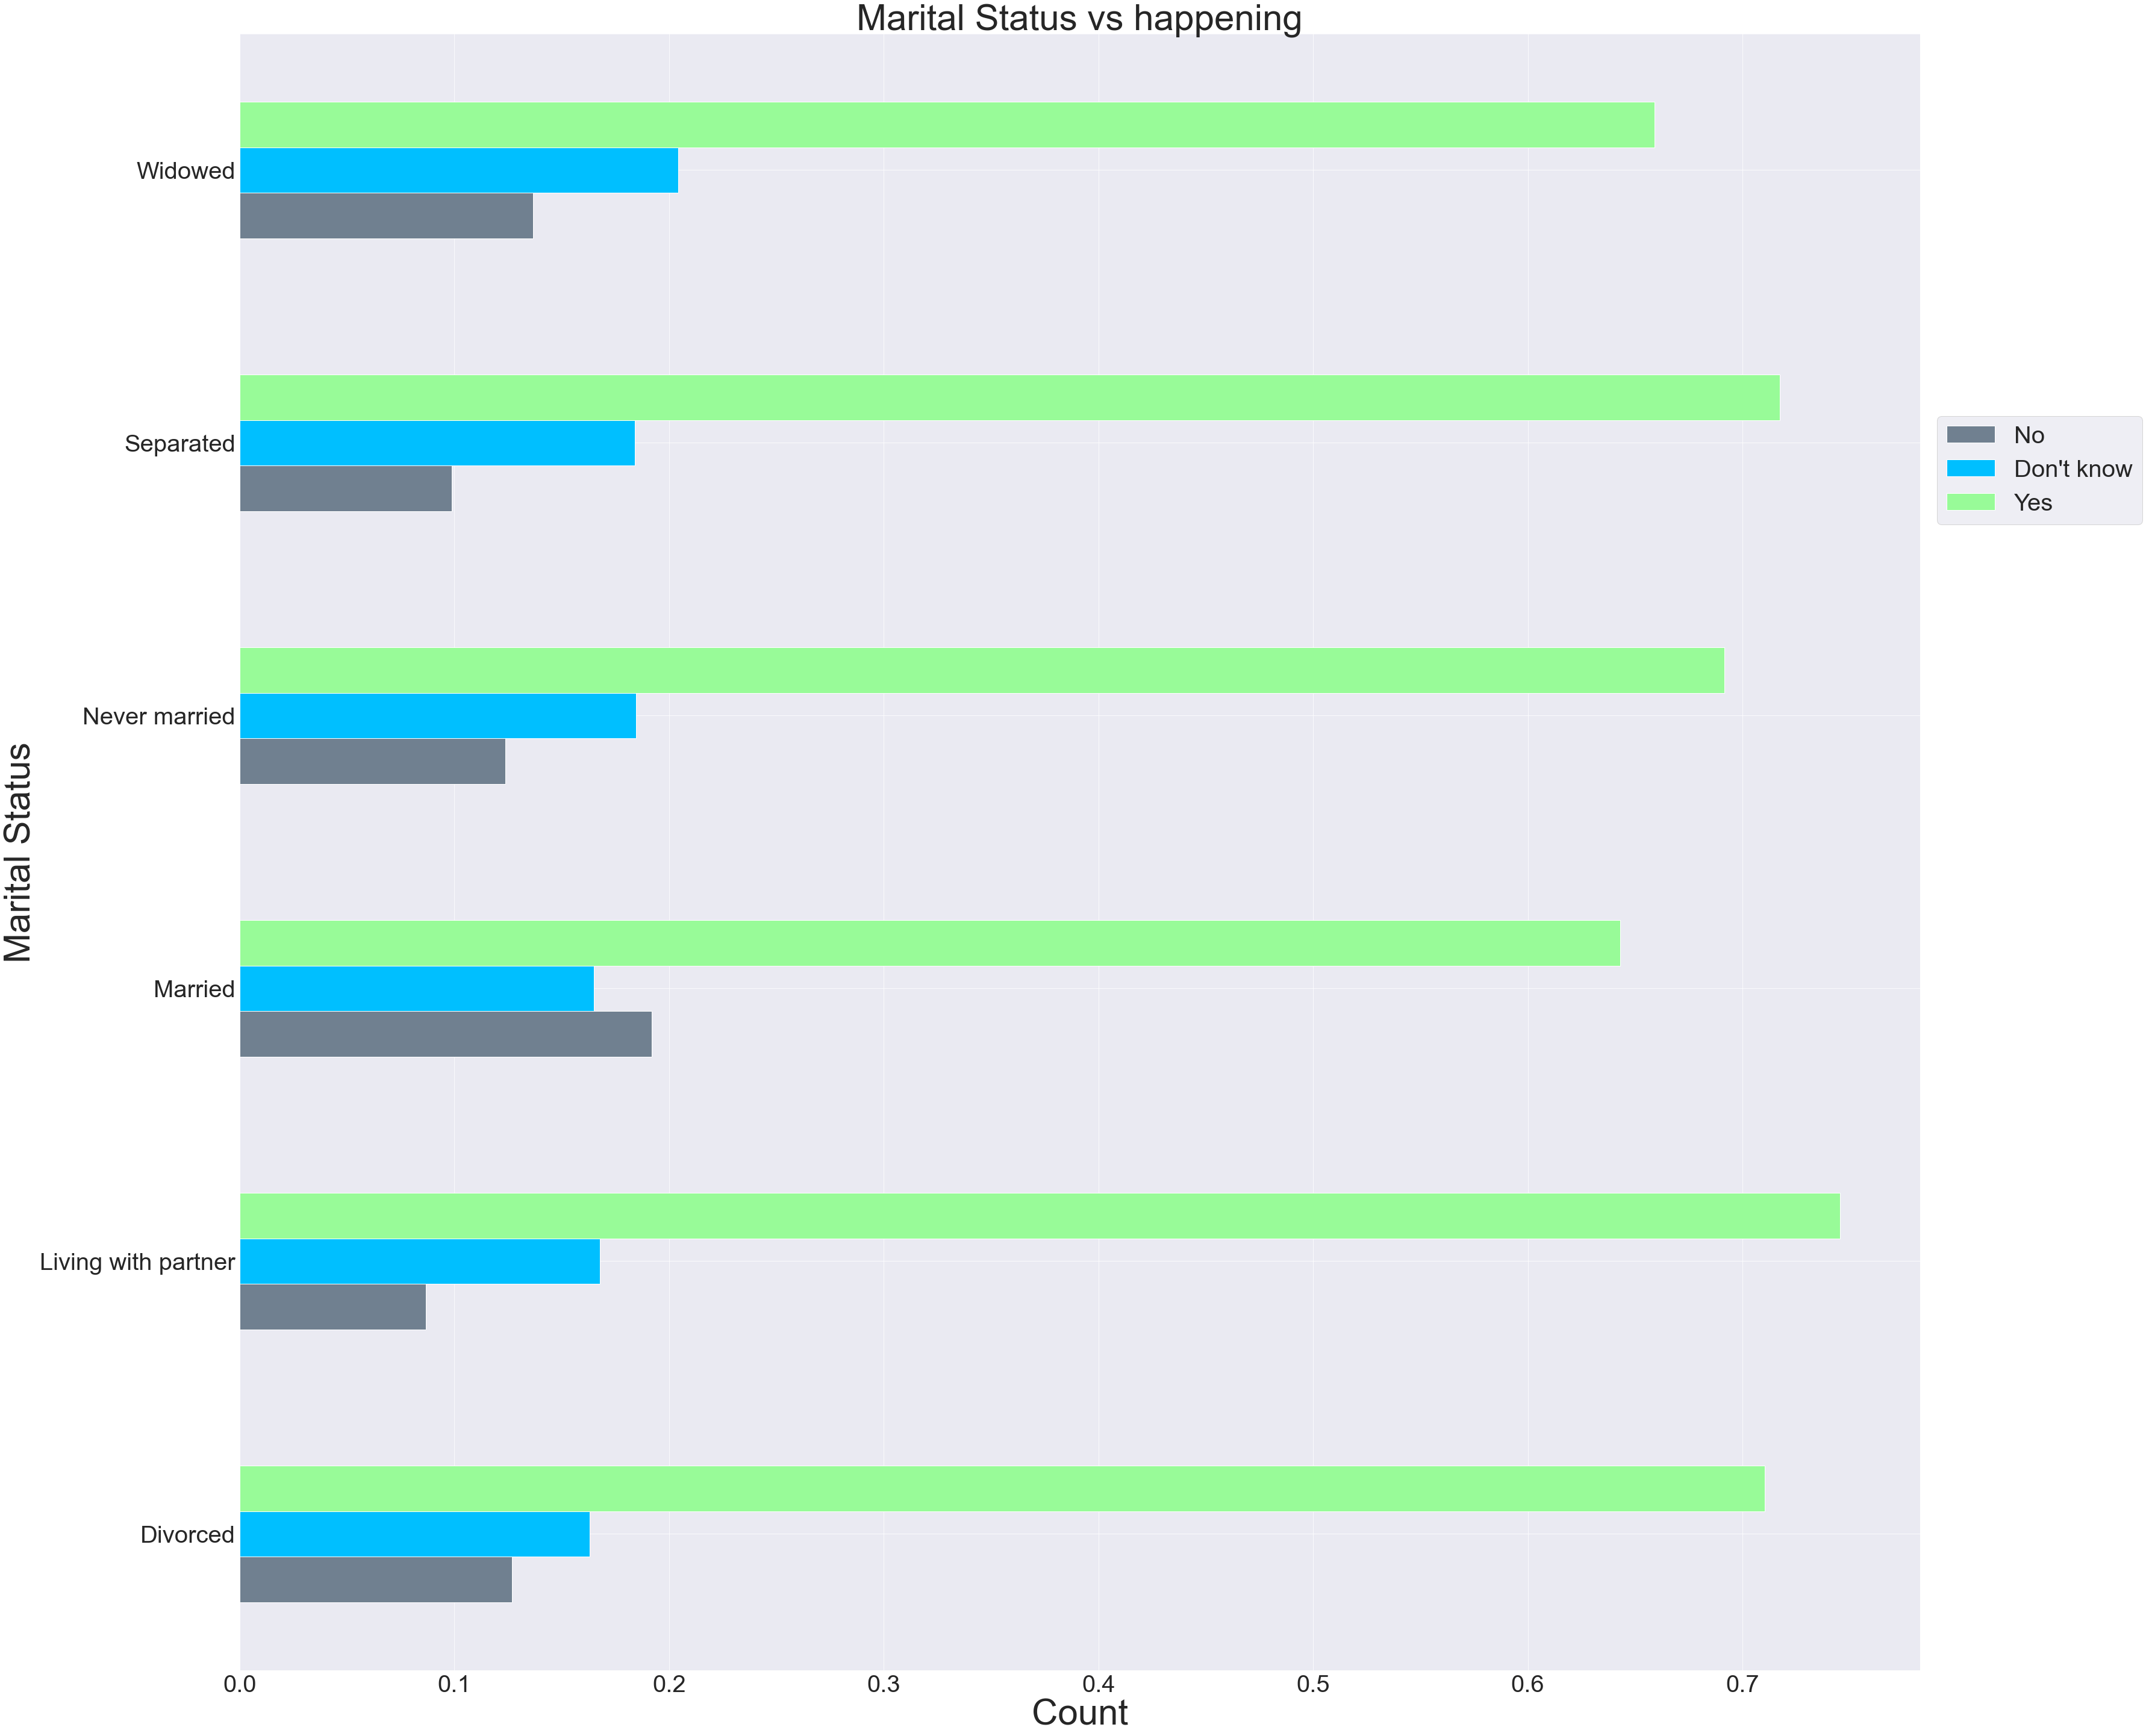

In [70]:
ax = df.groupby('marit_status')['happening'].value_counts(normalize=True).unstack().T.loc[['No',"Don't know",'Yes']].T.plot(kind='barh', figsize=(50,50),
color=['slategrey', 'deepskyblue', 'palegreen'])
ax.set_ylabel('Marital Status',fontsize=60)
ax.set_xlabel('Count',fontsize=60)
ax.legend(loc= (1.01,0.7),fontsize =40)
ax.set_title('Marital Status vs happening',fontsize =60)
plt.setp(ax.get_xticklabels(), fontsize=40)
plt.setp(ax.get_yticklabels(), fontsize=40);


**This graph represents the distribution of`happening` across various marital status.**

In [64]:
df.employment.value_counts(normalize=True)

Working - as a paid employee                    0.494294
Not working - retired                           0.227031
Working - self-employed                         0.075766
Not working - other                             0.072231
Not working - disabled                          0.065160
Not working - looking for work                  0.057642
Not working - on temporary layoff from a job    0.007876
Name: employment, dtype: float64

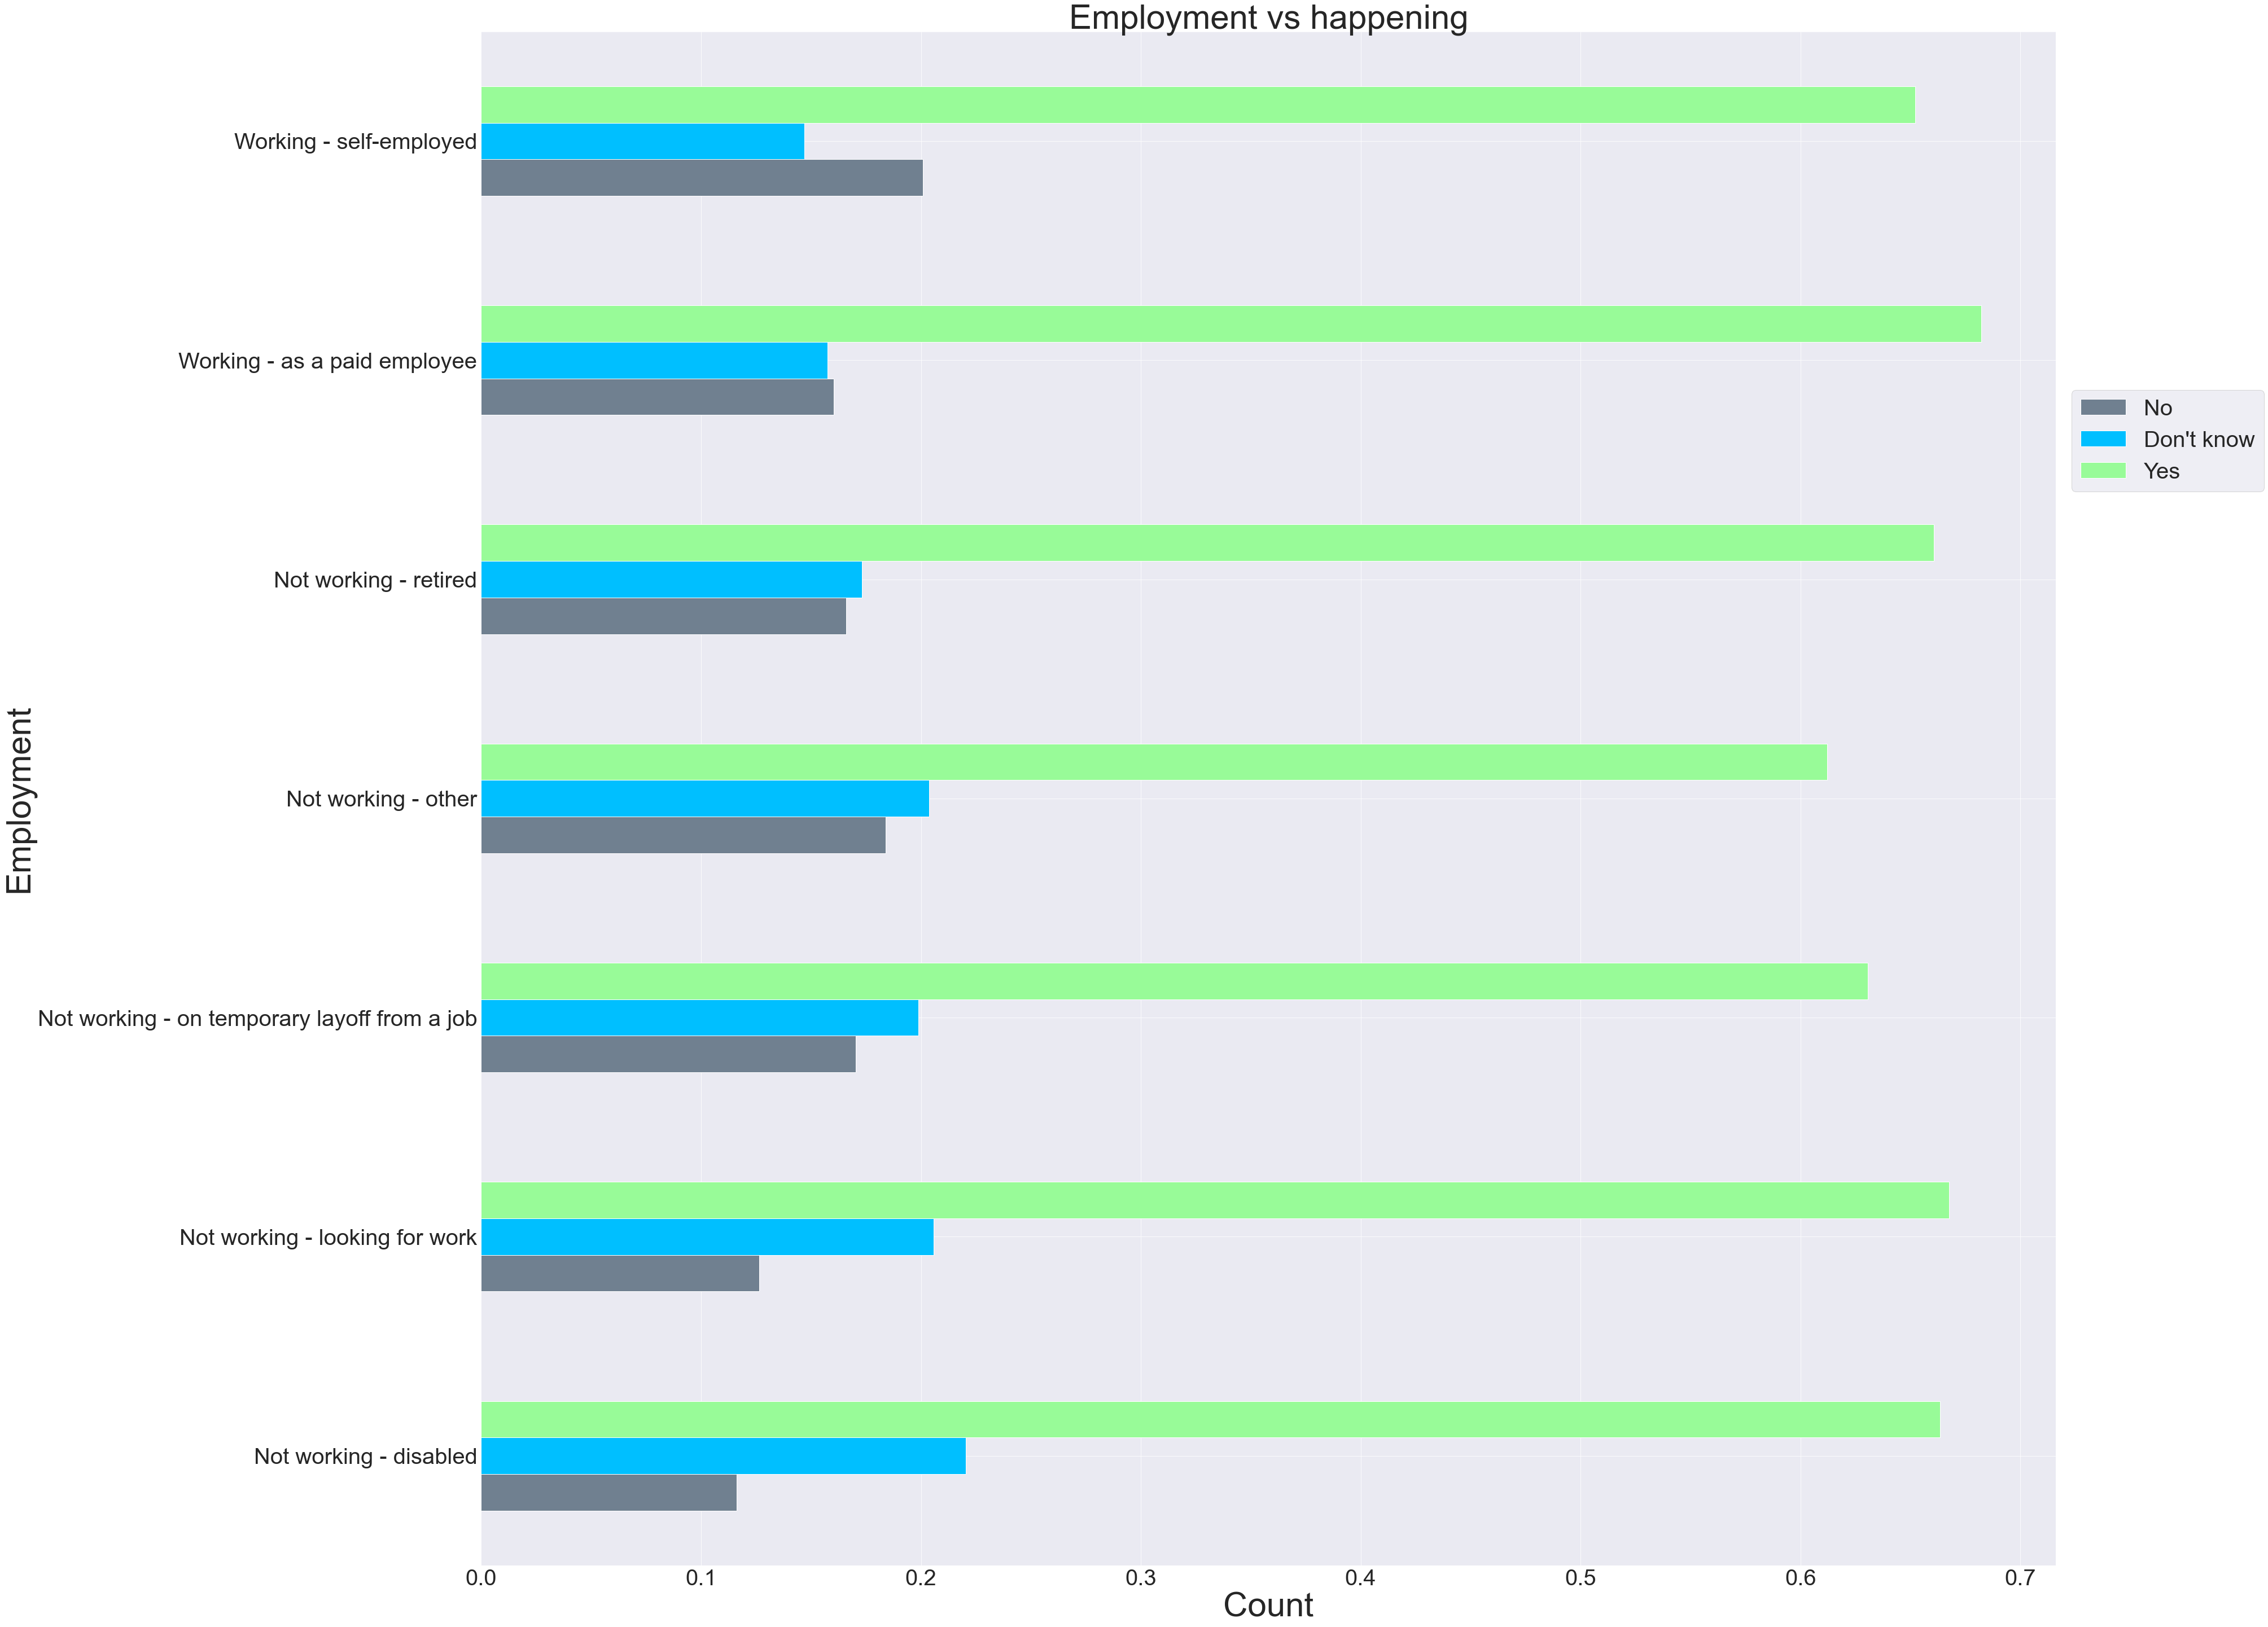

In [69]:
ax = df.groupby('employment')['happening'].value_counts(normalize=True).unstack().T.loc[['No',"Don't know",'Yes']].T.plot(kind='barh', figsize=(50,50),
color=['slategrey', 'deepskyblue', 'palegreen'])
ax.set_ylabel('Employment',fontsize=60)
ax.set_xlabel('Count',fontsize=60)
ax.legend(loc= (1.01,0.7),fontsize =40)
ax.set_title('Employment vs happening',fontsize =60)
plt.setp(ax.get_xticklabels(), fontsize=40)
plt.setp(ax.get_yticklabels(), fontsize=40);


**This graph represents the distribution of`happening` across various employments.Seems like Retired people have a higher proportion of people not accepting climate change**

In [66]:
df.house_head.value_counts(normalize=True)

Head of household        0.826359
Not head of household    0.173641
Name: house_head, dtype: float64

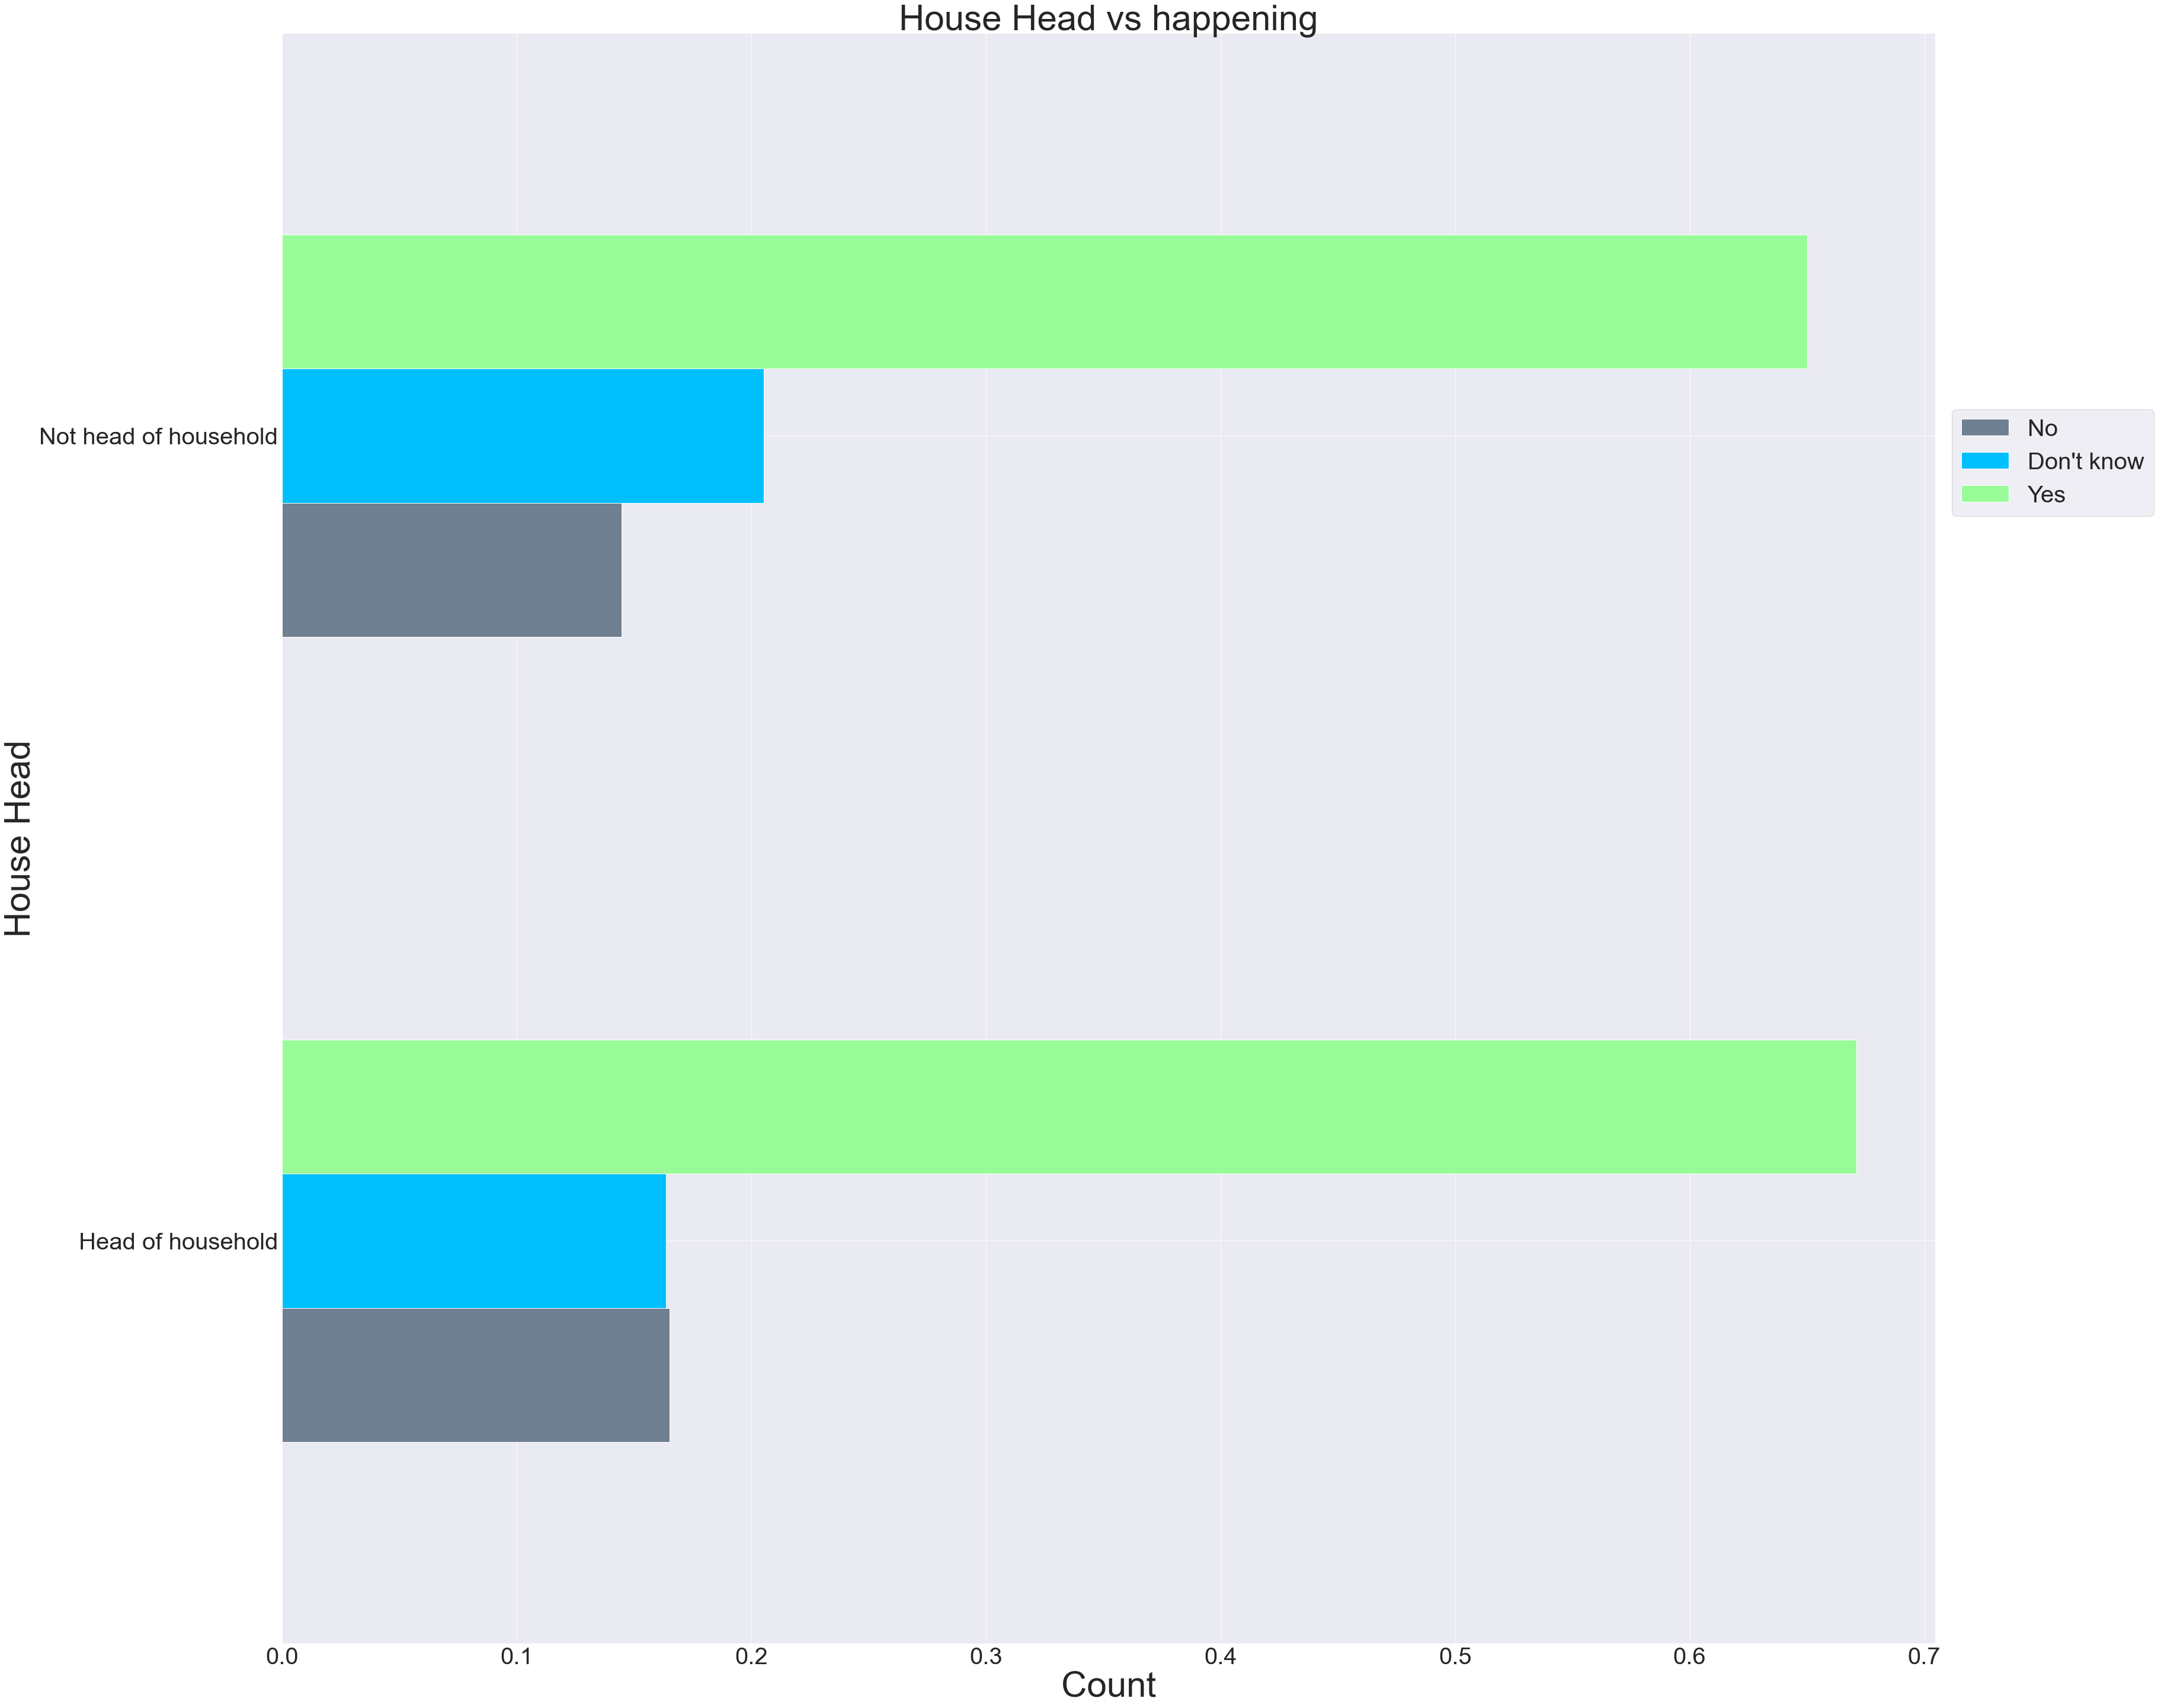

In [68]:
ax = df.groupby('house_head')['happening'].value_counts(normalize=True).unstack().T.loc[['No',"Don't know",'Yes']].T.plot(kind='barh', figsize=(50,50),
color=['slategrey', 'deepskyblue', 'palegreen'])
ax.set_ylabel('House Head',fontsize=60)
ax.set_xlabel('Count',fontsize=60)
ax.legend(loc= (1.01,0.7),fontsize =40)
ax.set_title('House Head vs happening',fontsize =60)
plt.setp(ax.get_xticklabels(), fontsize=40)
plt.setp(ax.get_yticklabels(), fontsize=40);


**This graph represents the distribution of`happening` vs house heads status. Majority of those surveyed seem to own a household**

In [74]:
df.house_size.value_counts(normalize=True)

2.0     0.389841
1.0     0.191094
3.0     0.165809
4.0     0.142045
5.0     0.066592
6.0     0.026091
7.0     0.009622
8.0     0.004654
9.0     0.001790
10.0    0.001656
12.0    0.000627
15.0    0.000134
11.0    0.000045
Name: house_size, dtype: float64

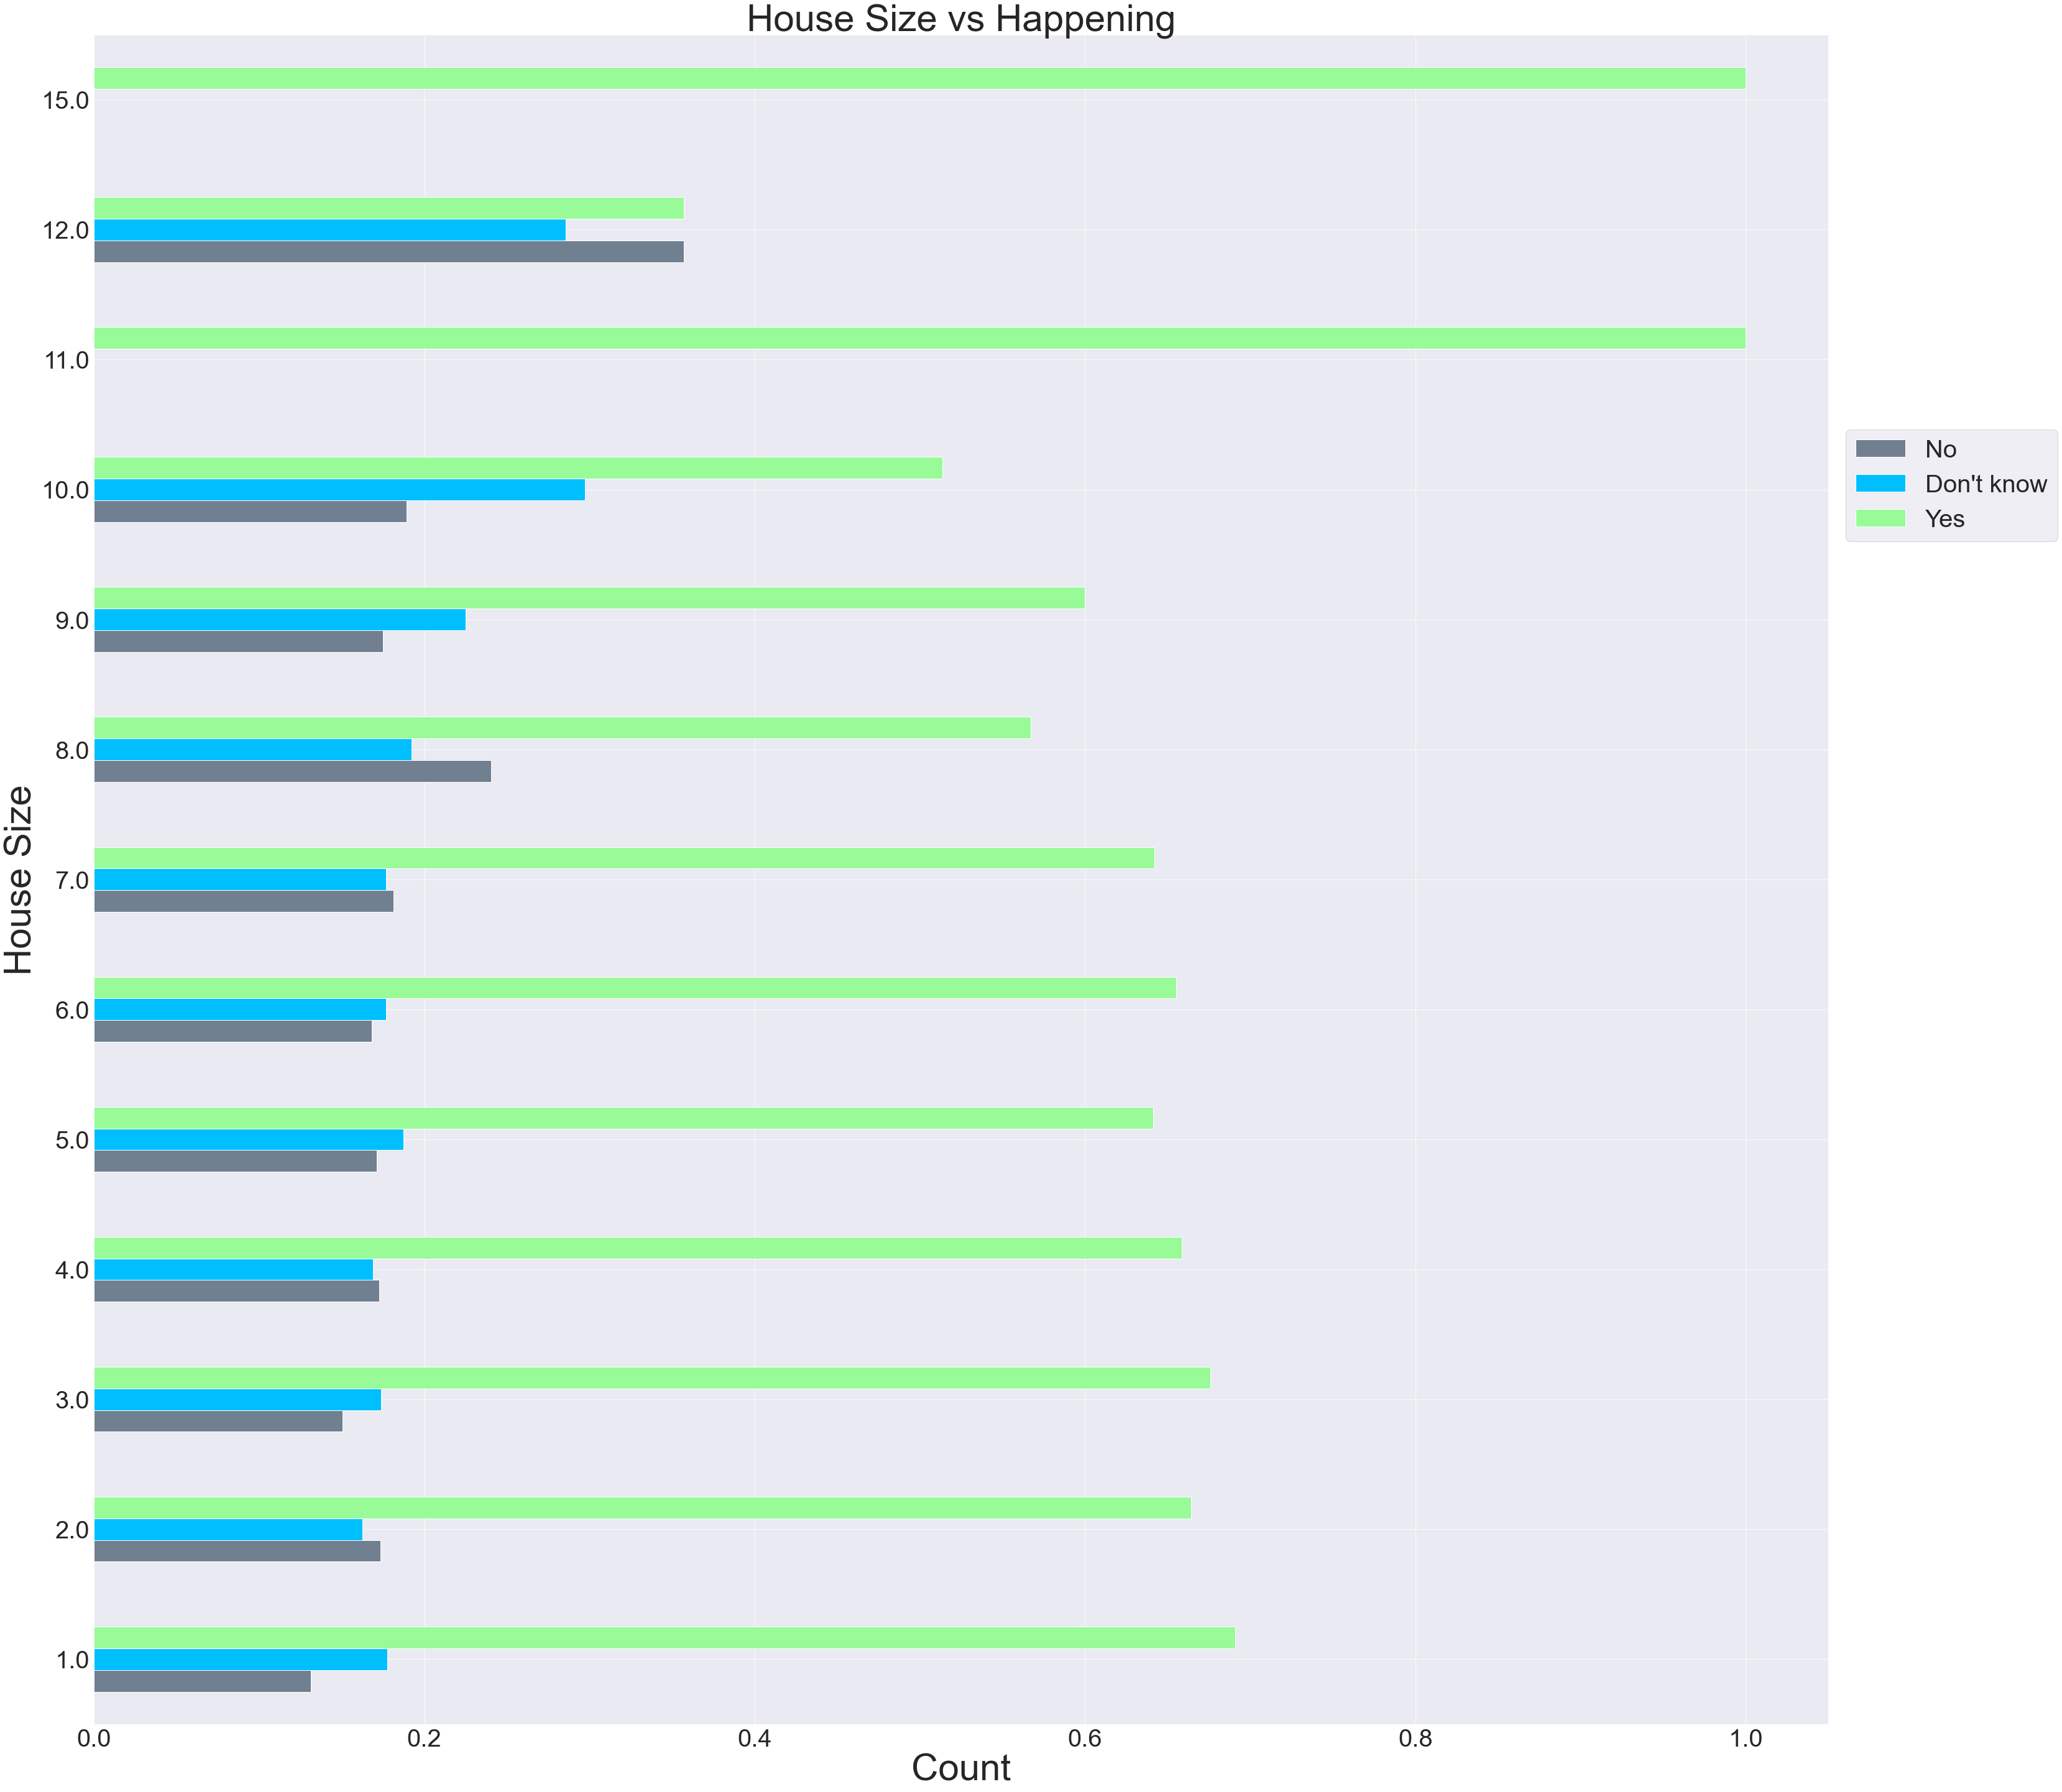

In [75]:
ax = df.groupby('house_size')['happening'].value_counts(normalize=True).unstack().T.loc[['No',"Don't know",'Yes']].T.plot(kind='barh', figsize=(50,50),
color=['slategrey', 'deepskyblue', 'palegreen'])
ax.set_ylabel('House Size',fontsize=60)
ax.set_xlabel('Count',fontsize=60)
ax.legend(loc= (1.01,0.7),fontsize =40)
ax.set_title('House Size vs Happening',fontsize =60)
plt.setp(ax.get_xticklabels(), fontsize=40)
plt.setp(ax.get_yticklabels(), fontsize=40);


**This graph represents the distribution of`happening` vs house size.** 

In [76]:
df.house_ages0to1.value_counts(normalize=True)

0.0    0.961378
1.0    0.035936
2.0    0.002103
3.0    0.000224
4.0    0.000224
6.0    0.000090
7.0    0.000045
Name: house_ages0to1, dtype: float64

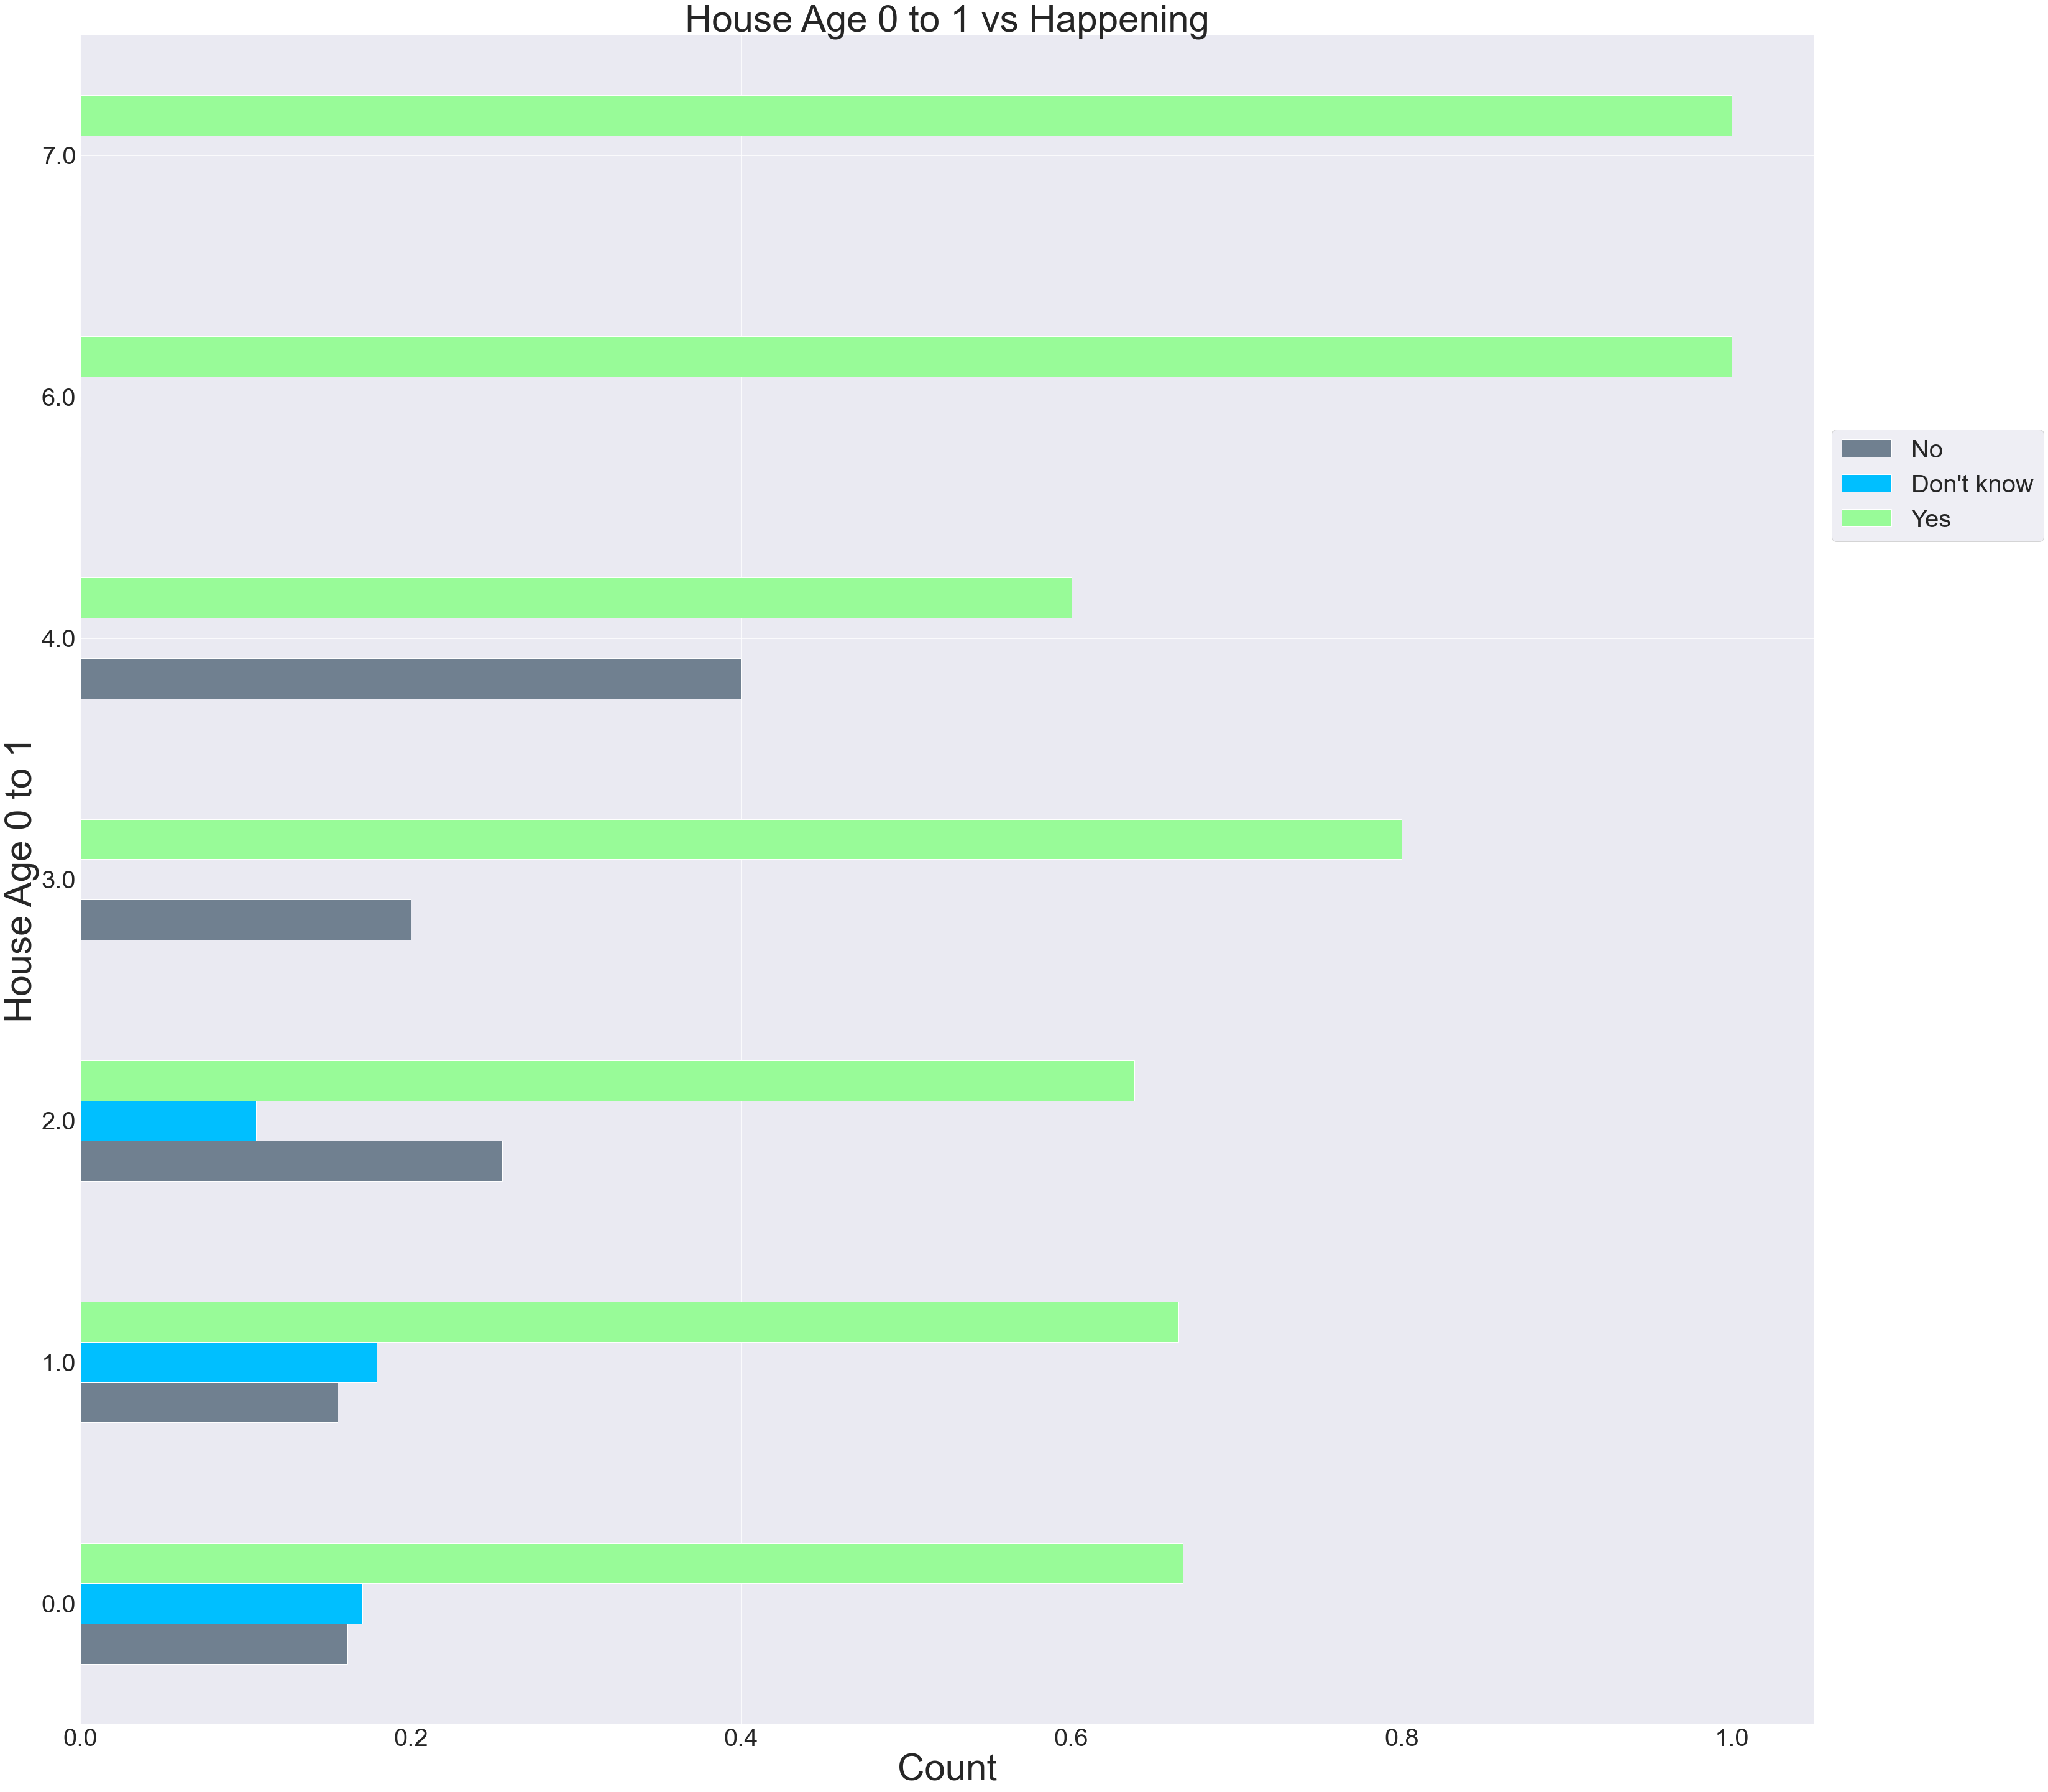

In [77]:
ax = df.groupby('house_ages0to1')['happening'].value_counts(normalize=True).unstack().T.loc[['No',"Don't know",'Yes']].T.plot(kind='barh', figsize=(50,50),
color=['slategrey', 'deepskyblue', 'palegreen'])
ax.set_ylabel('House Age 0 to 1',fontsize=60)
ax.set_xlabel('Count',fontsize=60)
ax.legend(loc= (1.01,0.7),fontsize =40)
ax.set_title('House Age 0 to 1 vs Happening',fontsize =60)
plt.setp(ax.get_xticklabels(), fontsize=40)
plt.setp(ax.get_yticklabels(), fontsize=40);



- **This graph represents the distribution of`happening` vs house members age 0 to 1.**
- **0 is the dominant group** 

In [78]:
df.house_ages2to5.value_counts(normalize=True)

0.0    0.912687
1.0    0.069456
2.0    0.016603
3.0    0.001119
4.0    0.000134
Name: house_ages2to5, dtype: float64

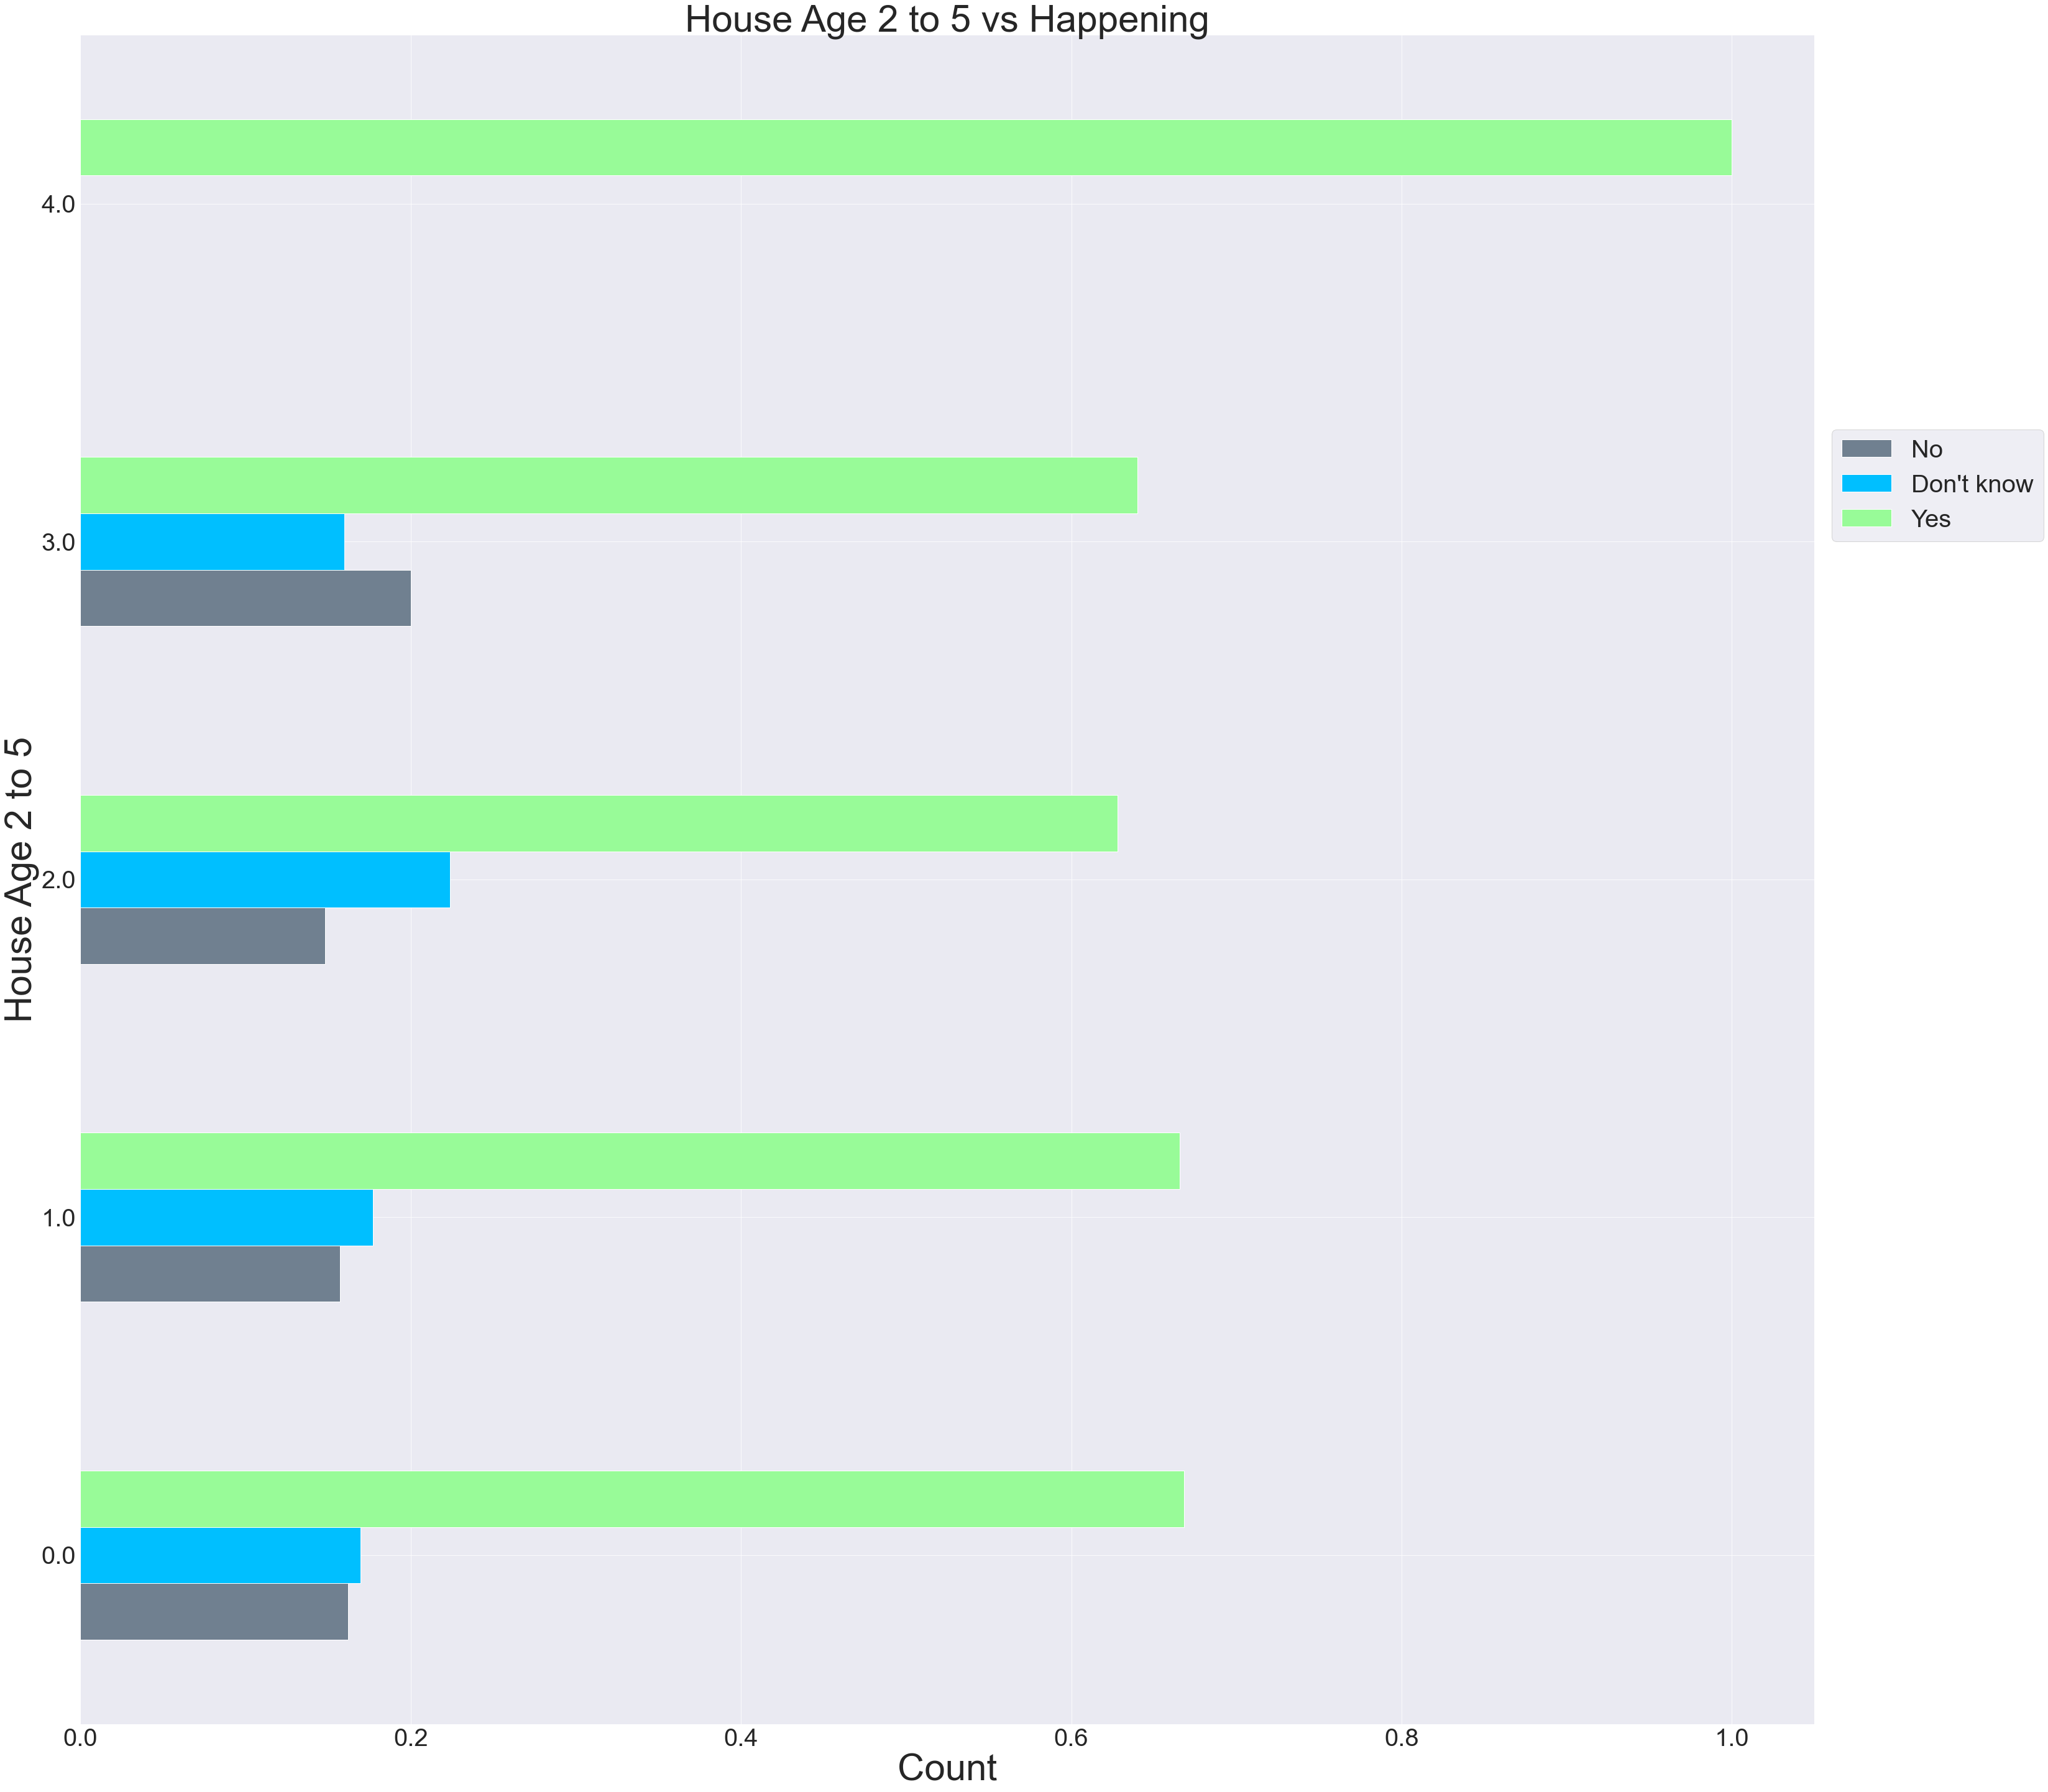

In [79]:
ax = df.groupby('house_ages2to5')['happening'].value_counts(normalize=True).unstack().T.loc[['No',"Don't know",'Yes']].T.plot(kind='barh', figsize=(50,50),
color=['slategrey', 'deepskyblue', 'palegreen'])
ax.set_ylabel('House Age 2 to 5',fontsize=60)
ax.set_xlabel('Count',fontsize=60)
ax.legend(loc= (1.01,0.7),fontsize =40)
ax.set_title('House Age 2 to 5 vs Happening',fontsize =60)
plt.setp(ax.get_xticklabels(), fontsize=40)
plt.setp(ax.get_yticklabels(), fontsize=40);



- **This graph represents the distribution of`happening` vs house members age 2 to 5.**
- **0 is the dominant group** 

In [80]:
df.house_ages6to12.value_counts(normalize=True)

0.0    0.856746
1.0    0.093981
2.0    0.039651
3.0    0.008055
4.0    0.001387
5.0    0.000090
6.0    0.000090
Name: house_ages6to12, dtype: float64

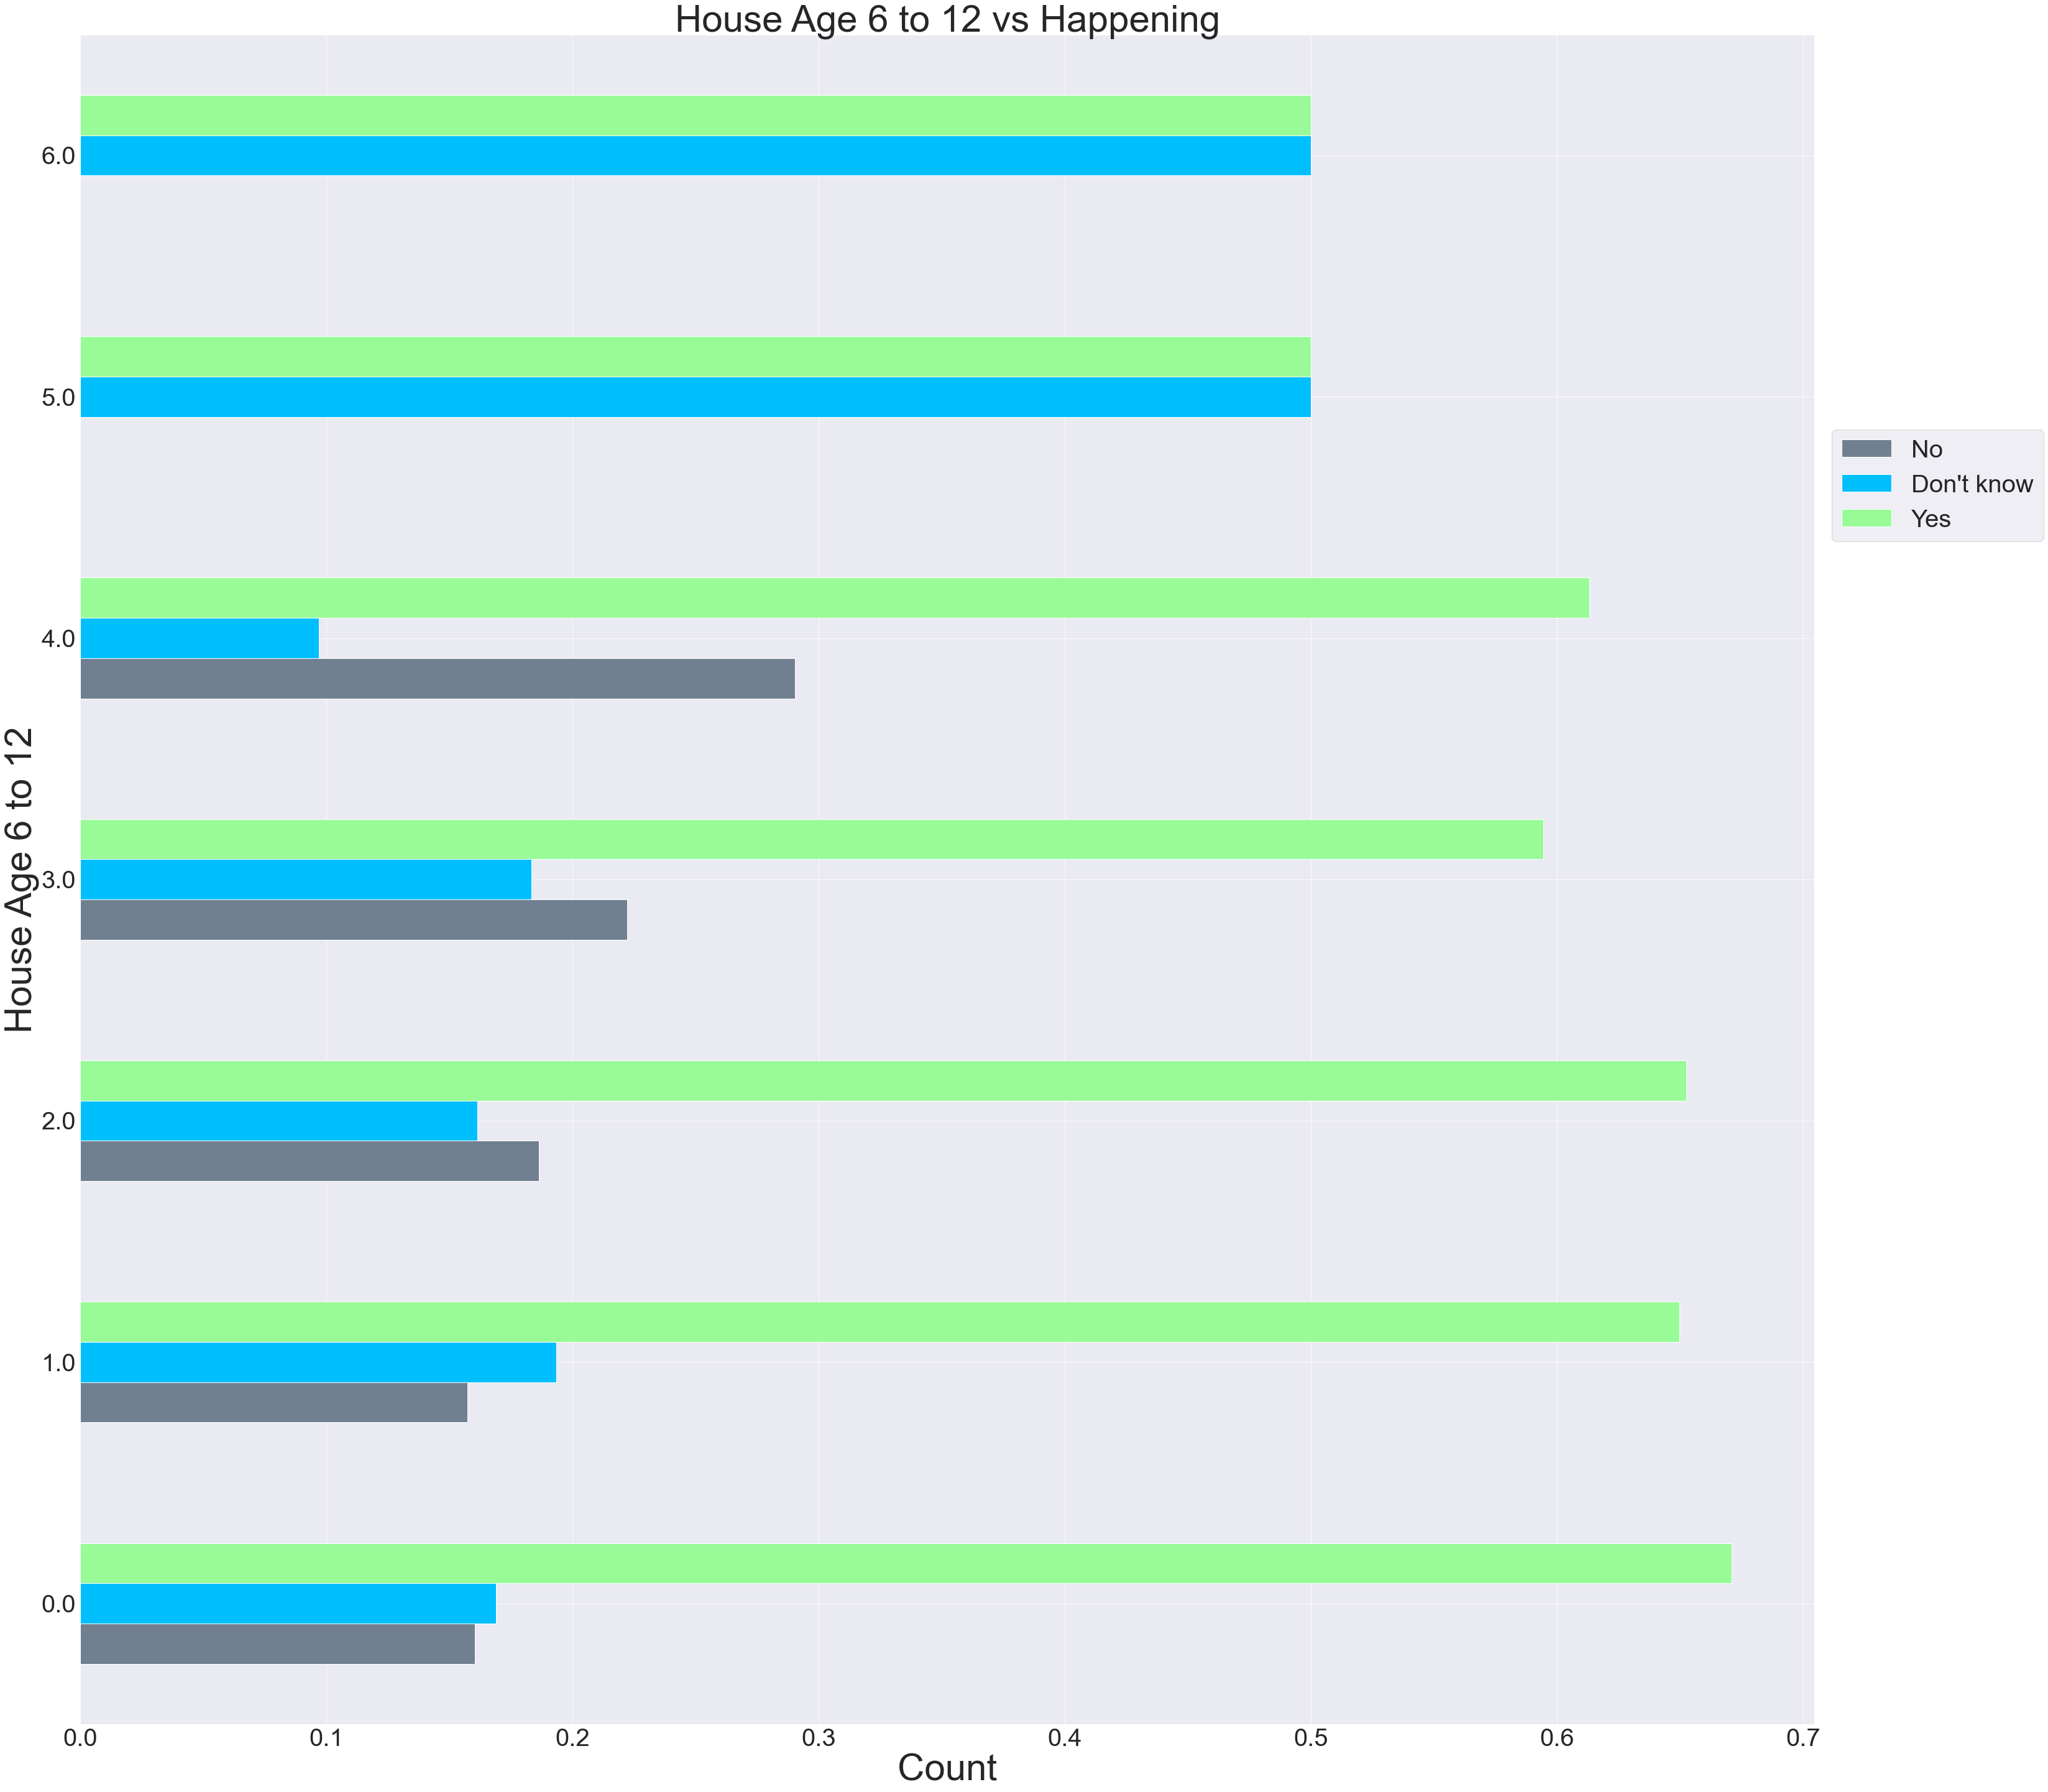

In [81]:
ax = df.groupby('house_ages6to12')['happening'].value_counts(normalize=True).unstack().T.loc[['No',"Don't know",'Yes']].T.plot(kind='barh', figsize=(50,50),
color=['slategrey', 'deepskyblue', 'palegreen'])
ax.set_ylabel('House Age 6 to 12',fontsize=60)
ax.set_xlabel('Count',fontsize=60)
ax.legend(loc= (1.01,0.7),fontsize =40)
ax.set_title('House Age 6 to 12 vs Happening',fontsize =60)
plt.setp(ax.get_xticklabels(), fontsize=40)
plt.setp(ax.get_yticklabels(), fontsize=40);



- **This graph represents the distribution of`happening` vs house members age 6 to 12.** 
- **0 is the dominant group** 


In [82]:
df.house_ages13to17.value_counts(normalize=True)

0.0    0.853524
1.0    0.109868
2.0    0.031774
3.0    0.004162
4.0    0.000671
Name: house_ages13to17, dtype: float64

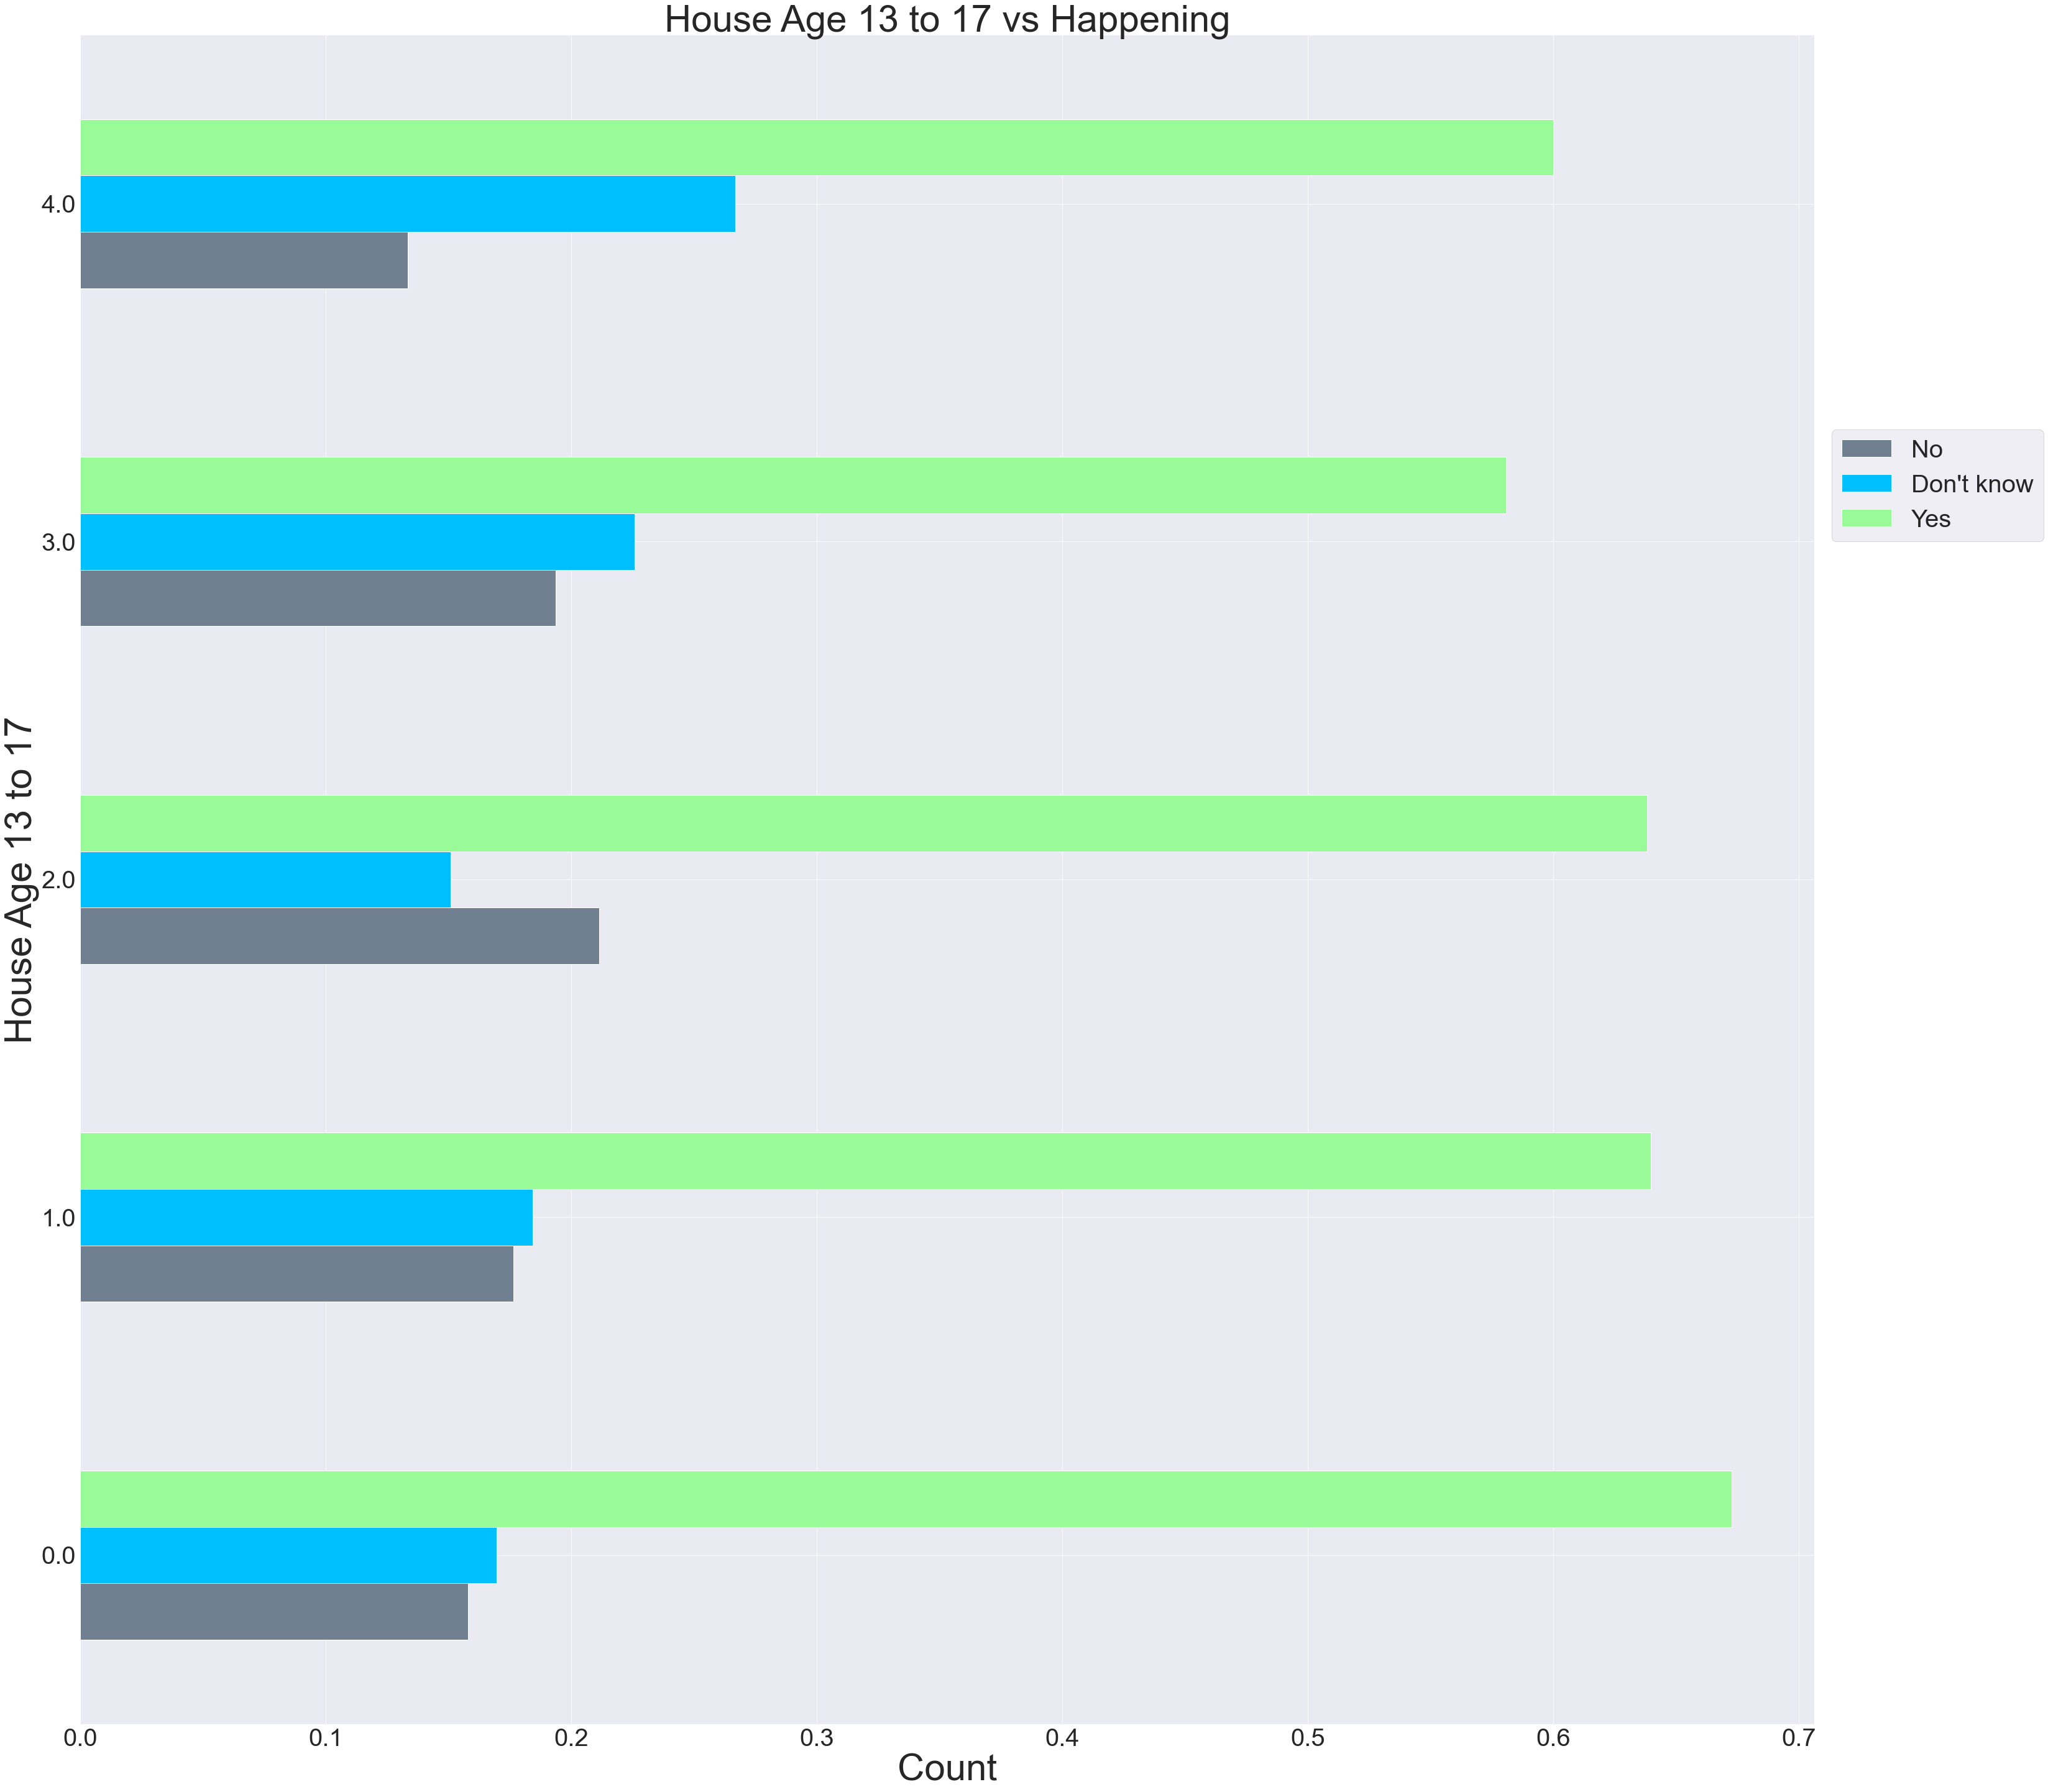

In [83]:
ax = df.groupby('house_ages13to17')['happening'].value_counts(normalize=True).unstack().T.loc[['No',"Don't know",'Yes']].T.plot(kind='barh', figsize=(50,50),
color=['slategrey', 'deepskyblue', 'palegreen'])
ax.set_ylabel('House Age 13 to 17',fontsize=60)
ax.set_xlabel('Count',fontsize=60)
ax.legend(loc= (1.01,0.7),fontsize =40)
ax.set_title('House Age 13 to 17 vs Happening',fontsize =60)
plt.setp(ax.get_xticklabels(), fontsize=40)
plt.setp(ax.get_yticklabels(), fontsize=40);



- **This graph represents the distribution of`happening` vs house members age 13 to 17.** 
- **0 is the dominant group** 


In [84]:
df.house_ages18plus.value_counts(normalize=True)

2.0     0.554800
1.0     0.215887
3.0     0.147997
4.0     0.058089
5.0     0.015842
6.0     0.004162
7.0     0.002059
8.0     0.000582
12.0    0.000358
9.0     0.000134
10.0    0.000090
Name: house_ages18plus, dtype: float64

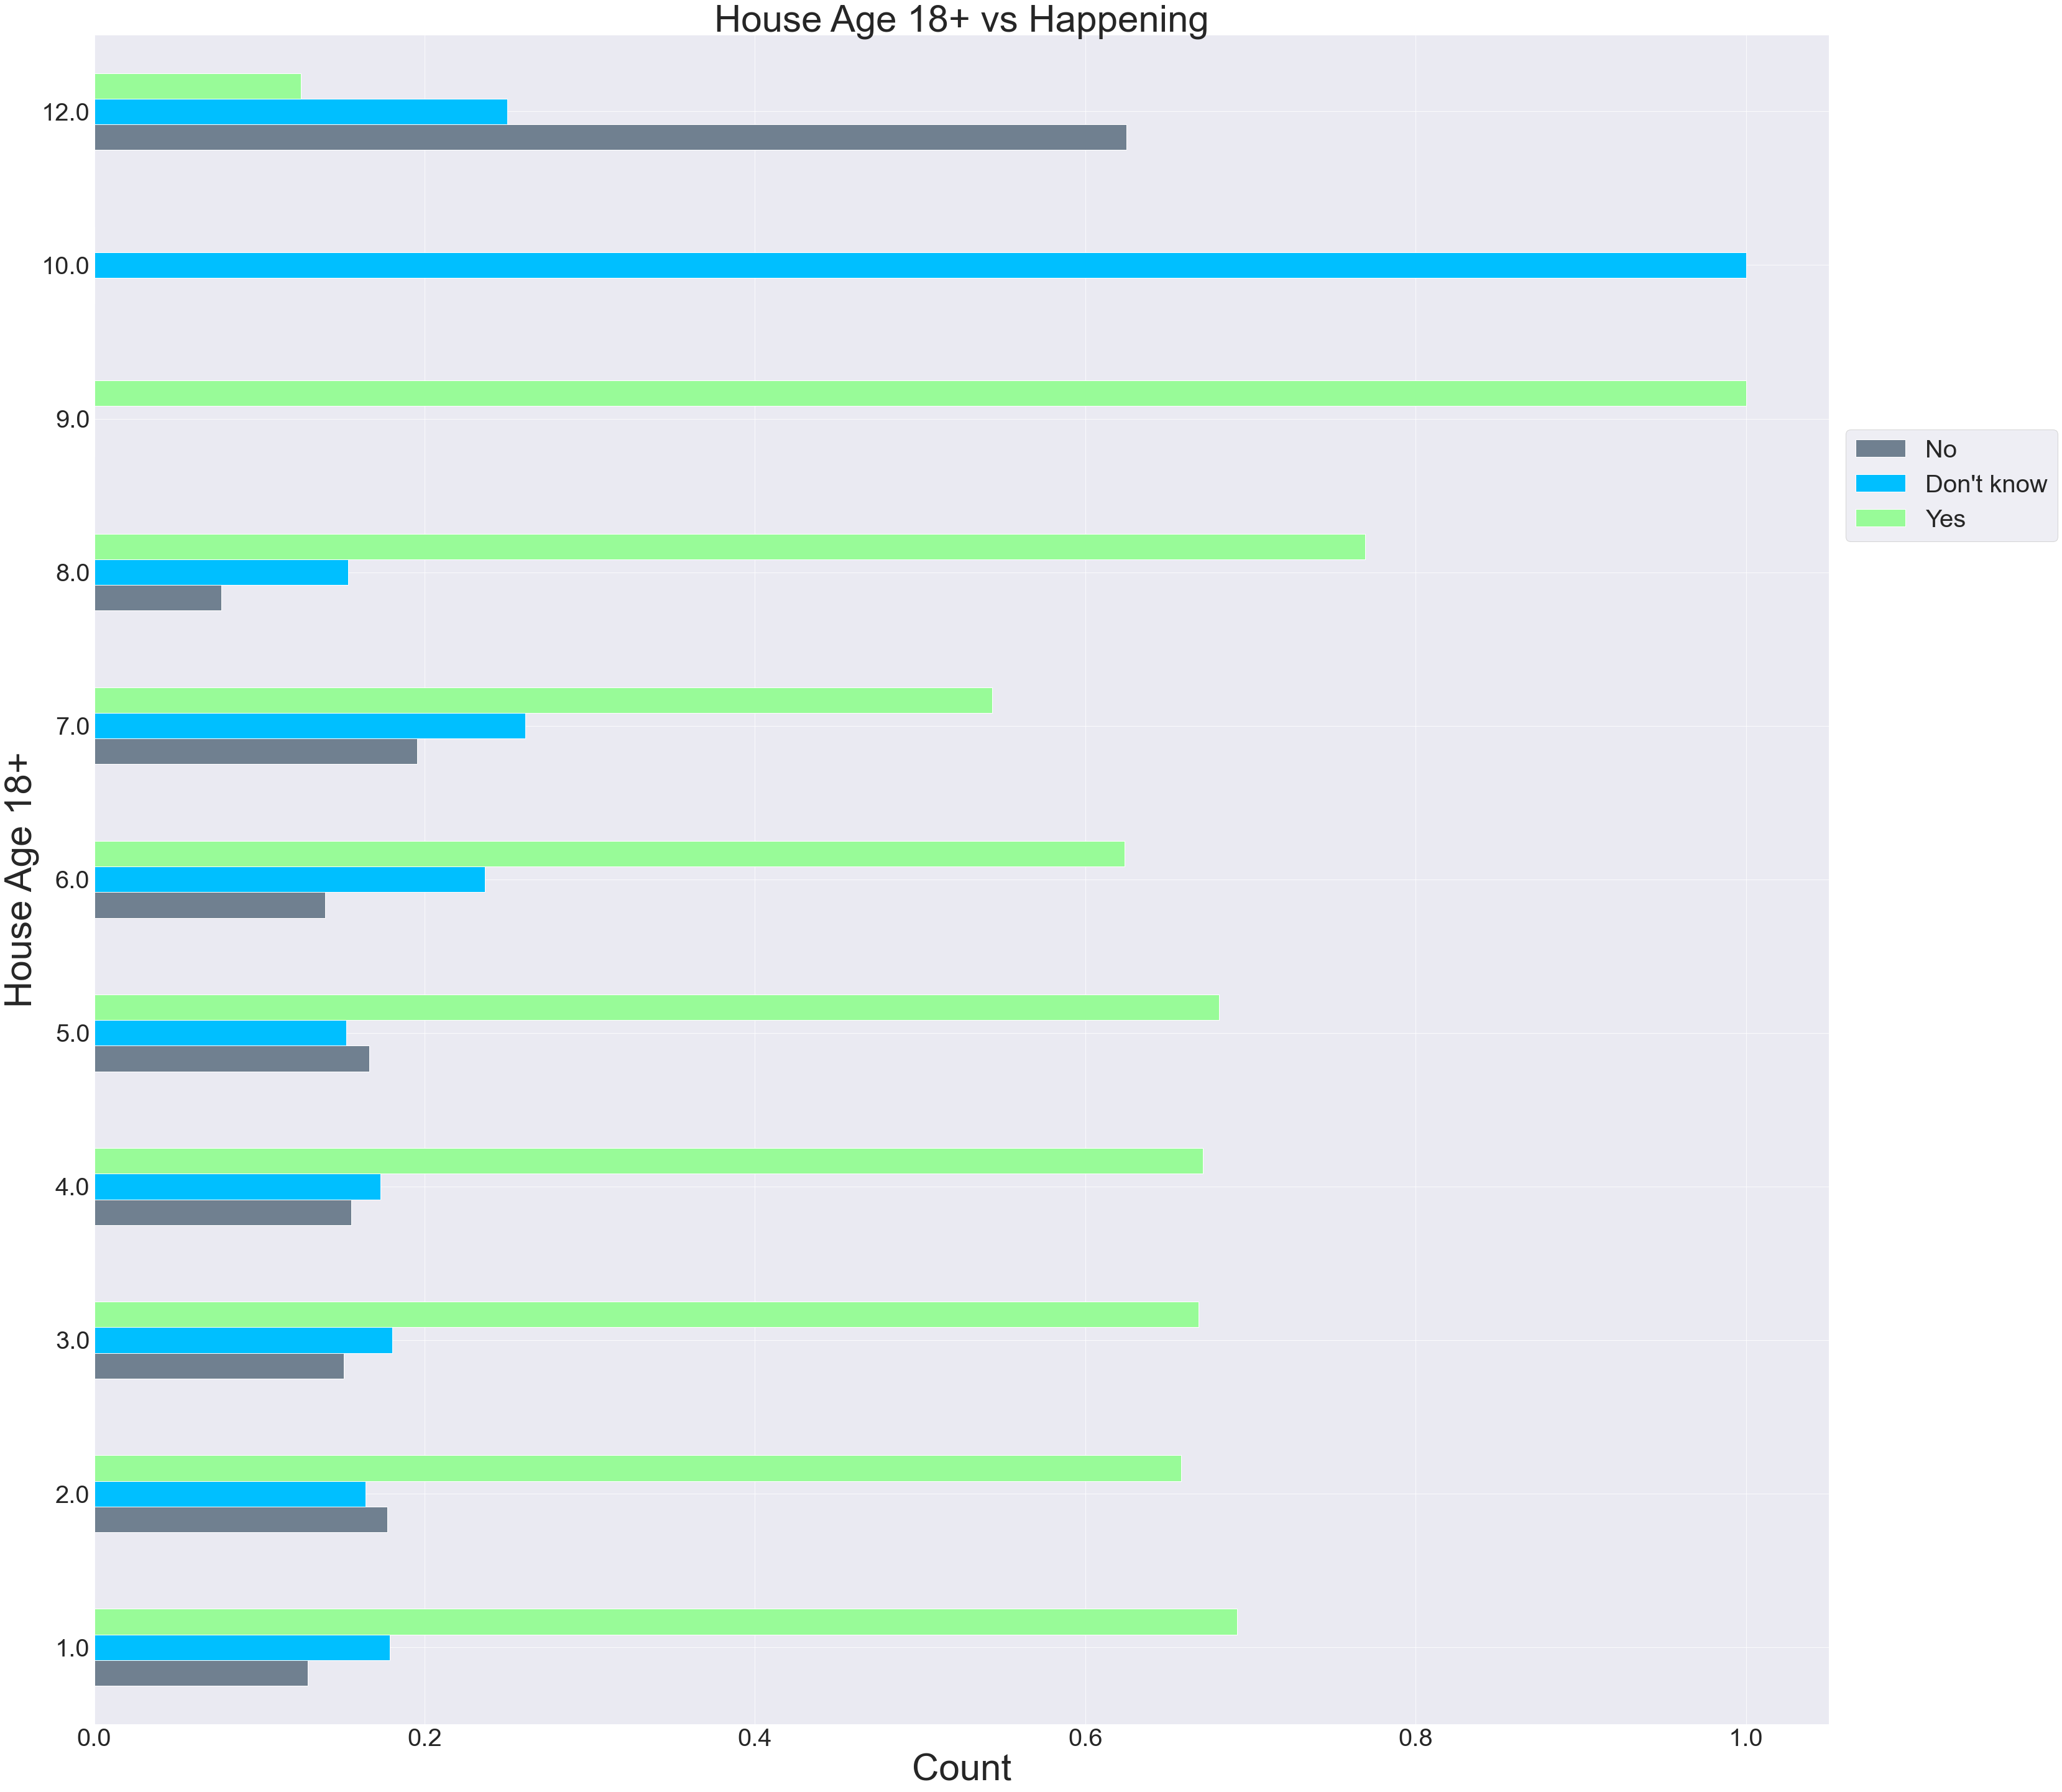

In [86]:
ax = df.groupby('house_ages18plus')['happening'].value_counts(normalize=True).unstack().T.loc[['No',"Don't know",'Yes']].T.plot(kind='barh', figsize=(50,50),
color=['slategrey', 'deepskyblue', 'palegreen'])
ax.set_ylabel('House Age 18+',fontsize=60)
ax.set_xlabel('Count',fontsize=60)
ax.legend(loc= (1.01,0.7),fontsize =40)
ax.set_title('House Age 18+ vs Happening',fontsize =60)
plt.setp(ax.get_xticklabels(), fontsize=40)
plt.setp(ax.get_yticklabels(), fontsize=40);



- **This graph represents the distribution of`happening` vs house members age 18+.** 
- **0 is the dominant group** 


In [87]:
df.house_type.value_counts(normalize=True)

One-family house detached from any other house                                    0.722309
Building with 2 or more apartments                                                0.155023
One-family house attached to one or more houses (such as a condo or townhouse)    0.075811
Mobile home                                                                       0.044350
Boat, RV, van, etc.                                                               0.002506
Name: house_type, dtype: float64

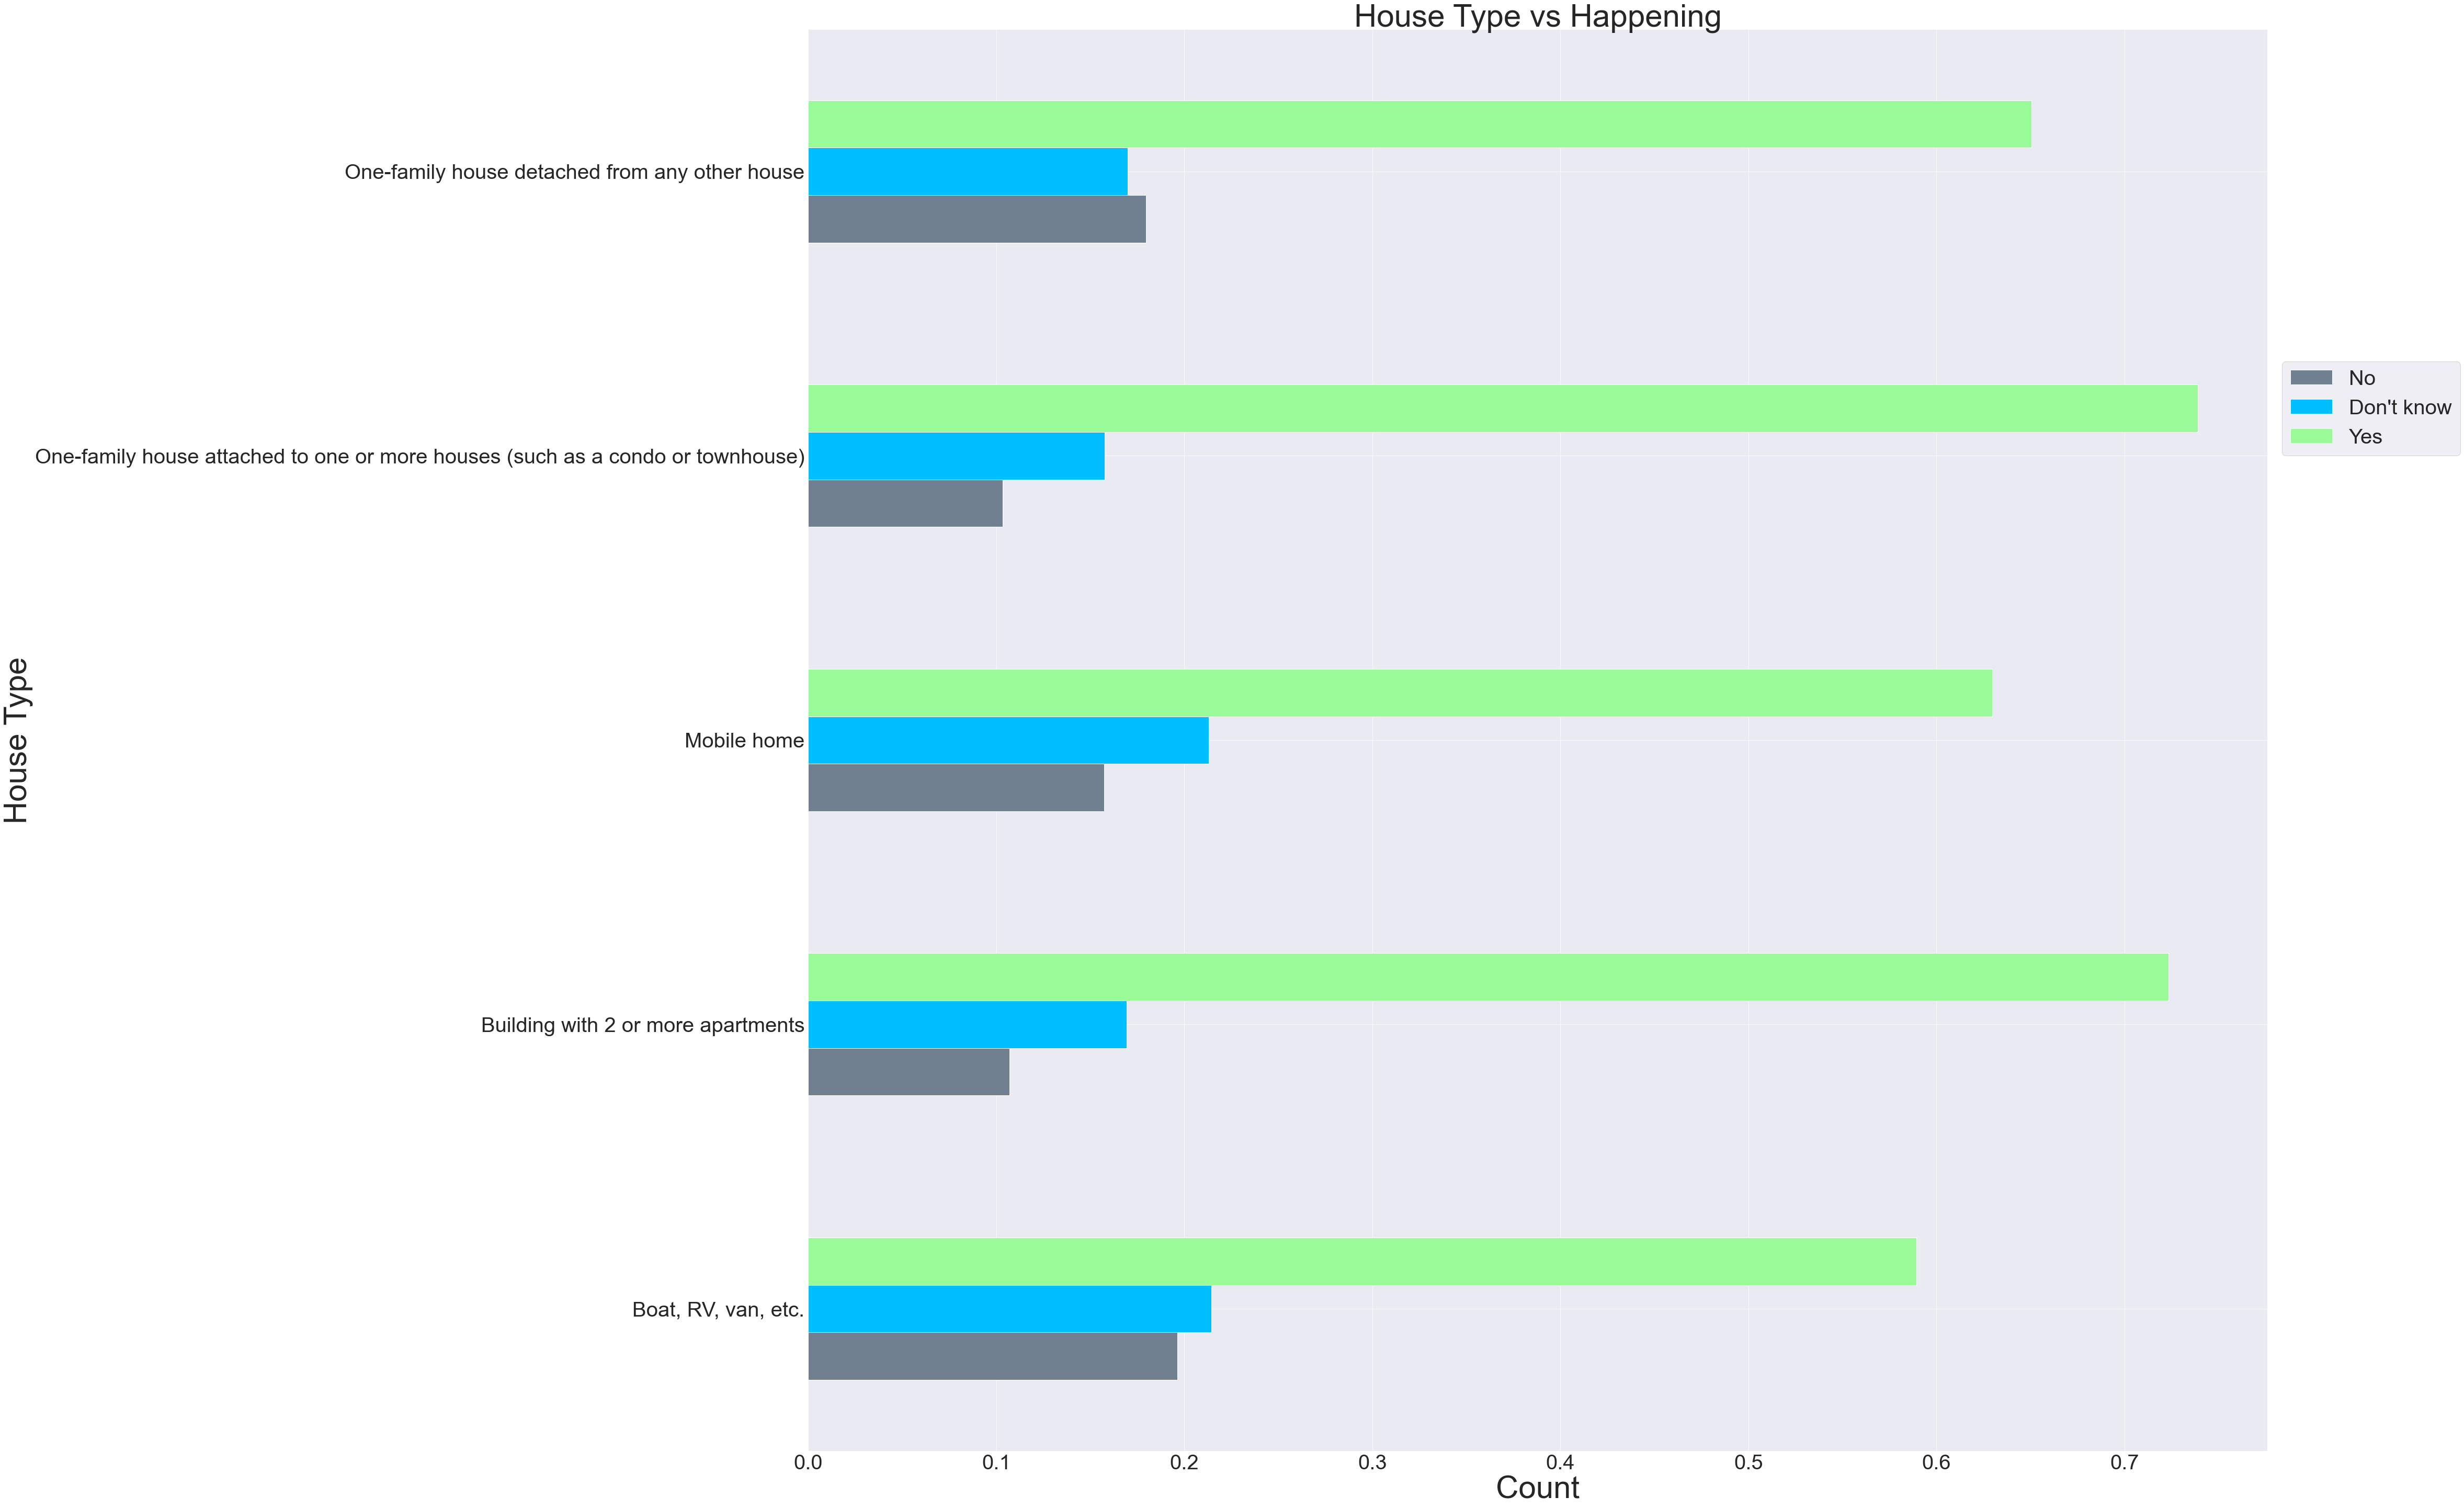

In [88]:
ax = df.groupby('house_type')['happening'].value_counts(normalize=True).unstack().T.loc[['No',"Don't know",'Yes']].T.plot(kind='barh', figsize=(50,50),
color=['slategrey', 'deepskyblue', 'palegreen'])
ax.set_ylabel('House Type',fontsize=60)
ax.set_xlabel('Count',fontsize=60)
ax.legend(loc= (1.01,0.7),fontsize =40)
ax.set_title('House Type vs Happening',fontsize =60)
plt.setp(ax.get_xticklabels(), fontsize=40)
plt.setp(ax.get_yticklabels(), fontsize=40);



- **One family house are pre-dominant.** 
- **People with mobile homes seem to have a higher proportion of non-believers of climate change** 


In [89]:
df.house_own.value_counts(normalize=True)

Owned by you or someone in your household    0.746565
Rented                                       0.229447
Occupied without payment of rent             0.023987
Name: house_own, dtype: float64

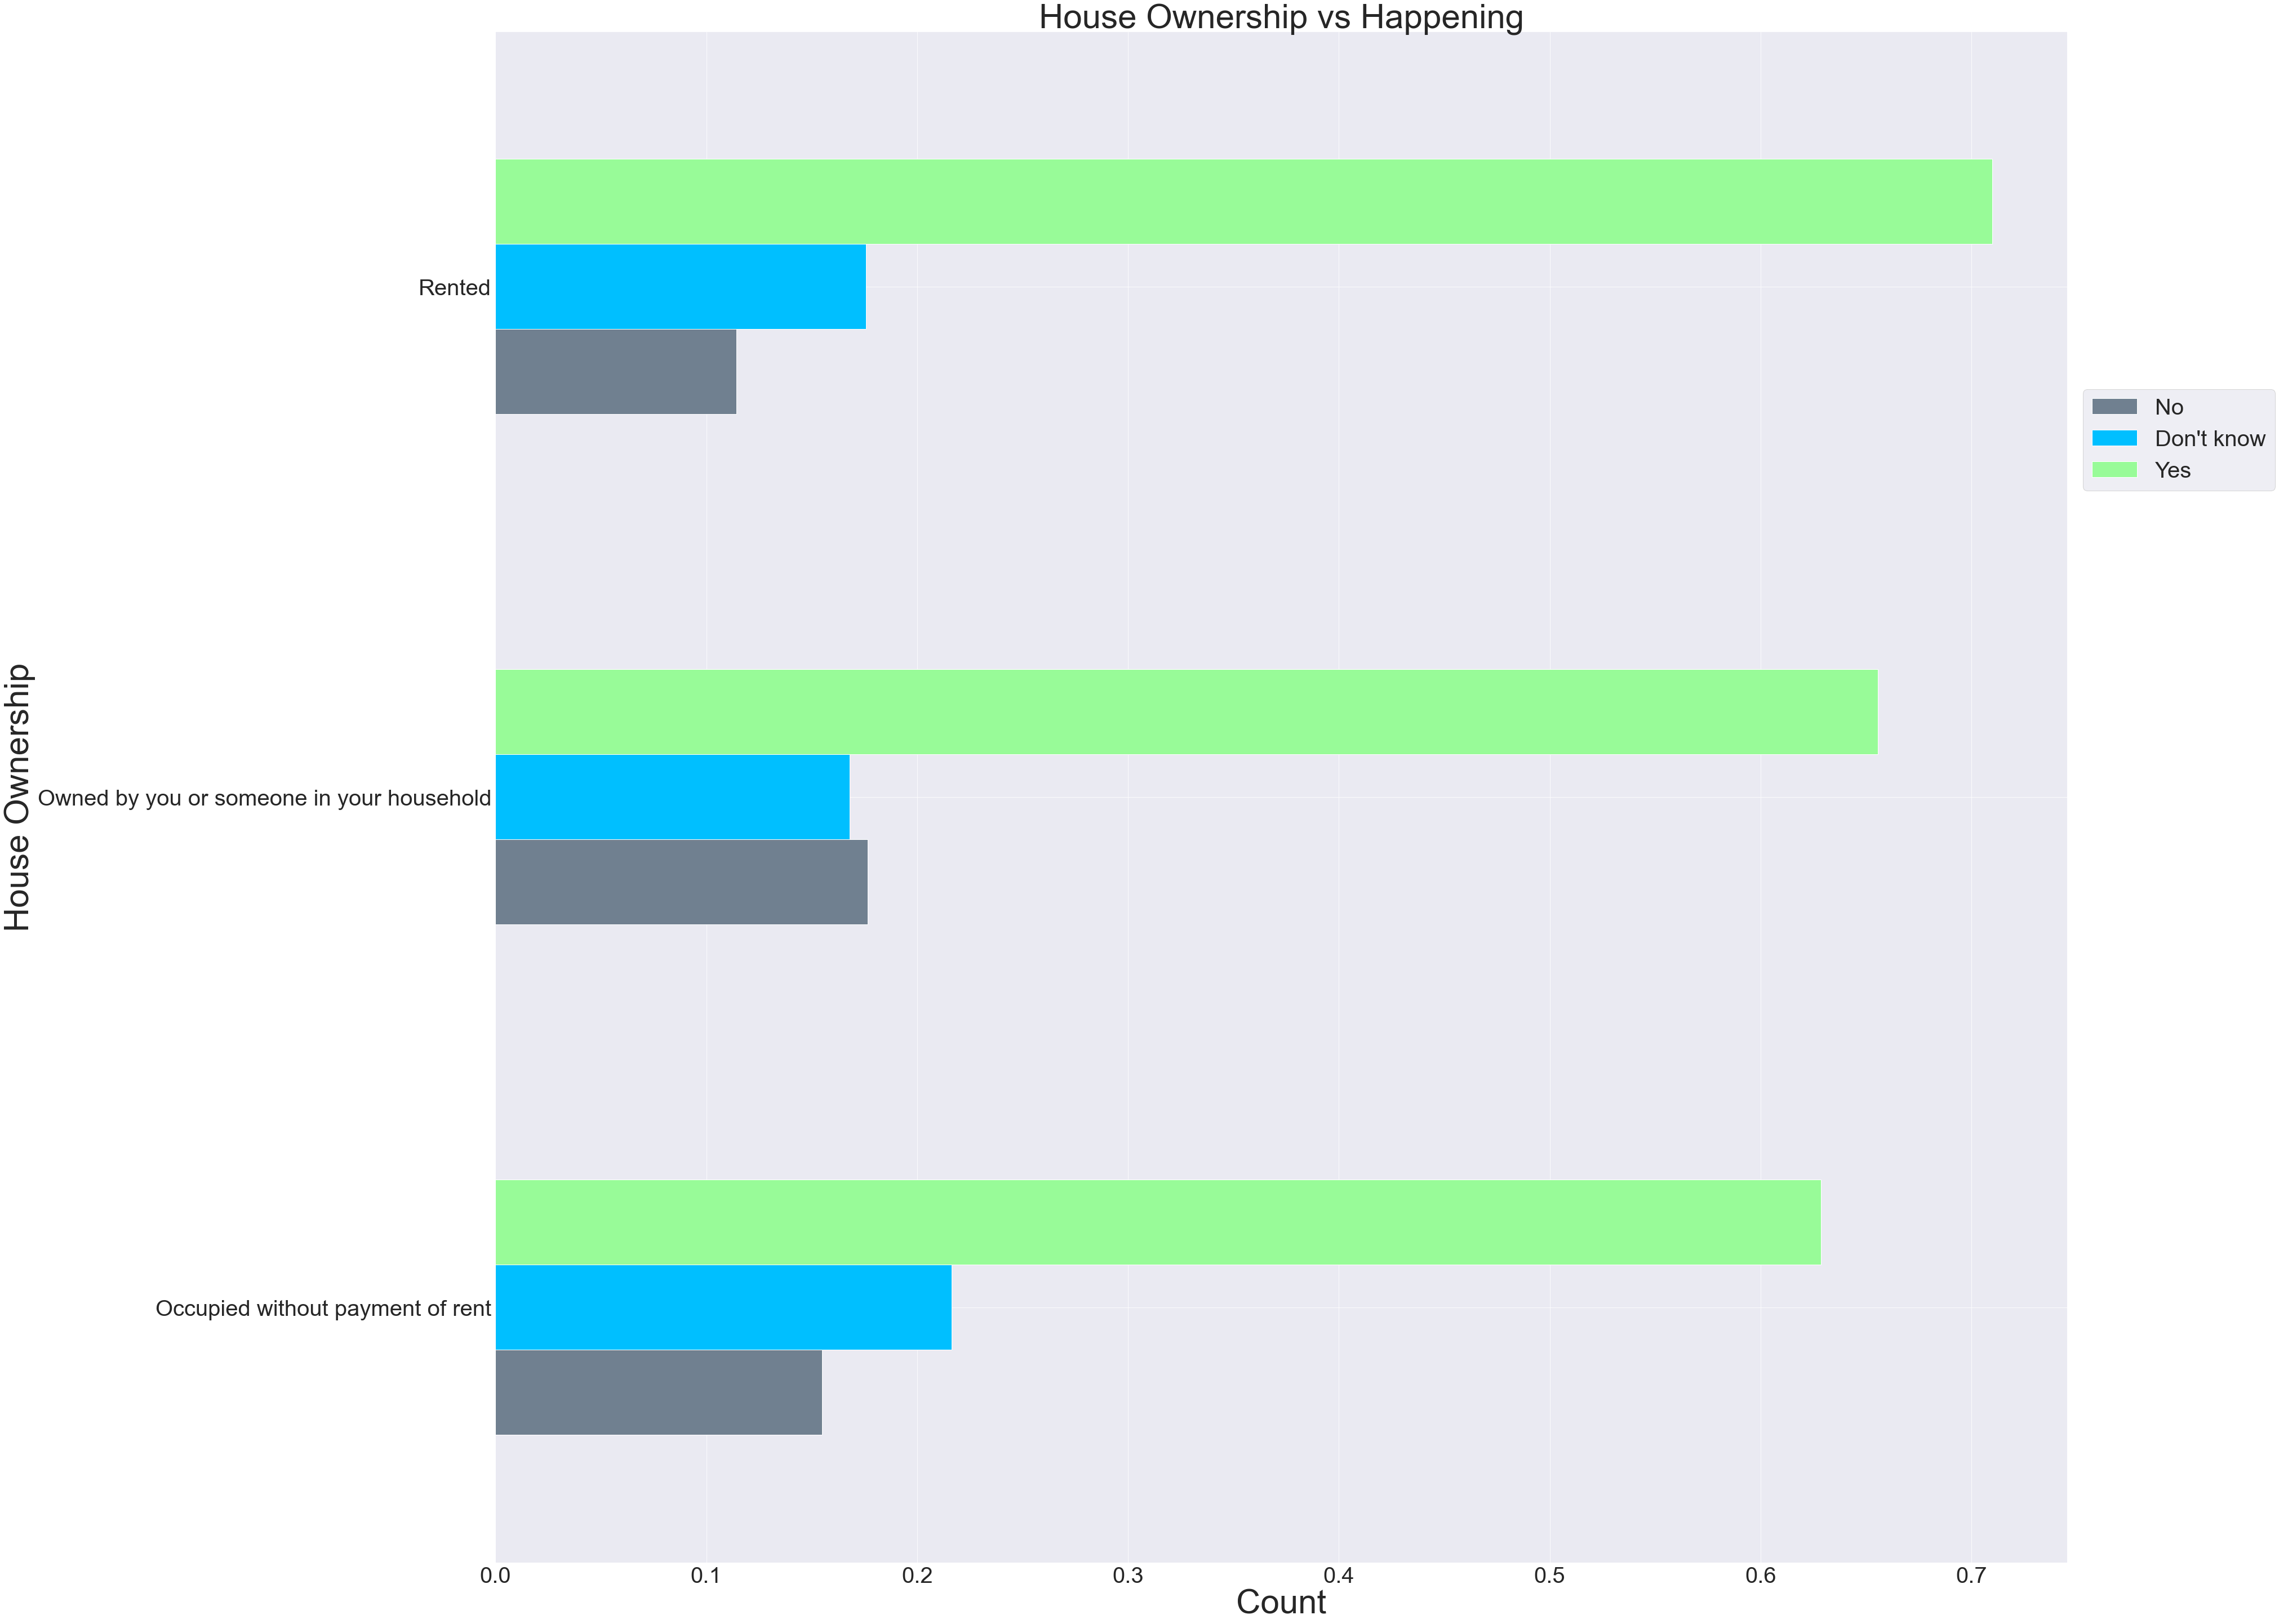

In [90]:
ax = df.groupby('house_own')['happening'].value_counts(normalize=True).unstack().T.loc[['No',"Don't know",'Yes']].T.plot(kind='barh', figsize=(50,50),
color=['slategrey', 'deepskyblue', 'palegreen'])
ax.set_ylabel('House Ownership',fontsize=60)
ax.set_xlabel('Count',fontsize=60)
ax.legend(loc= (1.01,0.7),fontsize =40)
ax.set_title('House Ownership vs Happening',fontsize =60)
plt.setp(ax.get_xticklabels(), fontsize=40)
plt.setp(ax.get_yticklabels(), fontsize=40);



- **houses owned by an individual or a family member are pre-dominant.** 


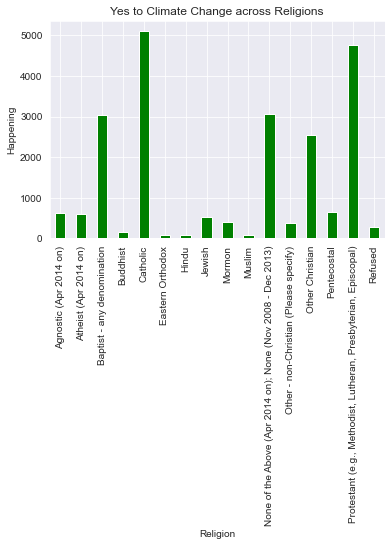

In [91]:
ax = df.groupby(['religion'])['happening'].count().plot(kind='bar',stacked = True, color='green')
ax.set_xlabel('Religion')
ax.set_ylabel('Happening')
ax.set_title('Yes to Climate Change across Religions');




- **This graph represents the believers in climate change across religions.** 
- **The numbers vary due to different population of respective religion people** 
- **As expected for American society Catholic and Protestant have highest number of counts followed by Atheists and Baptists**

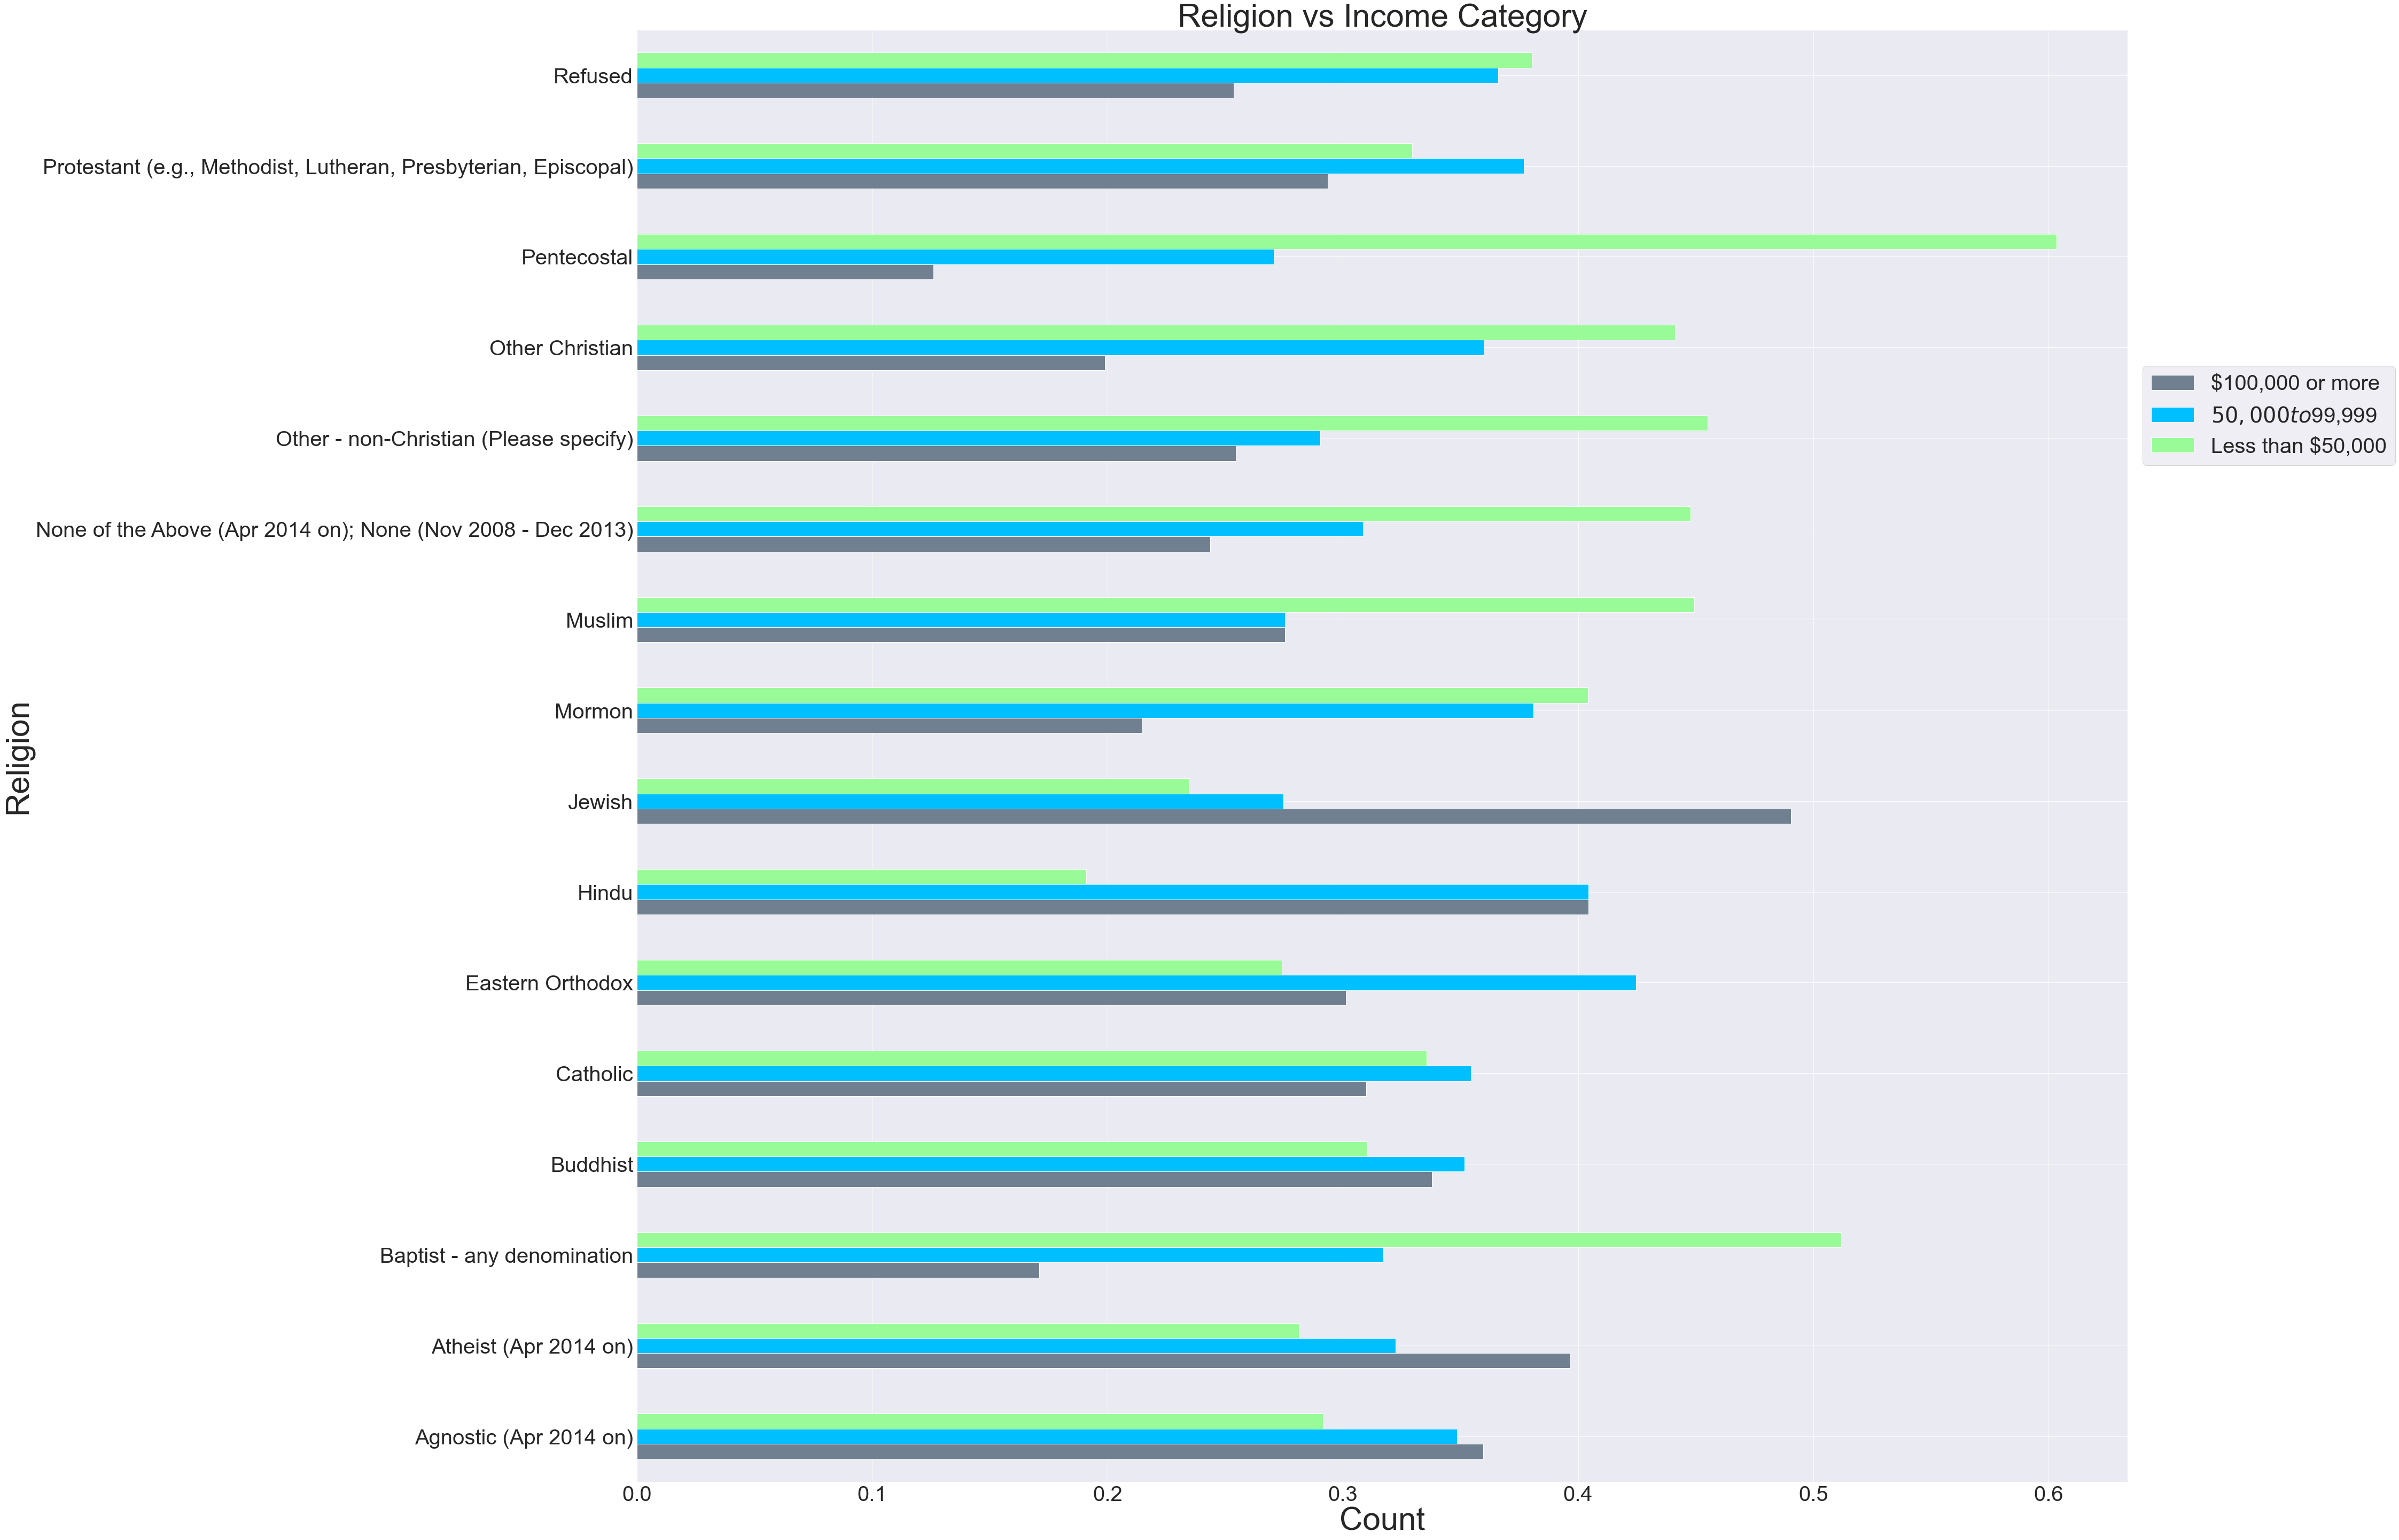

In [96]:
ax = df.groupby(['religion'])['income_category'].value_counts(normalize=True).unstack().plot(kind='barh', figsize=(50,50),
color=['slategrey', 'deepskyblue', 'palegreen'])
ax.set_ylabel('Religion',fontsize=60)
ax.set_xlabel('Count',fontsize=60)
ax.legend(loc= (1.01,0.7),fontsize =40)
ax.set_title('Religion vs Income Category',fontsize =60)
plt.setp(ax.get_xticklabels(), fontsize=40)
plt.setp(ax.get_yticklabels(), fontsize=40);


- **High income category is prominent in Jewish, Atheist and Agnostic**
- **Middle income category is prominent in Protestant, Catholic, Eastern Orthodox**
- **Low Income category is predominant in all other religions**


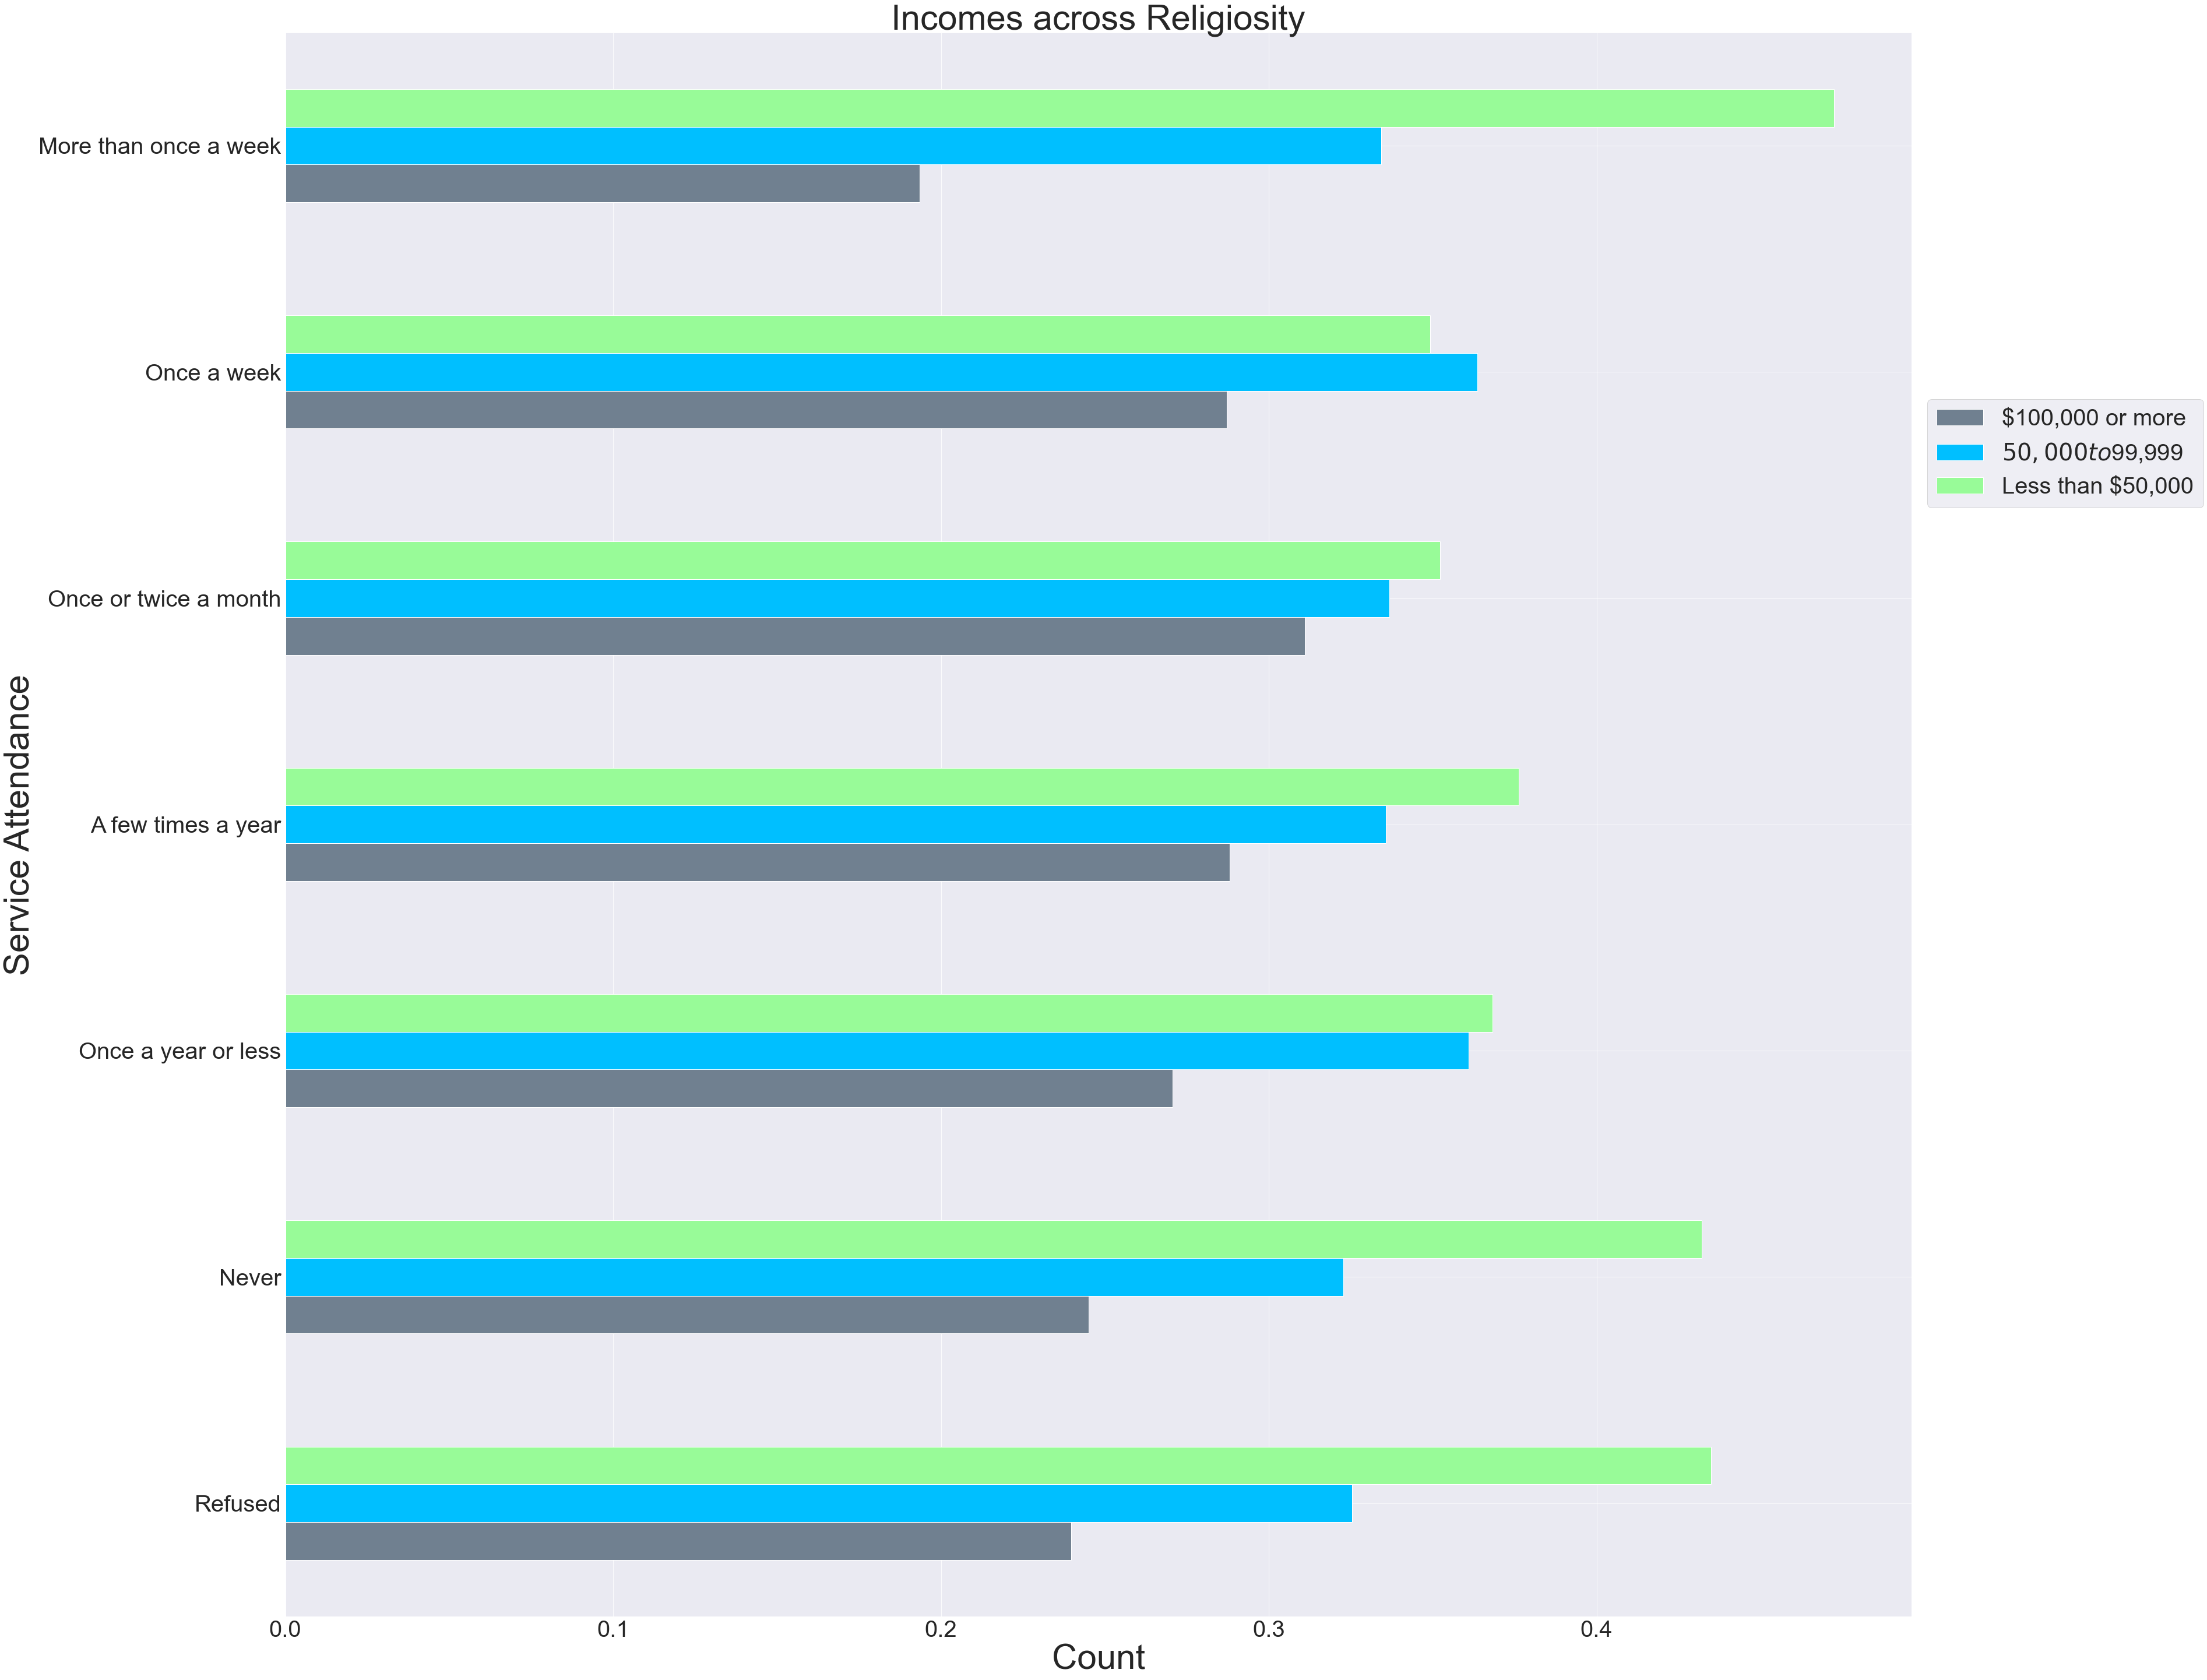

In [104]:
ax = df.groupby(['service_attendance'])['income_category'].value_counts(normalize=True).unstack().plot(kind='barh', figsize=(50,50),
                color=['slategrey', 'deepskyblue', 'palegreen'])
ax.set_ylabel('Service Attendance',fontsize=60)
ax.set_xlabel('Count',fontsize=60)
ax.legend(loc= (1.01,0.7),fontsize =40)
ax.set_title('Incomes across Religiosity',fontsize=60)
plt.setp(ax.get_xticklabels(), fontsize=40)
ax.set_yticklabels(['Refused','Never','Once a year or less','A few times a year','Once or twice a month','Once a week','More than once a week'],fontsize=40);
#-1. Refused
# 1. Never
# 2. Once a year or less
# 3. A few times a year
# 4. Once or twice a month
# 5. Once a week
# 6. More than once a week


- **To my surprise people who never go for service attendance(marked 1) have the most people in low income category**
- **Low income category is most represented across various groups**


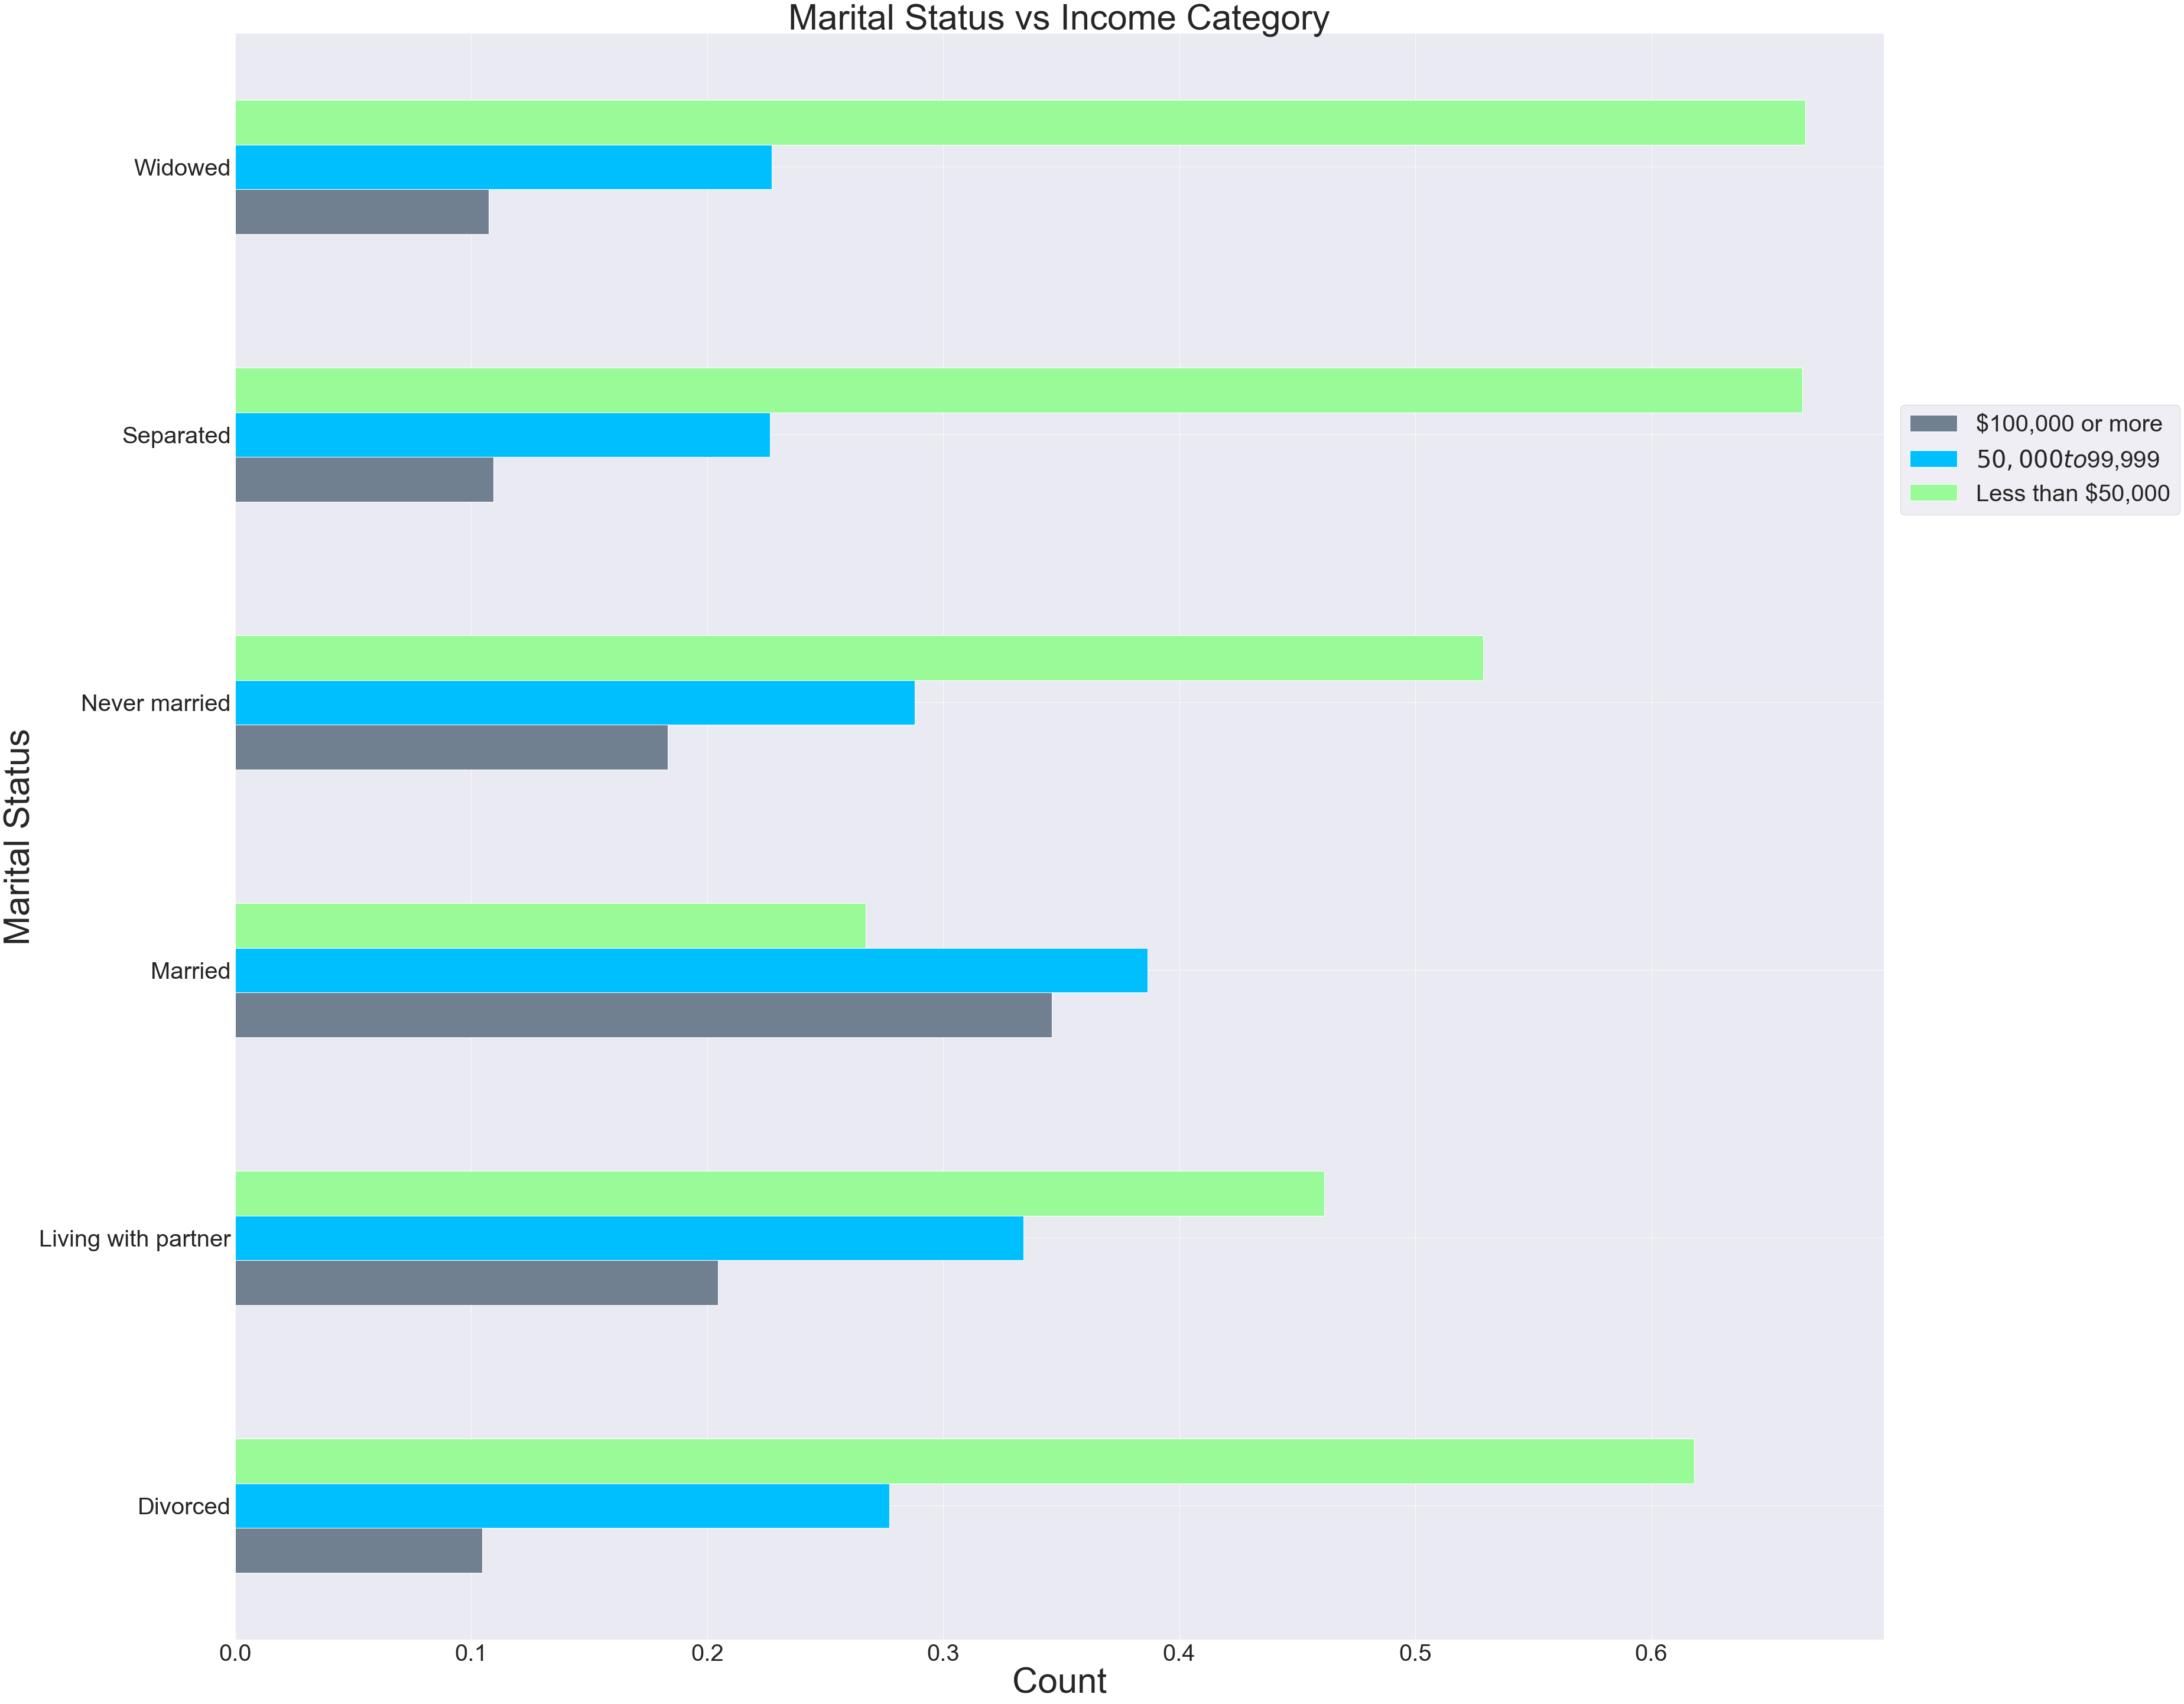

In [106]:
ax = df.groupby(['marit_status'])['income_category'].value_counts(normalize=True).unstack().plot(kind='barh', figsize=(50,50),
color=['slategrey', 'deepskyblue', 'palegreen'])
ax.set_ylabel('Marital Status',fontsize=60)
ax.set_xlabel('Count',fontsize=60)
ax.legend(loc= (1.01,0.7),fontsize =40)
ax.set_title('Marital Status vs Income Category',fontsize =60)
plt.setp(ax.get_xticklabels(), fontsize=40)
plt.setp(ax.get_yticklabels(), fontsize=40);

- **Low Income category has most people lying in it except for the Married group where Middle Income is predominant**
- **Married people are likely to have more income than the rest**


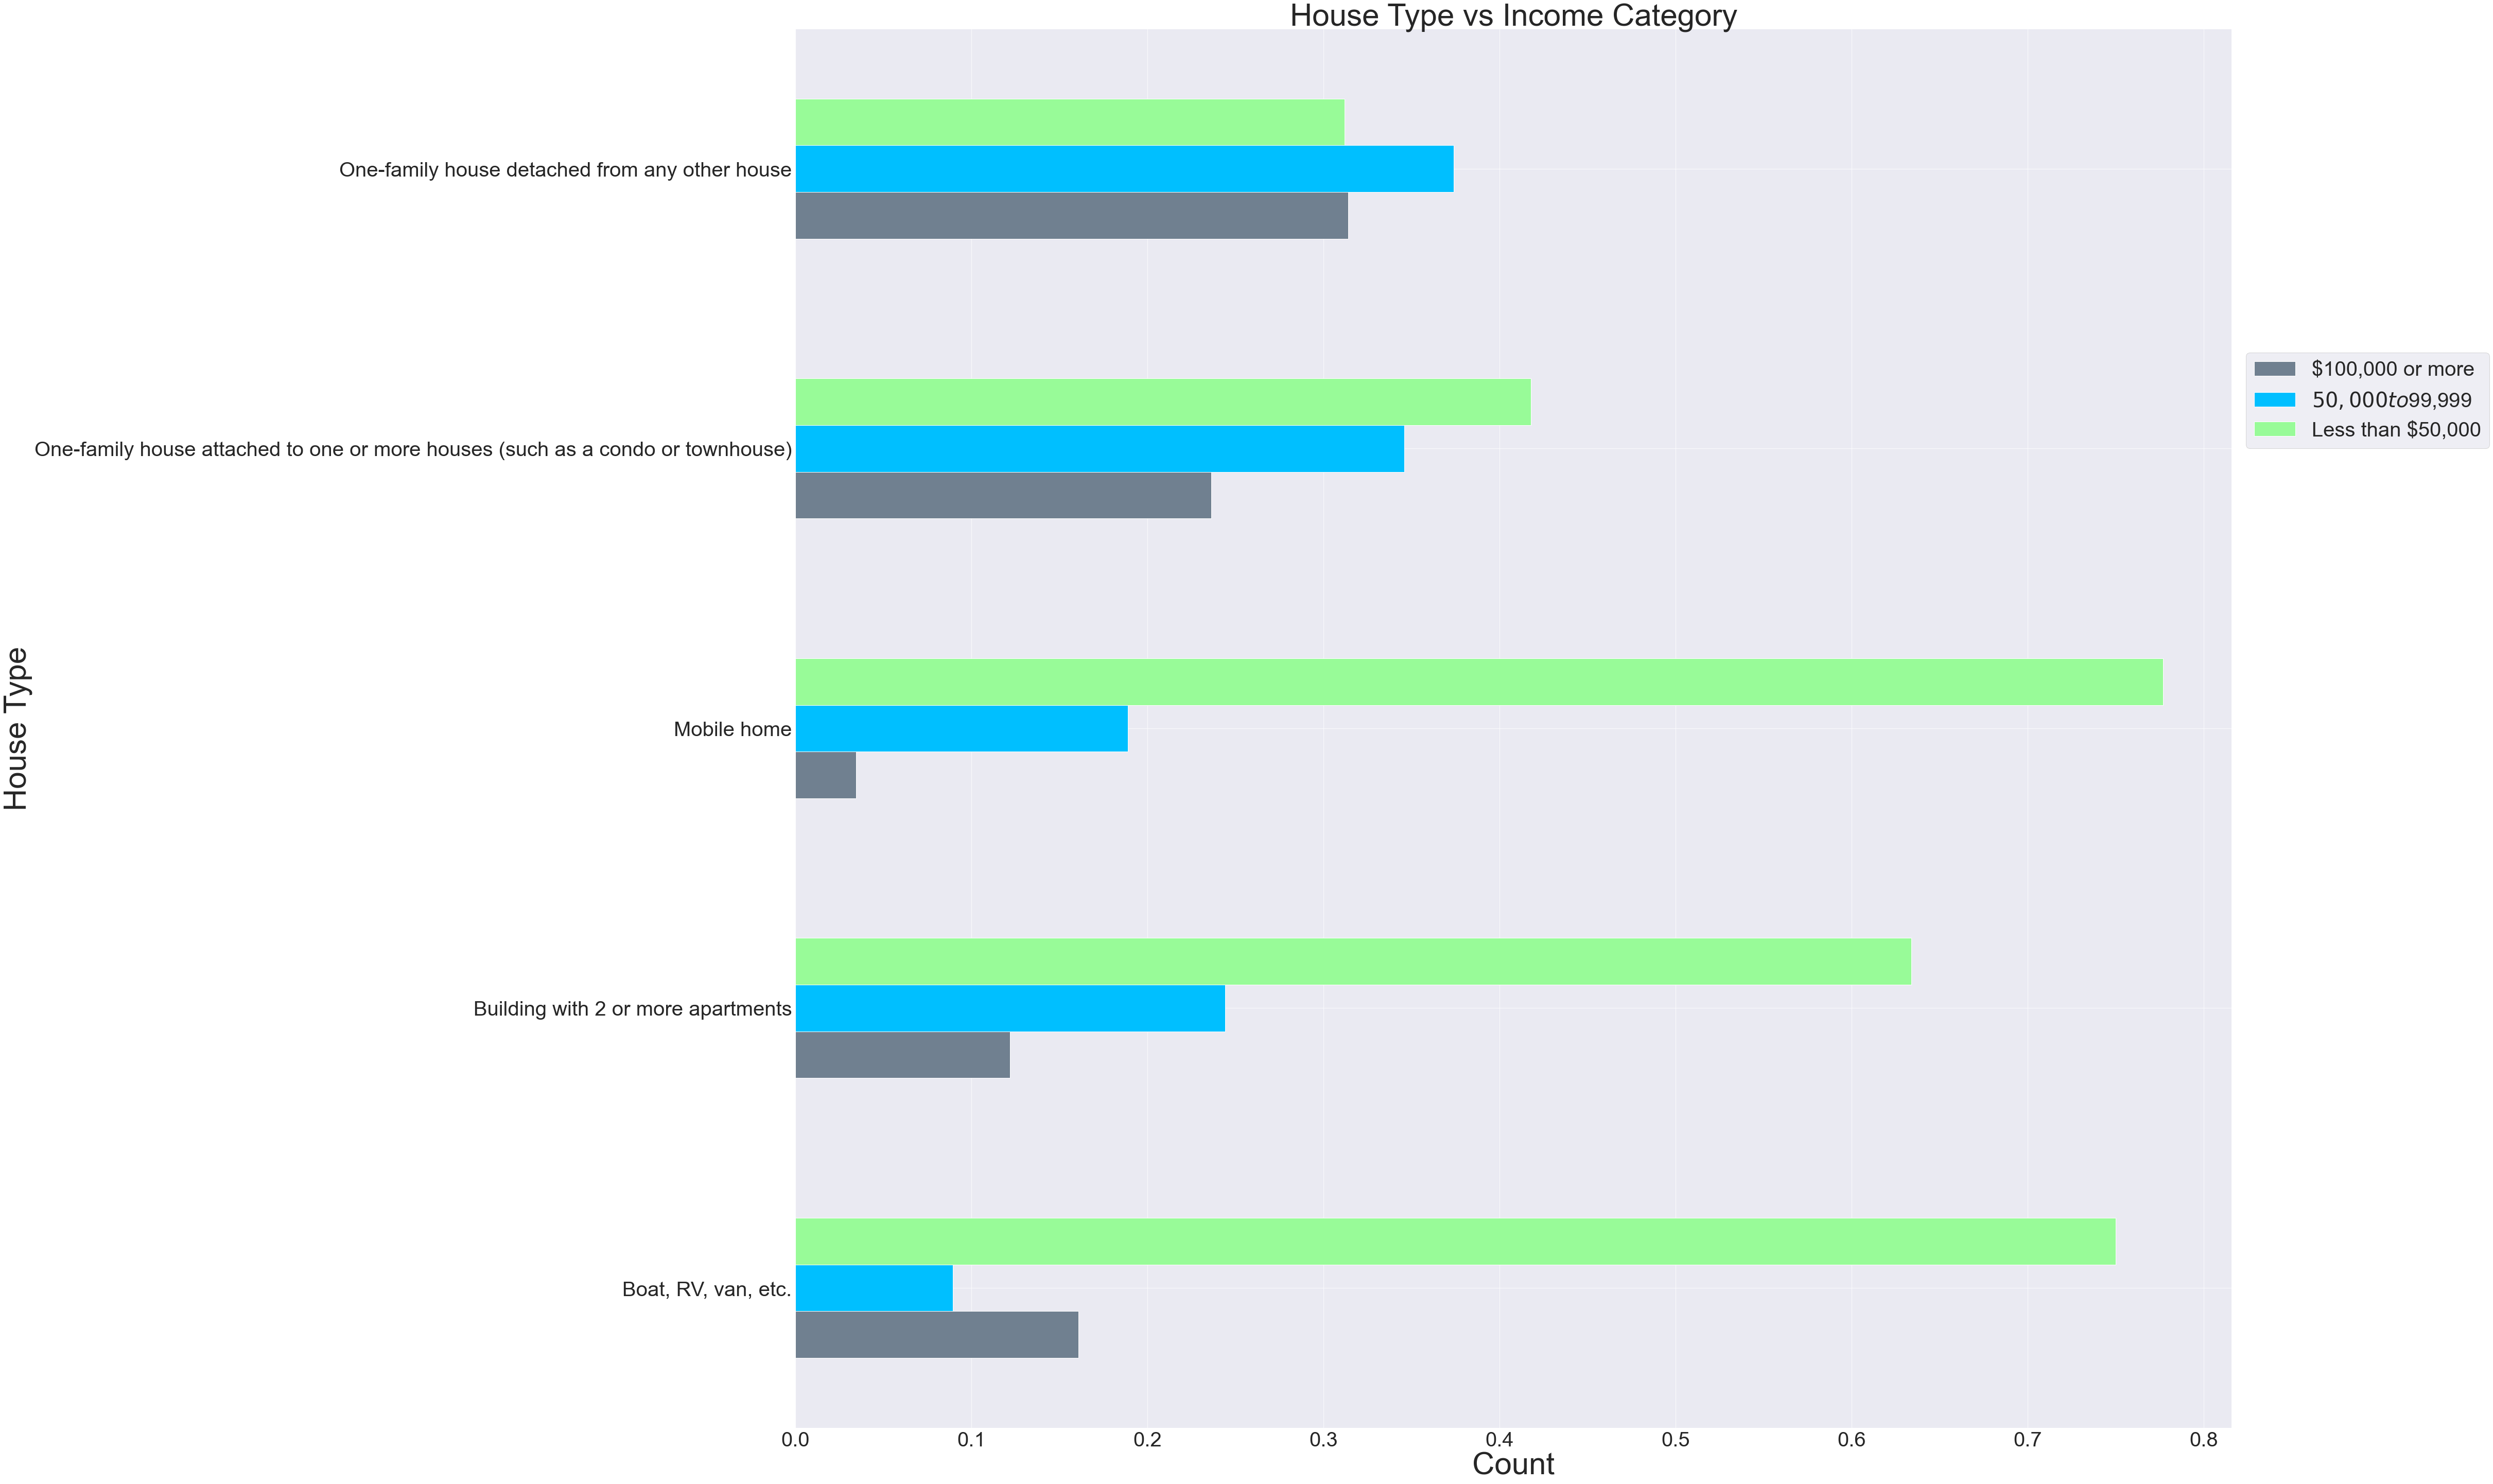

In [107]:
ax = df.groupby(['house_type'])['income_category'].value_counts(normalize=True).unstack().plot(kind='barh', figsize=(50,50),
color=['slategrey', 'deepskyblue', 'palegreen'])
ax.set_ylabel('House Type',fontsize=60)
ax.set_xlabel('Count',fontsize=60)
ax.legend(loc= (1.01,0.7),fontsize =40)
ax.set_title('House Type vs Income Category',fontsize =60)
plt.setp(ax.get_xticklabels(), fontsize=40)
plt.setp(ax.get_yticklabels(), fontsize=40);

**- Middle income people are more likely to own a One-Family house**

In [108]:
my_columns=['religion','religion_other_nonchristian', 'evangelical', 'service_attendance',
       'marit_status', 'employment', 'house_head', 'house_size',
       'house_ages0to1', 'house_ages2to5', 'house_ages6to12',
       'house_ages13to17', 'house_ages18plus', 'house_type', 'house_own']

In [109]:
df[my_columns].dtypes

religion                        object
religion_other_nonchristian     object
evangelical                     object
service_attendance               int64
marit_status                    object
employment                      object
house_head                      object
house_size                     float64
house_ages0to1                 float64
house_ages2to5                 float64
house_ages6to12                float64
house_ages13to17               float64
house_ages18plus               float64
house_type                      object
house_own                       object
dtype: object

In [110]:
df['service_attendance']=df['service_attendance'].astype(np.int64)
df['house_size']=df['house_size'].astype(np.int64)
df['house_ages0to1']=df['house_ages0to1'].astype(np.int64)
df['house_ages2to5']=df['house_ages2to5'].astype(np.int64)
df['house_ages6to12']=df['house_ages6to12'].astype(np.int64)
df['house_ages13to17']=df['house_ages13to17'].astype(np.int64)
df['house_ages18plus']=df['house_ages18plus'].astype(np.int64)

In [111]:
df[my_columns].corr()

,service_attendance,house_size,house_ages0to1,house_ages2to5,house_ages6to12,house_ages13to17,house_ages18plus
service_attendance,1.000000,0.075543,0.018848,0.030745,0.065009,0.061403,0.030270
house_size,0.075543,1.000000,0.246650,0.413113,0.558449,0.509398,0.734844
house_ages0to1,0.018848,0.246650,1.000000,0.194386,0.061373,-0.014844,0.035700
house_ages2to5,0.030745,0.413113,0.194386,1.000000,0.235270,0.020827,0.056111
house_ages6to12,0.065009,0.558449,0.061373,0.235270,1.000000,0.212531,0.062175
house_ages13to17,0.061403,0.509398,-0.014844,0.020827,0.212531,1.000000,0.135971
house_ages18plus,0.030270,0.734844,0.035700,0.056111,0.062175,0.135971,1.000000


In [112]:
df[my_columns].describe()

,service_attendance,house_size,house_ages0to1,house_ages2to5,house_ages6to12,house_ages13to17,house_ages18plus
count,22345.000000,22345.000000,22345.000000,22345.000000,22345.000000,22345.000000,22345.000000
mean,3.089192,2.673171,0.042560,0.106556,0.203983,0.188588,2.131484
std,1.797545,1.476334,0.231409,0.369782,0.557805,0.499610,0.953251
min,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,6.000000,15.000000,7.000000,4.000000,6.000000,4.000000,12.000000


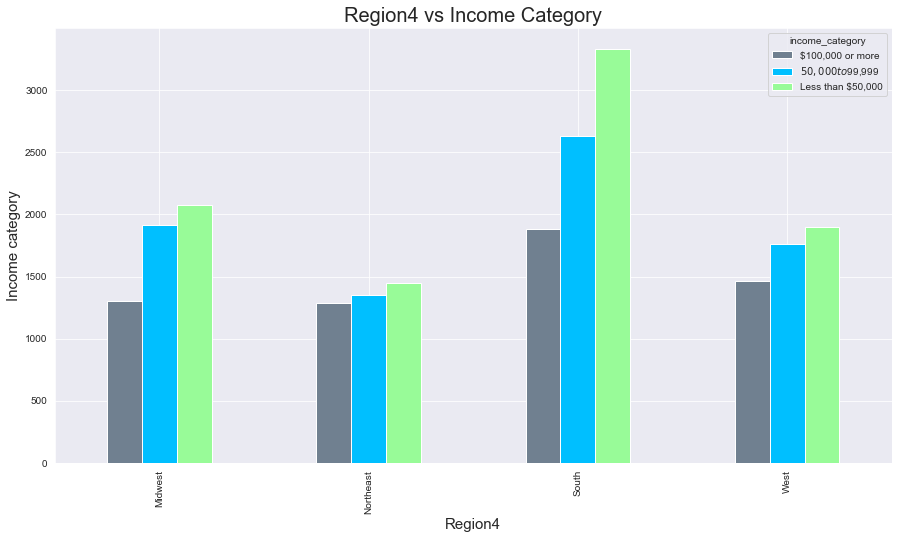

In [114]:
ax= pd.crosstab(index=df['region4'],columns=df['income_category']).plot.bar(figsize=(15,8),color=['slategrey', 'deepskyblue', 'palegreen'])
ax.set_xlabel('Region4',fontsize=15)
ax.set_ylabel('Income category',fontsize=15)
ax.set_title('Region4 vs Income Category',fontsize=20);

- **Low income category is predominant**
- **High income is less represented across regions**

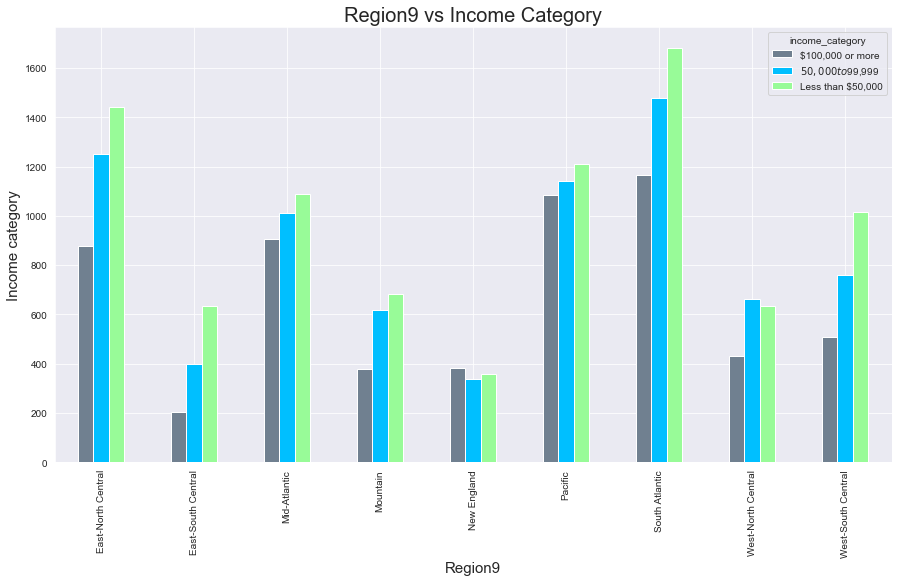

In [115]:
ax= pd.crosstab(index=df['region9'],columns=df['income_category']).plot.bar(figsize=(15,8),color=['slategrey', 'deepskyblue', 'palegreen'])
ax.set_xlabel('Region9',fontsize=15)
ax.set_ylabel('Income category',fontsize=15)
ax.set_title('Region9 vs Income Category',fontsize=20);

- **Low Income is predominant across regions except New England and West-North Central**
- **High income is predominant in New England**
- **Stark  inequality in East South Central region**
- **Pacific region has almost uniform distribution of low, medium and high income categories**

In [116]:
df[['house_size','house_ages18plus']].corr()

,house_size,house_ages18plus
house_size,1.000000,0.734844
house_ages18plus,0.734844,1.000000


- **Very high correlation between house_size and house_ages18plus might drop one of them**
- **Keep `children` as defined below and either of `house_size` or `house_ages18plus`and leave out `house_ages0to1`, `house_ages2to5`, `house_ages6to12`, `house_ages13to17`**

In [117]:
df[['house_ages0to1', 'house_ages2to5', 'house_ages6to12',
       'house_ages13to17', 'house_ages18plus','house_size']]

,house_ages0to1,house_ages2to5,house_ages6to12,house_ages13to17,house_ages18plus,house_size
0,0,0,0,0,3,3
1,0,0,0,0,2,2
2,0,0,0,0,2,2
3,0,0,0,0,2,2
4,0,0,0,0,2,2
...,...,...,...,...,...,...
22411,0,0,0,0,2,2
22412,0,1,3,0,4,8
22413,0,0,0,0,2,2
22414,0,1,0,0,4,5


In [118]:
df['children'] =df['house_ages0to1']+df['house_ages2to5']+df['house_ages6to12']+df['house_ages13to17']

In [119]:
df['children'].describe()

count    22345.000000
mean         0.541687
std          1.009918
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         10.000000
Name: children, dtype: float64

- **All good with `children` column**

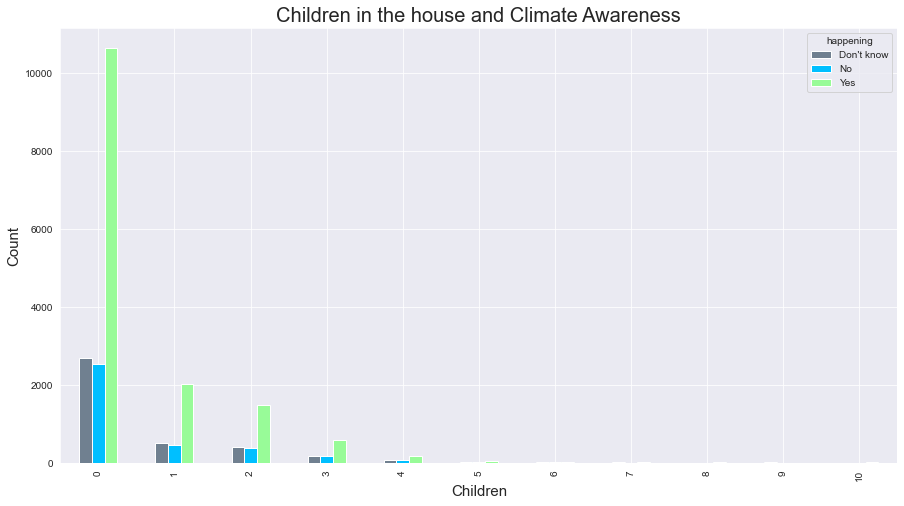

In [120]:
ax= pd.crosstab(index=df['children'],columns=df['happening']).plot.bar(figsize=(15,8),color=['slategrey', 'deepskyblue', 'palegreen'])
ax.set_xlabel('Children', fontsize=15)
ax.set_ylabel('Count',fontsize=15)
ax.set_title('Children in the house and Climate Awareness', fontsize=20);

- **Seems like having more children reduces the climate awareness or that people with more climate awareness are having less children**
- **I was expecting a reverse relationship too that people having children would want to leave a better world for their children so would be more aware, I don't know the exact relationship**

In [121]:
columns_to_keep=['religion', 'service_attendance','marit_status', 'employment', 'house_head',
                 'house_size',  'house_ages18plus','children', 'house_type', 'house_own']

**These are the columns I would like to keep after EDA*